In [1]:
import tribolium_clustering as tc
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler


lund = tc.processed_dataset(tc.get_folder_path('choose lund'))
finsterwalde = tc.processed_dataset(tc.get_folder_path('choose finsterwalde'))
wolgast = tc.processed_dataset(tc.get_folder_path('choose wolgast'))
allregprops_lund_unscaled = lund.get_combined_regionprops()
allregprops_wolgast_unscaled = wolgast.get_combined_regionprops()
allregprops_finsterwalde_unscaled = finsterwalde.get_combined_regionprops()



No Predictions in Regionprops of D:/Uni/MSTER TUD/Master Thesis/output data/Lund Gastrulation Correct voxel sizes//
No Predictions in Regionprops of D:/Uni/MSTER TUD/Master Thesis/output data/Wolgast Gastrulation Labels//
No Predictions in Regionprops of D:/Uni/MSTER TUD/Master Thesis/output data/Finsterwalde Gastrulation Labels (new timeframe)//


In [2]:
# conversion factors for measurements with units
volume_cf = 0.69*0.69*0.69
distance_cf = 0.69


conversion_factors = [volume_cf,volume_cf,volume_cf, distance_cf,
                      1,1,distance_cf,volume_cf,
                      distance_cf,distance_cf,1,
                      1,1,1,1,
                      1,1,1,
                      1,1,1,
                      distance_cf, distance_cf,
                      distance_cf, distance_cf,
                      distance_cf, distance_cf,
                      1
                     ]

allregprops_lund = allregprops_lund_unscaled*conversion_factors
allregprops_wolgast = allregprops_wolgast_unscaled*conversion_factors
allregprops_finsterwalde = allregprops_finsterwalde_unscaled*conversion_factors

# Area
Because the Montefano Dataset was too large to rescale keeping the original voxel size, we have to scale the datasets accordingly, to ensure that we can compare them.

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

(0.0, 9000.0)

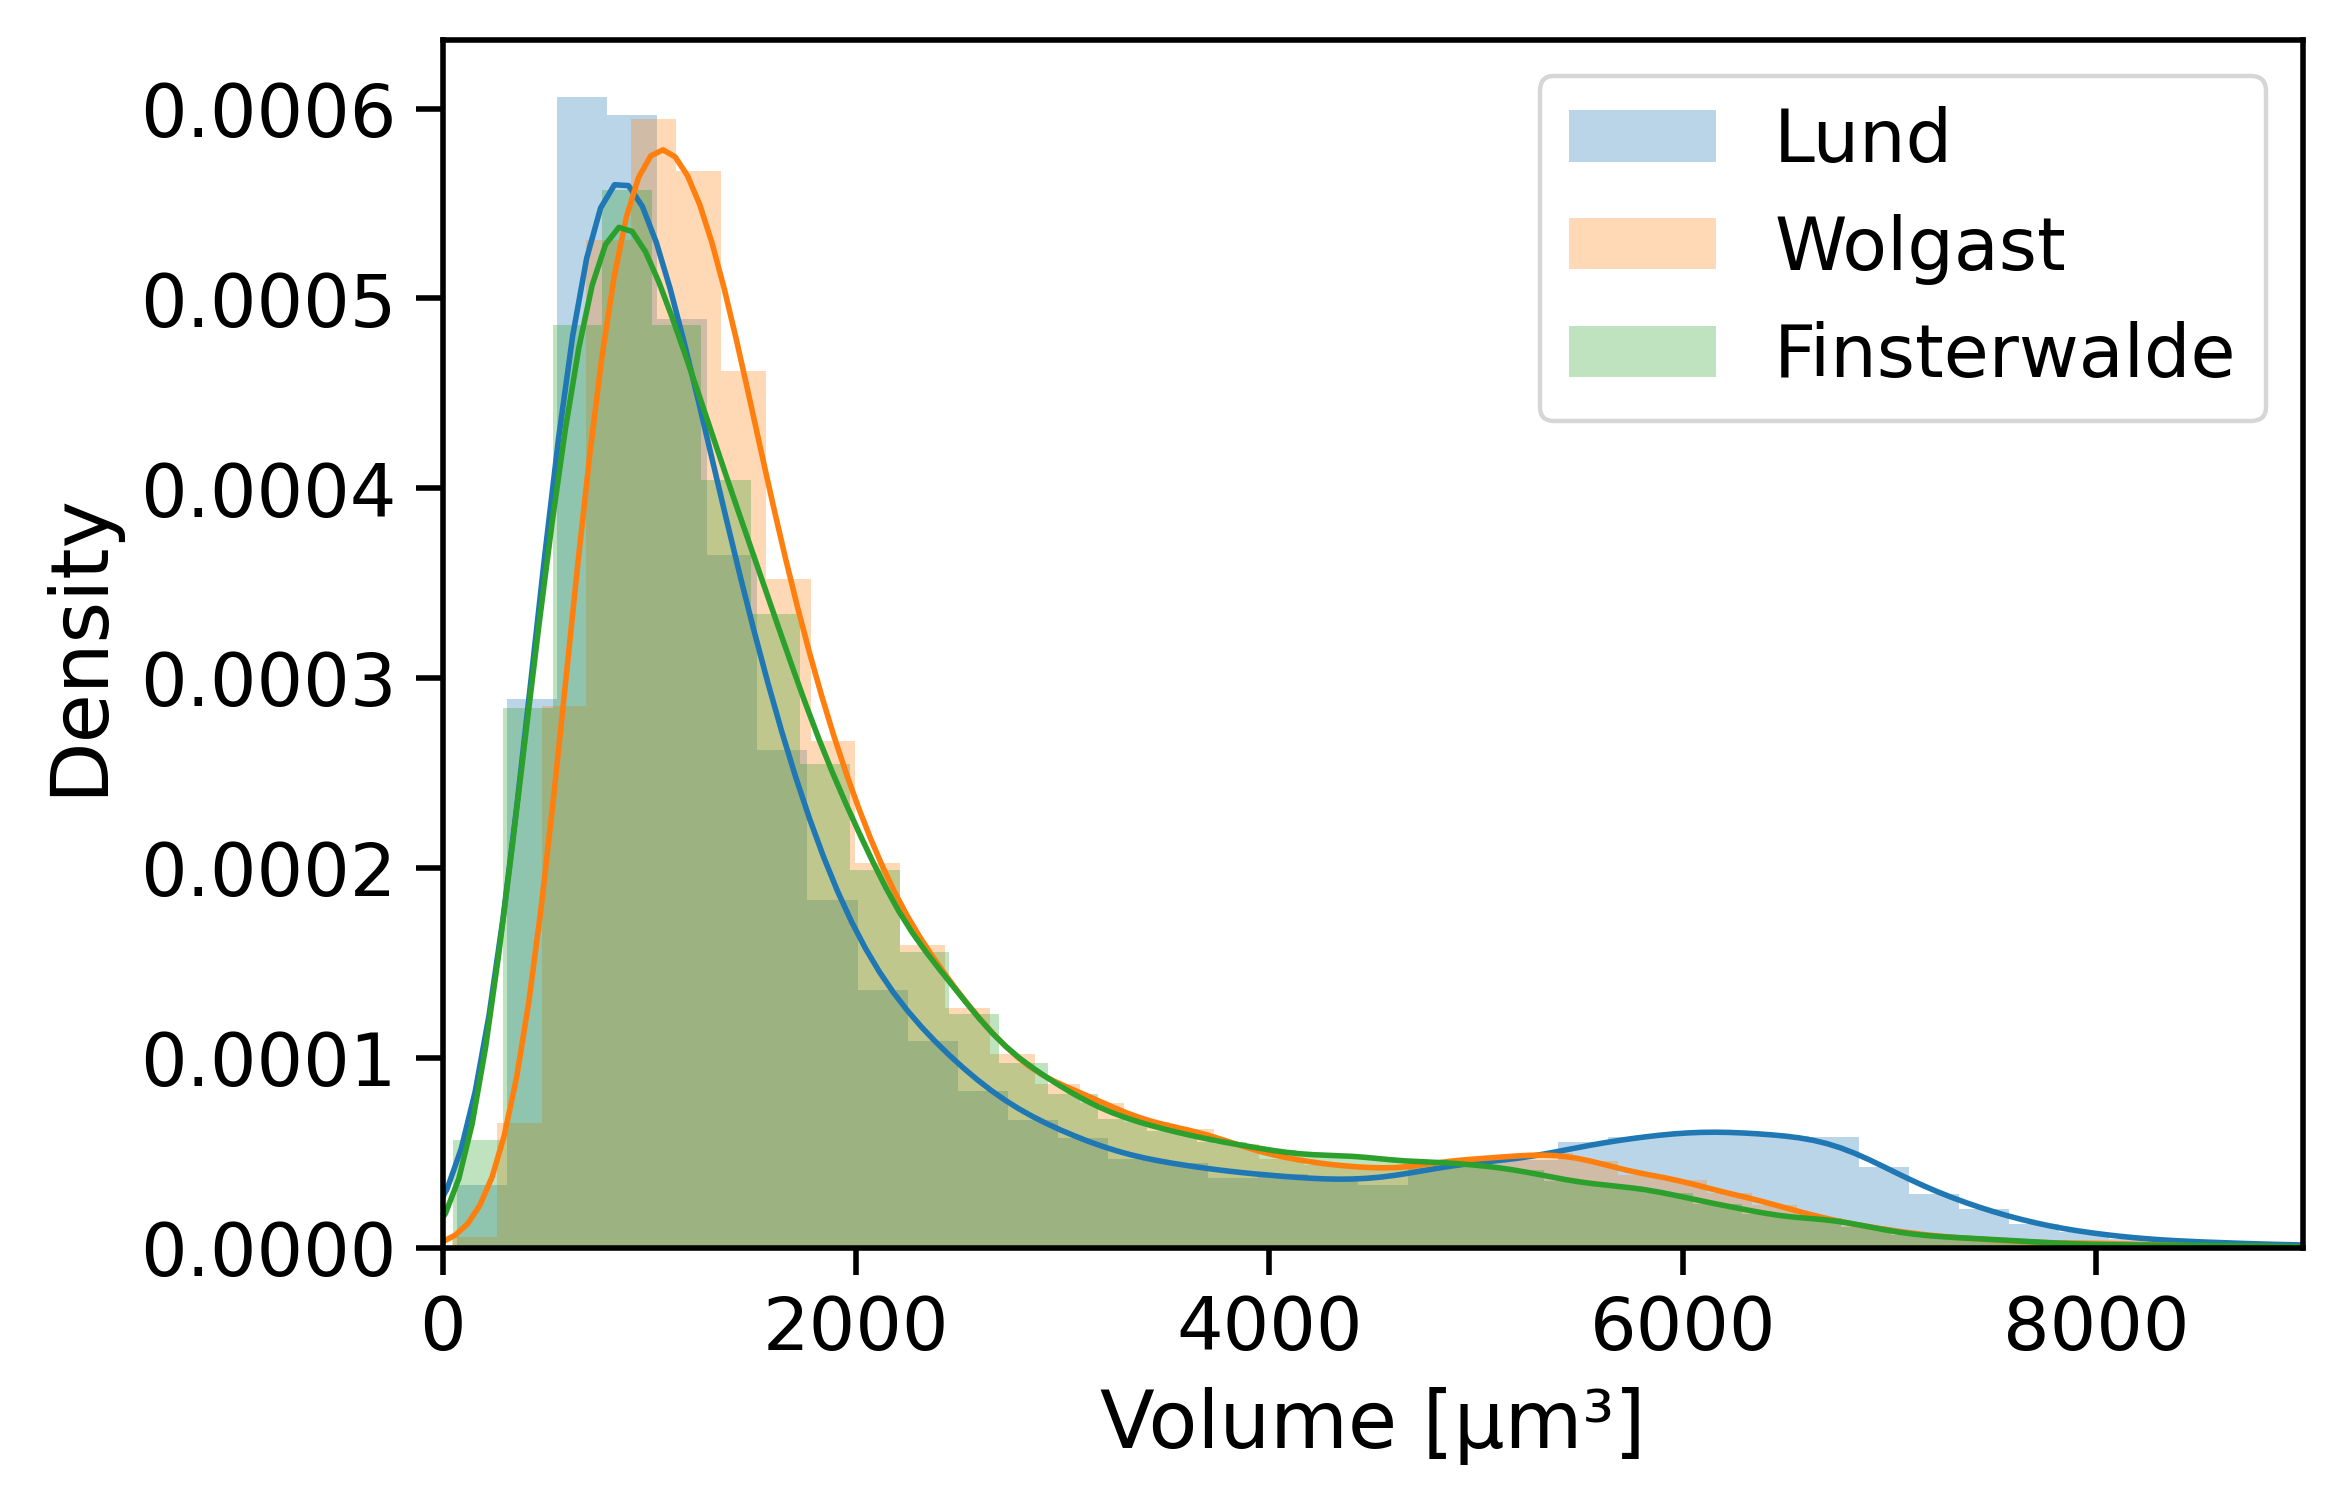

In [3]:
import seaborn as sns
props_list =[allregprops_lund,allregprops_wolgast,allregprops_finsterwalde]


areas = [prop['area'] for prop in props_list]


names = ['Lund', 'Wolgast', 'Finsterwalde']

sns.set_context("paper", font_scale=1.5) 

def plot_dataset_comparison(measurements,x_axis_title,names = ['Lund', 'Wolgast', 'Finsterwalde'],
                            kwargs = dict(hist_kws={'alpha':0.3}, kde_kws={'linewidth':0.5})):
    
    # Renaming X-Axis
    new_name_props = [prop.rename(x_axis_title) for prop in measurements]
    
    
    kwargs = dict(hist_kws={'alpha':0.3}, kde_kws={'linewidth':1})
    plt.figure(figsize =(6,4), dpi = 400)
    
    for Area, name in zip(new_name_props, names):
        sns.distplot(Area, label = name, **kwargs)
    plt.legend()
    
plot_dataset_comparison(areas,'Volume [\u03BCm\u00b3]')

plt.xlim([0,9000])

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

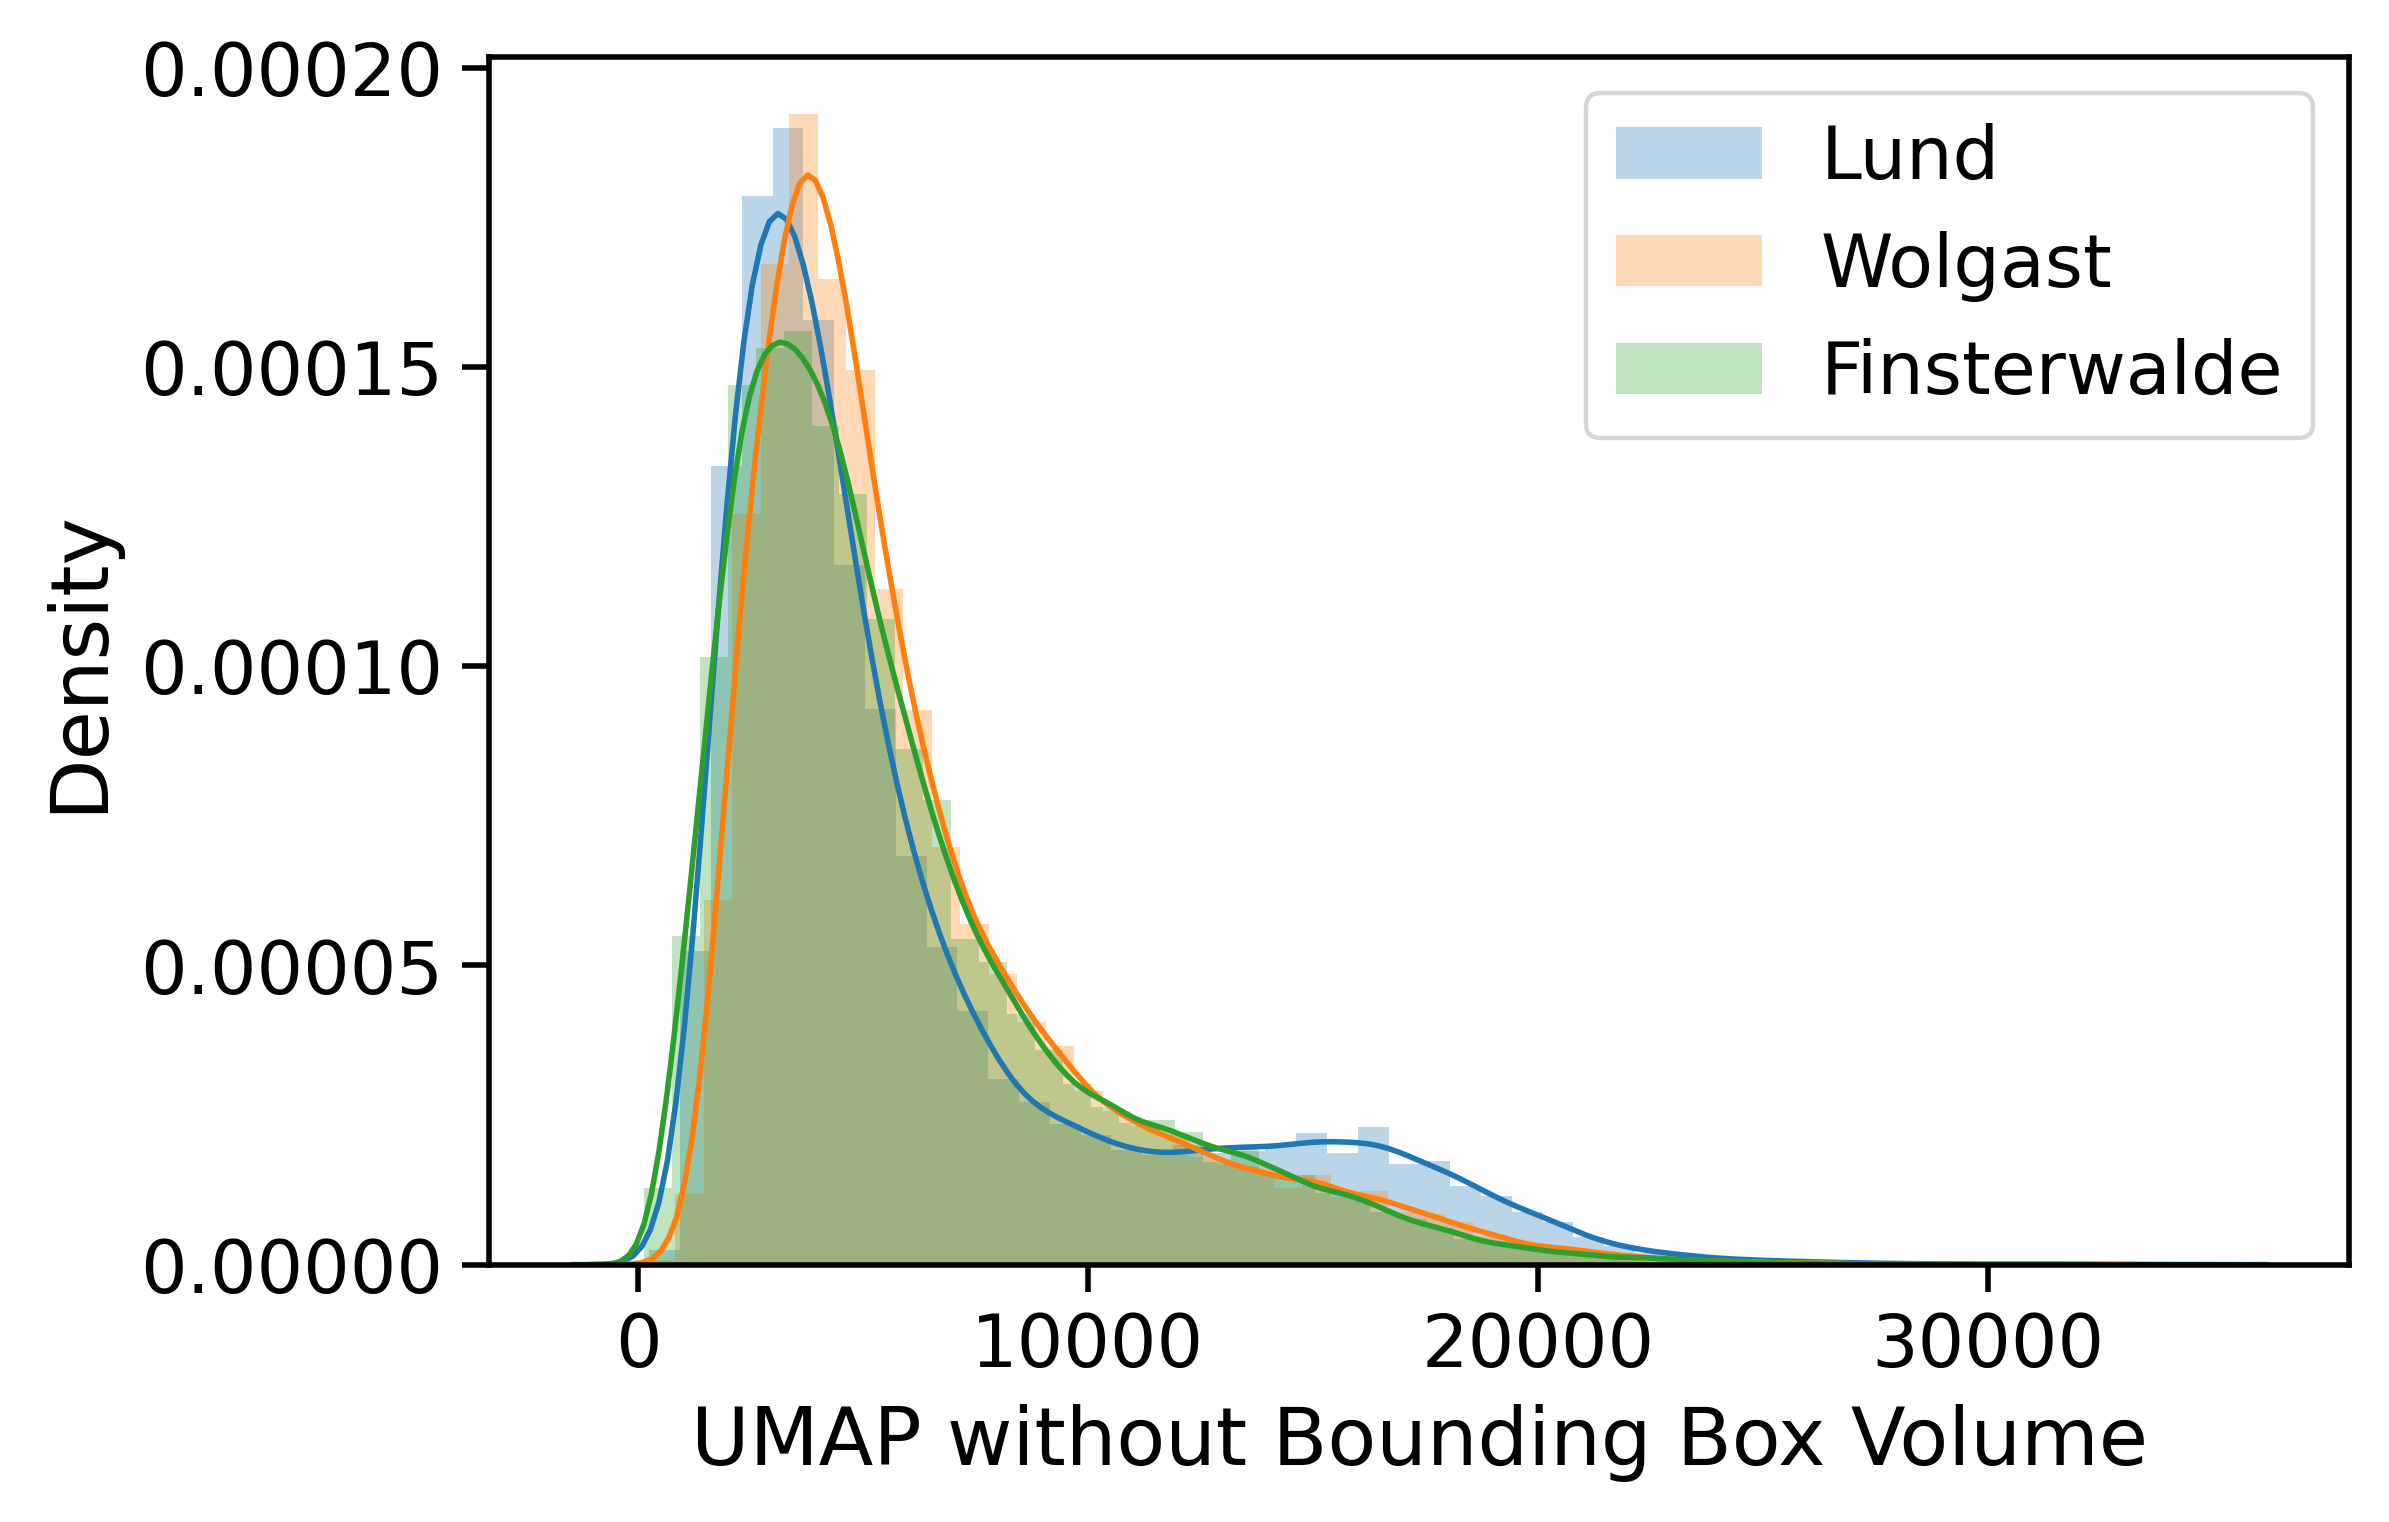

In [5]:


areas = [prop['area'] for prop in props_list]


names = ['Lund', 'Wolgast', 'Finsterwalde']

sns.set_context("paper", font_scale=1.5) 

def plot_dataset_comparison(measurements,x_axis_title,names = ['Lund', 'Wolgast', 'Finsterwalde'],
                            kwargs = dict(hist_kws={'alpha':0.3}, kde_kws={'linewidth':0.5})):
    
    # Renaming X-Axis
    new_name_props = [prop.rename(x_axis_title) for prop in measurements]
    
    
    kwargs = dict(hist_kws={'alpha':0.3}, kde_kws={'linewidth':1})
    plt.figure(figsize =(6,4), dpi = 400)
    
    for Area, name in zip(new_name_props, names):
        sns.distplot(Area, label = name, **kwargs)
    plt.legend()
    
plot_dataset_comparison(areas,'Bounding Box Volume [\u03BCm\u00b3]')


What stands out here is how the two differently resampled datasets differ from the montefano dataset. I need to investigate this further to see if it is actually the rescaling influencing the plot or if it is the differing angles and focal points that the datasets have that determine the differences we can see.

# Equivalent Diameter
This is one of the weirder ones: it describes the diameter of a sphere with the same volume as the object in question. 

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

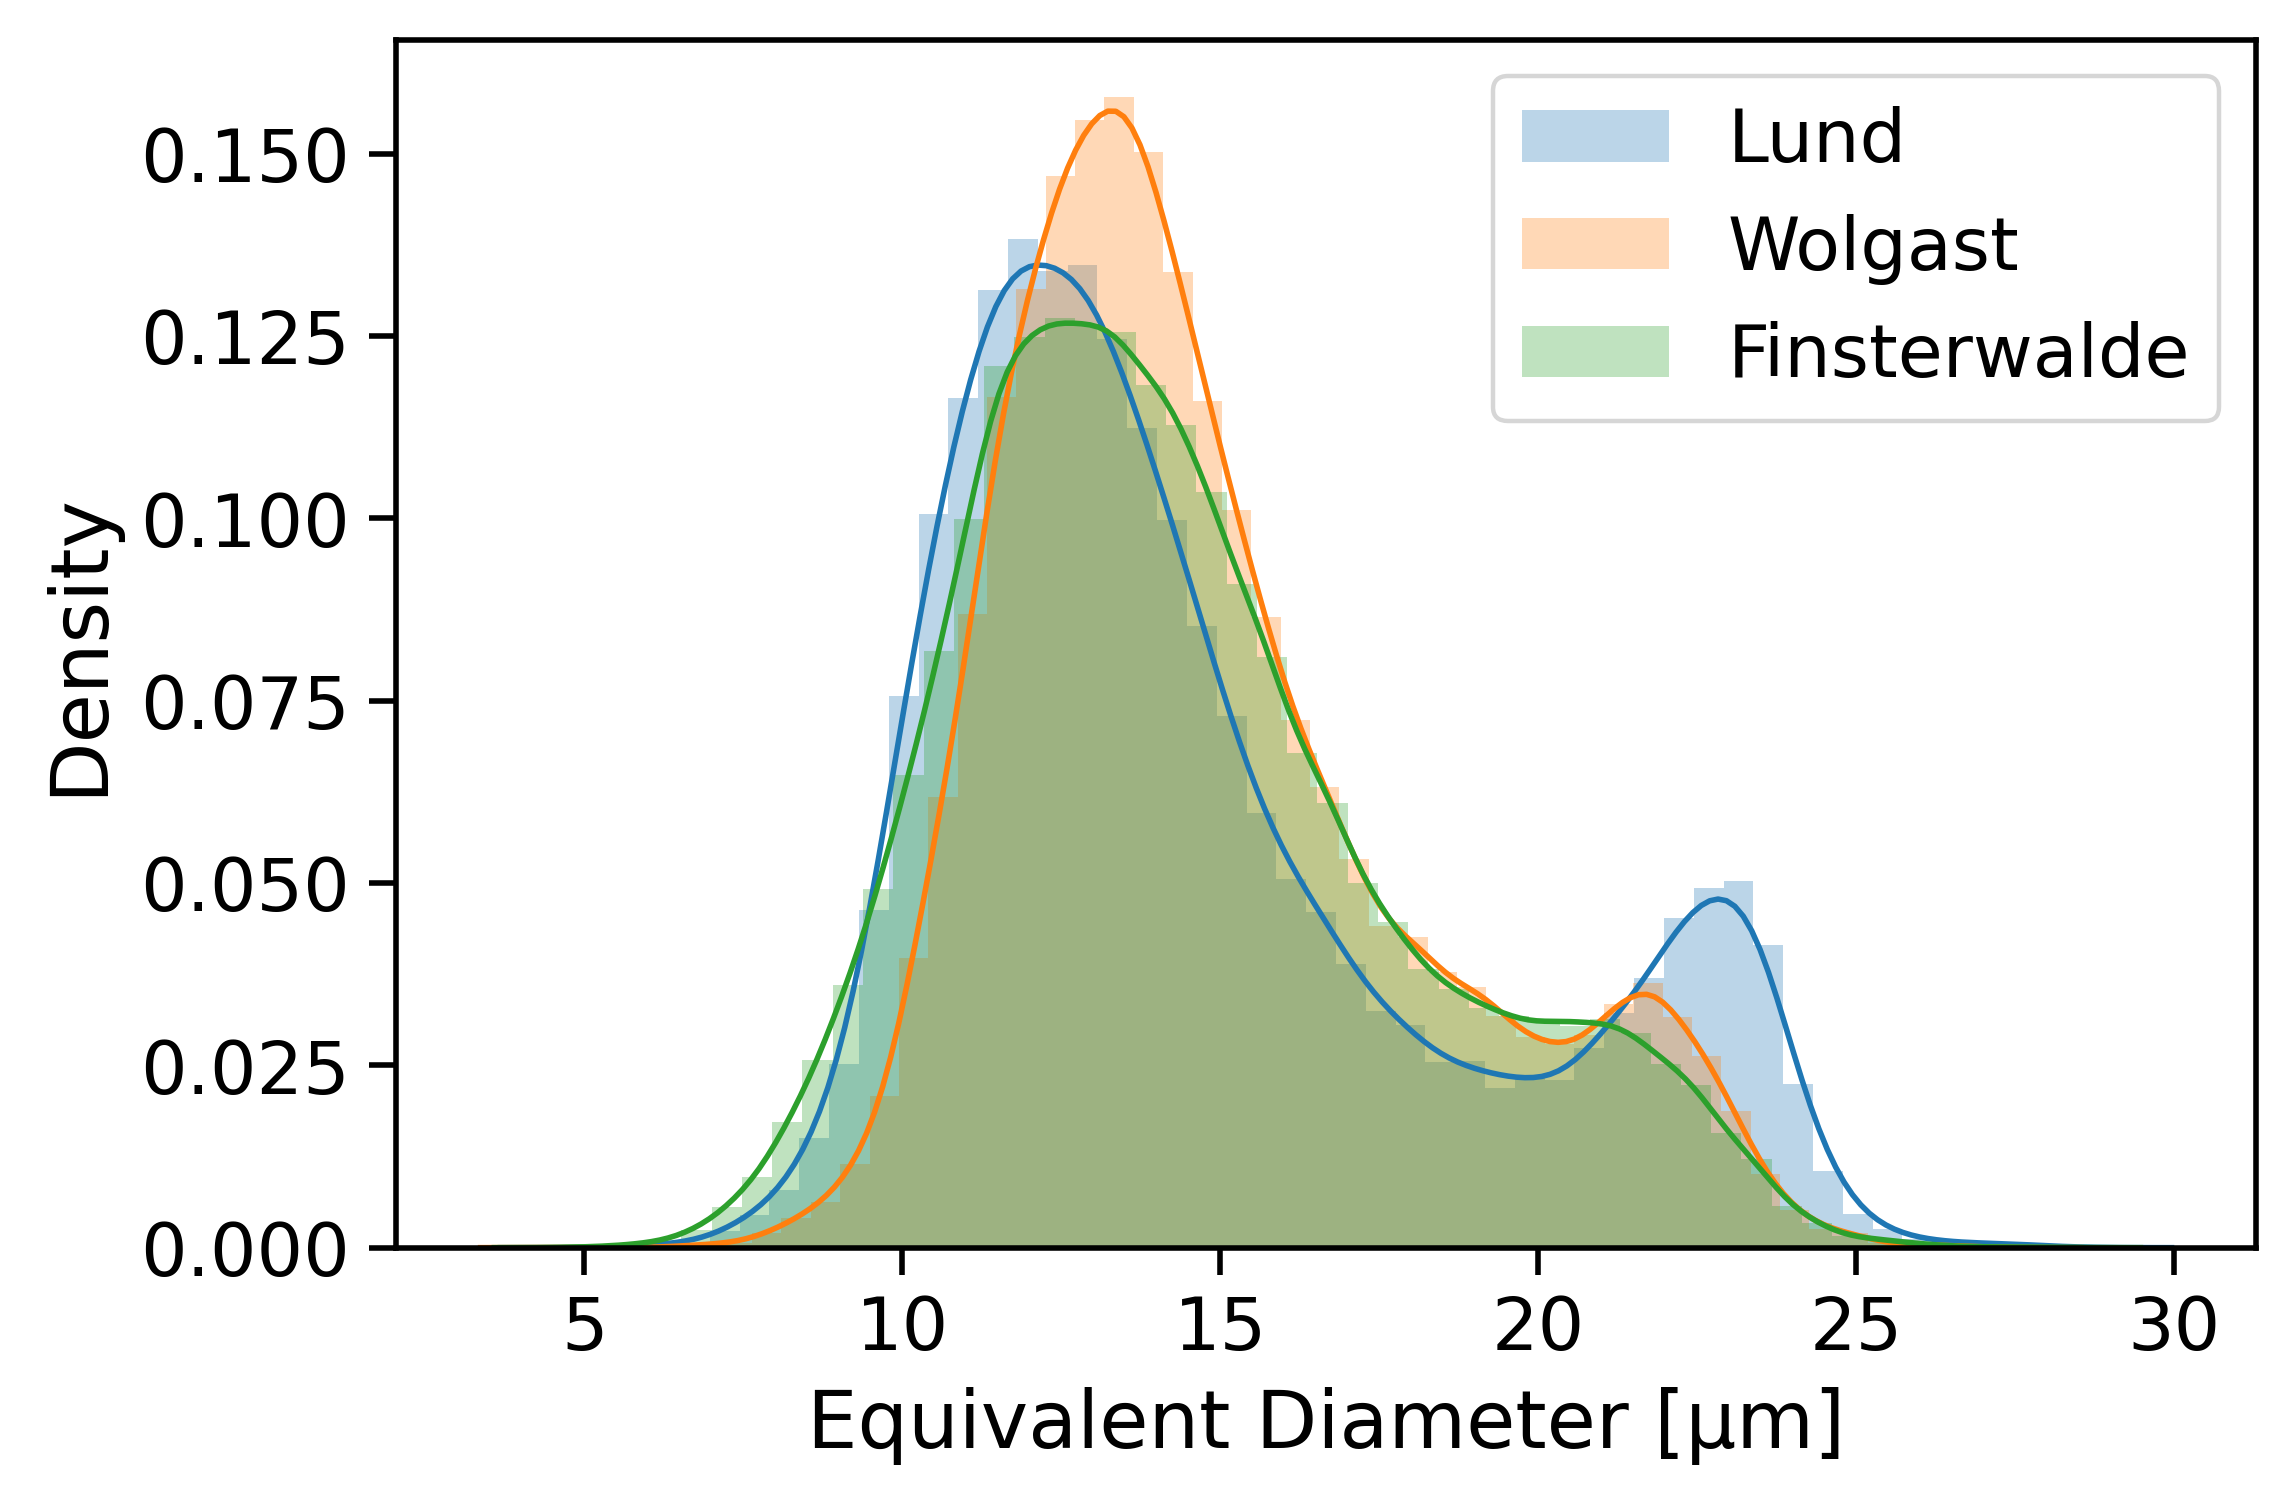

In [12]:


equ_diameters = [prop['equivalent_diameter'] for prop in props_list]

plot_dataset_comparison(equ_diameters, 'Equivalent Diameter [\u03BCm]')

Something that's becoming clearer in this image is how the lund and wolgast dataset also seem to misalign. I need to check if this is because of actual biological differences or mistakes in the resampling (maybe used wrong voxel sizes?) Also Montefano has a completely differen't distribution here with much less separation between the peaks.

Looking at lund and wolgast it seems that there was a mix up with voxel sizes and the Lund Dataset I have been working on for the past few months was not isotropic..... I'm not sure how much this will have influenced data aquisition but I suspect not too much since Lund and Wolgast look pretty similar (up to now) when we compare the distributions of values. Tomorrow I will recompute the workflow and scikit regionprops for lund and we'll see if this changes anything dramatically (fingers crossed) up until then we'll just ignore the slight shift.

The more pressing matter is to see if montefano is influenced by the rescaling or if it is so drastically different because of the different perspective under the microscope. This will be investigated in another notebook.

# Extent
This is described as "Ratio of pixels in the region to pixels in the total bounding box". Intuitively this says something about how close the bounding box matches the shape. If we have large protrusions with little volume (spikes) the ratio will get smaller and larger for completely square objects. In a sense I would image it to somehow scale with solidity which we'll look at after this

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

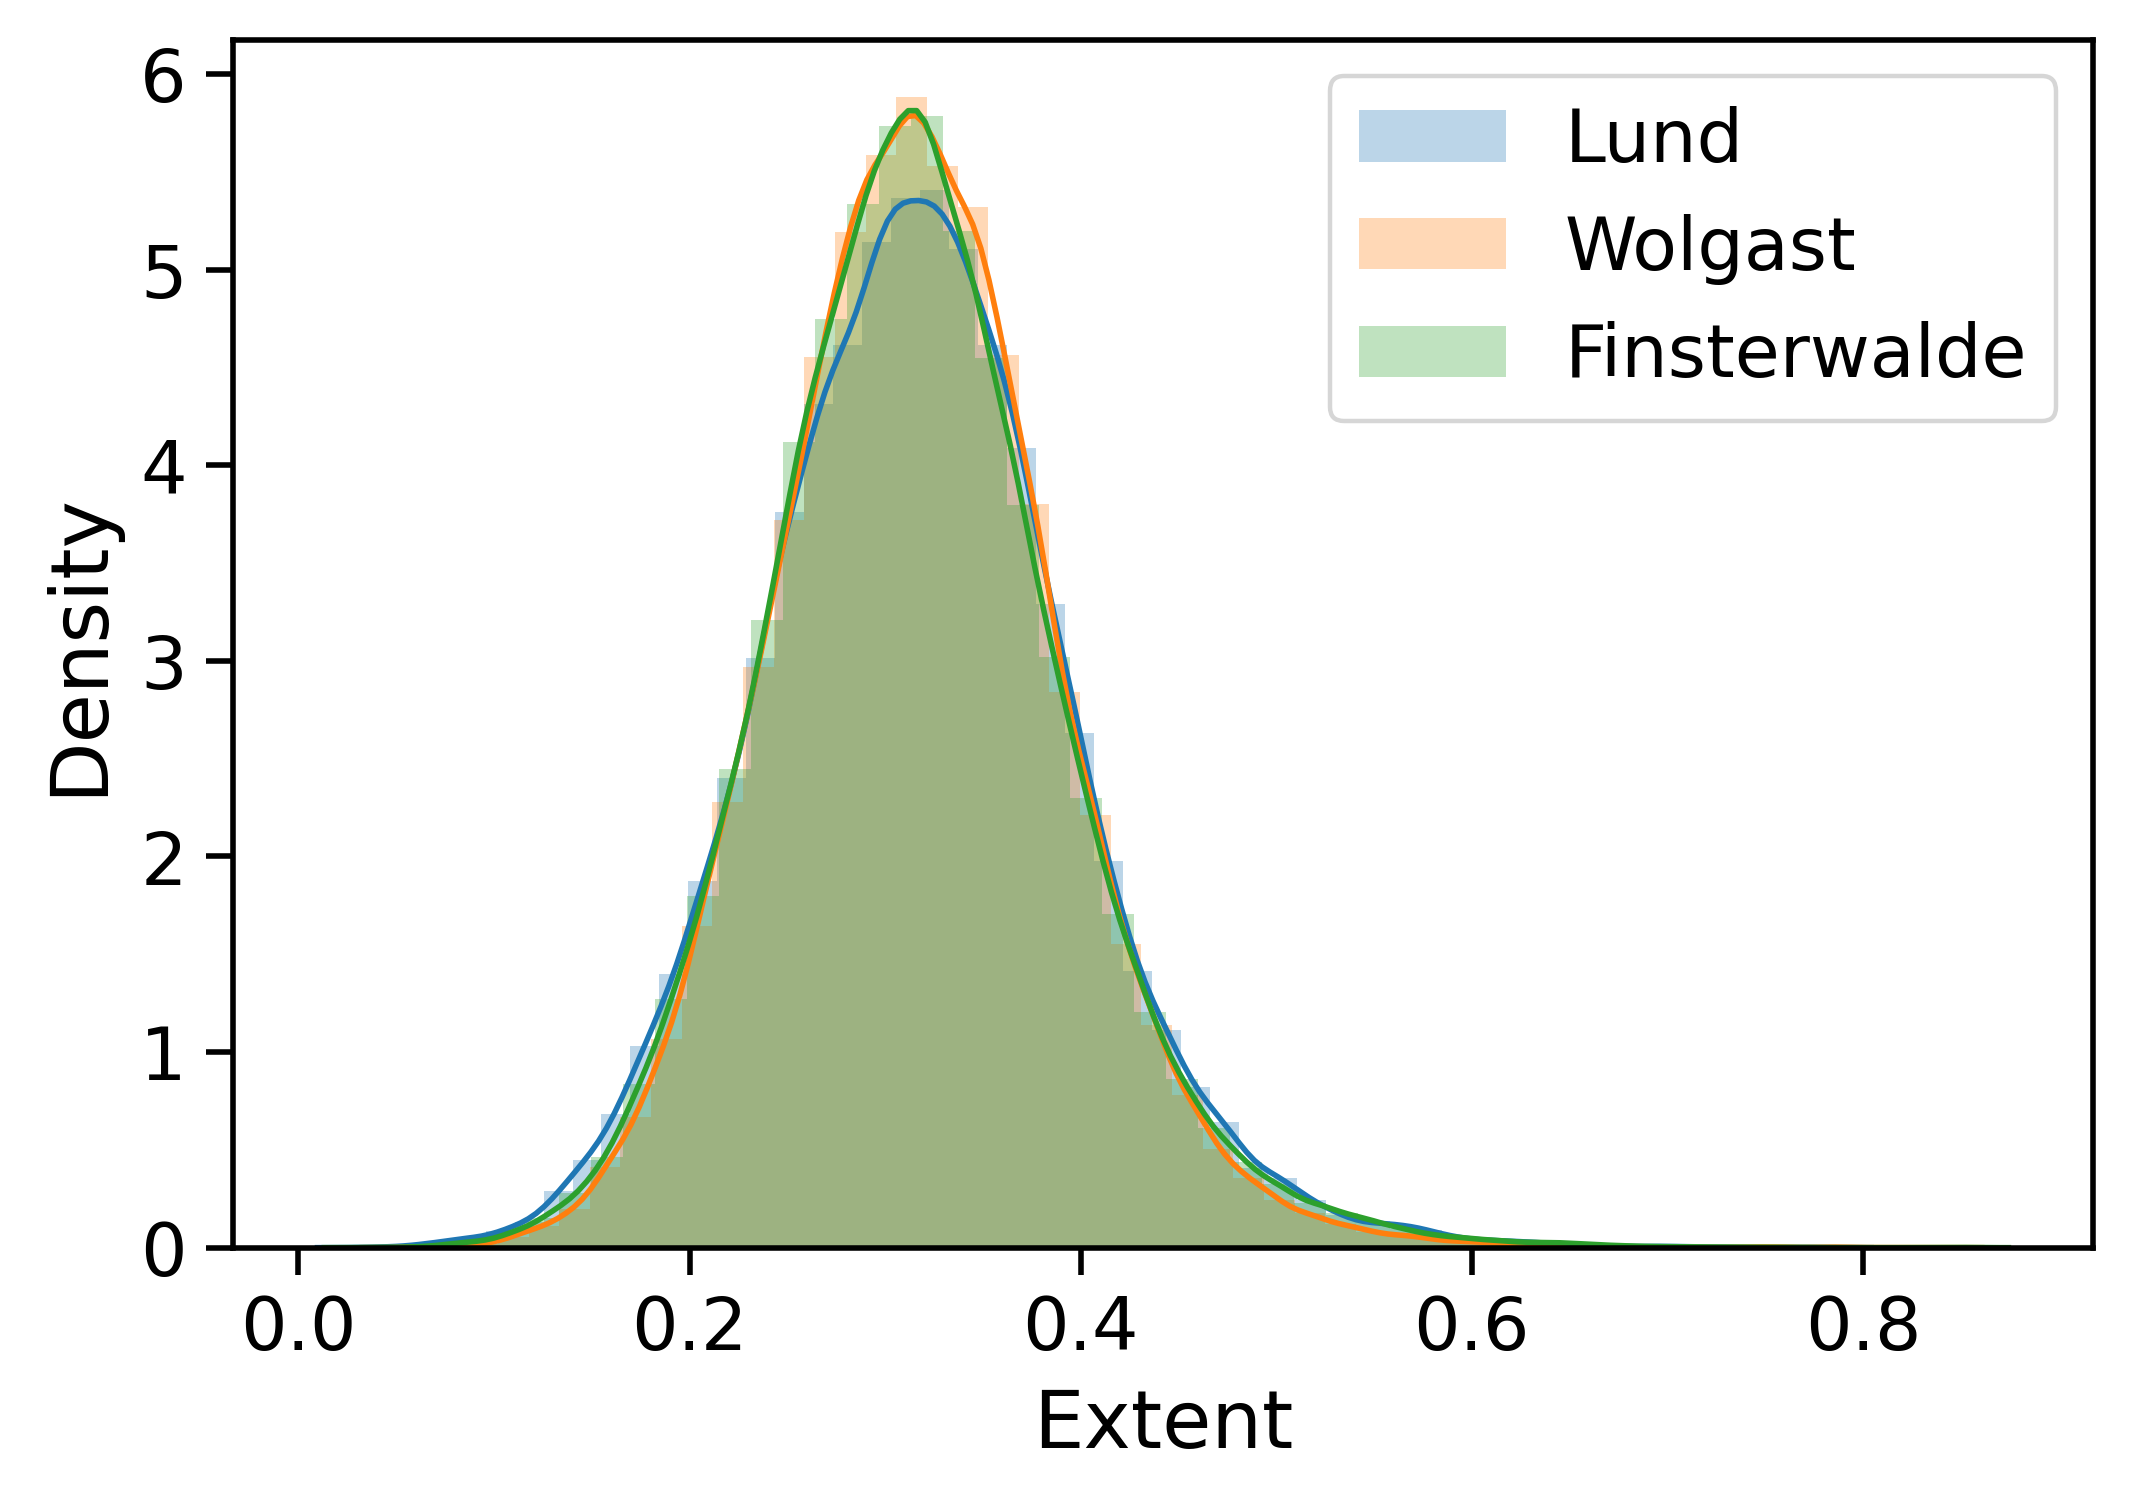

In [43]:
extent = [prop['extent'] for prop in props_list]

plot_dataset_comparison(extent, 'Extent')

Okay so this looks like a nice normal distribution. Now this could just be because it says nothing or it could be a nice feature to separate some groups. It could be useful because it is determined by the confinement in a neighbourhood. If a nucleus is confined in all directions equally the ratio will be closer to 1 and if it is not confined at all it will be nearing some constant. So it might be an interesting shape parameter for clustering albeit the biological interpretation is something else...

# Solidity 
This one I know. The ration between area and the area of the convex hull. It describes how many indentations or to what extent the object has indentations. I think this one is heavily influenced by the actual operation of expanding the cells. It will just be 1 if we expand cells without neighbours but I think it will have high values across the board:

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

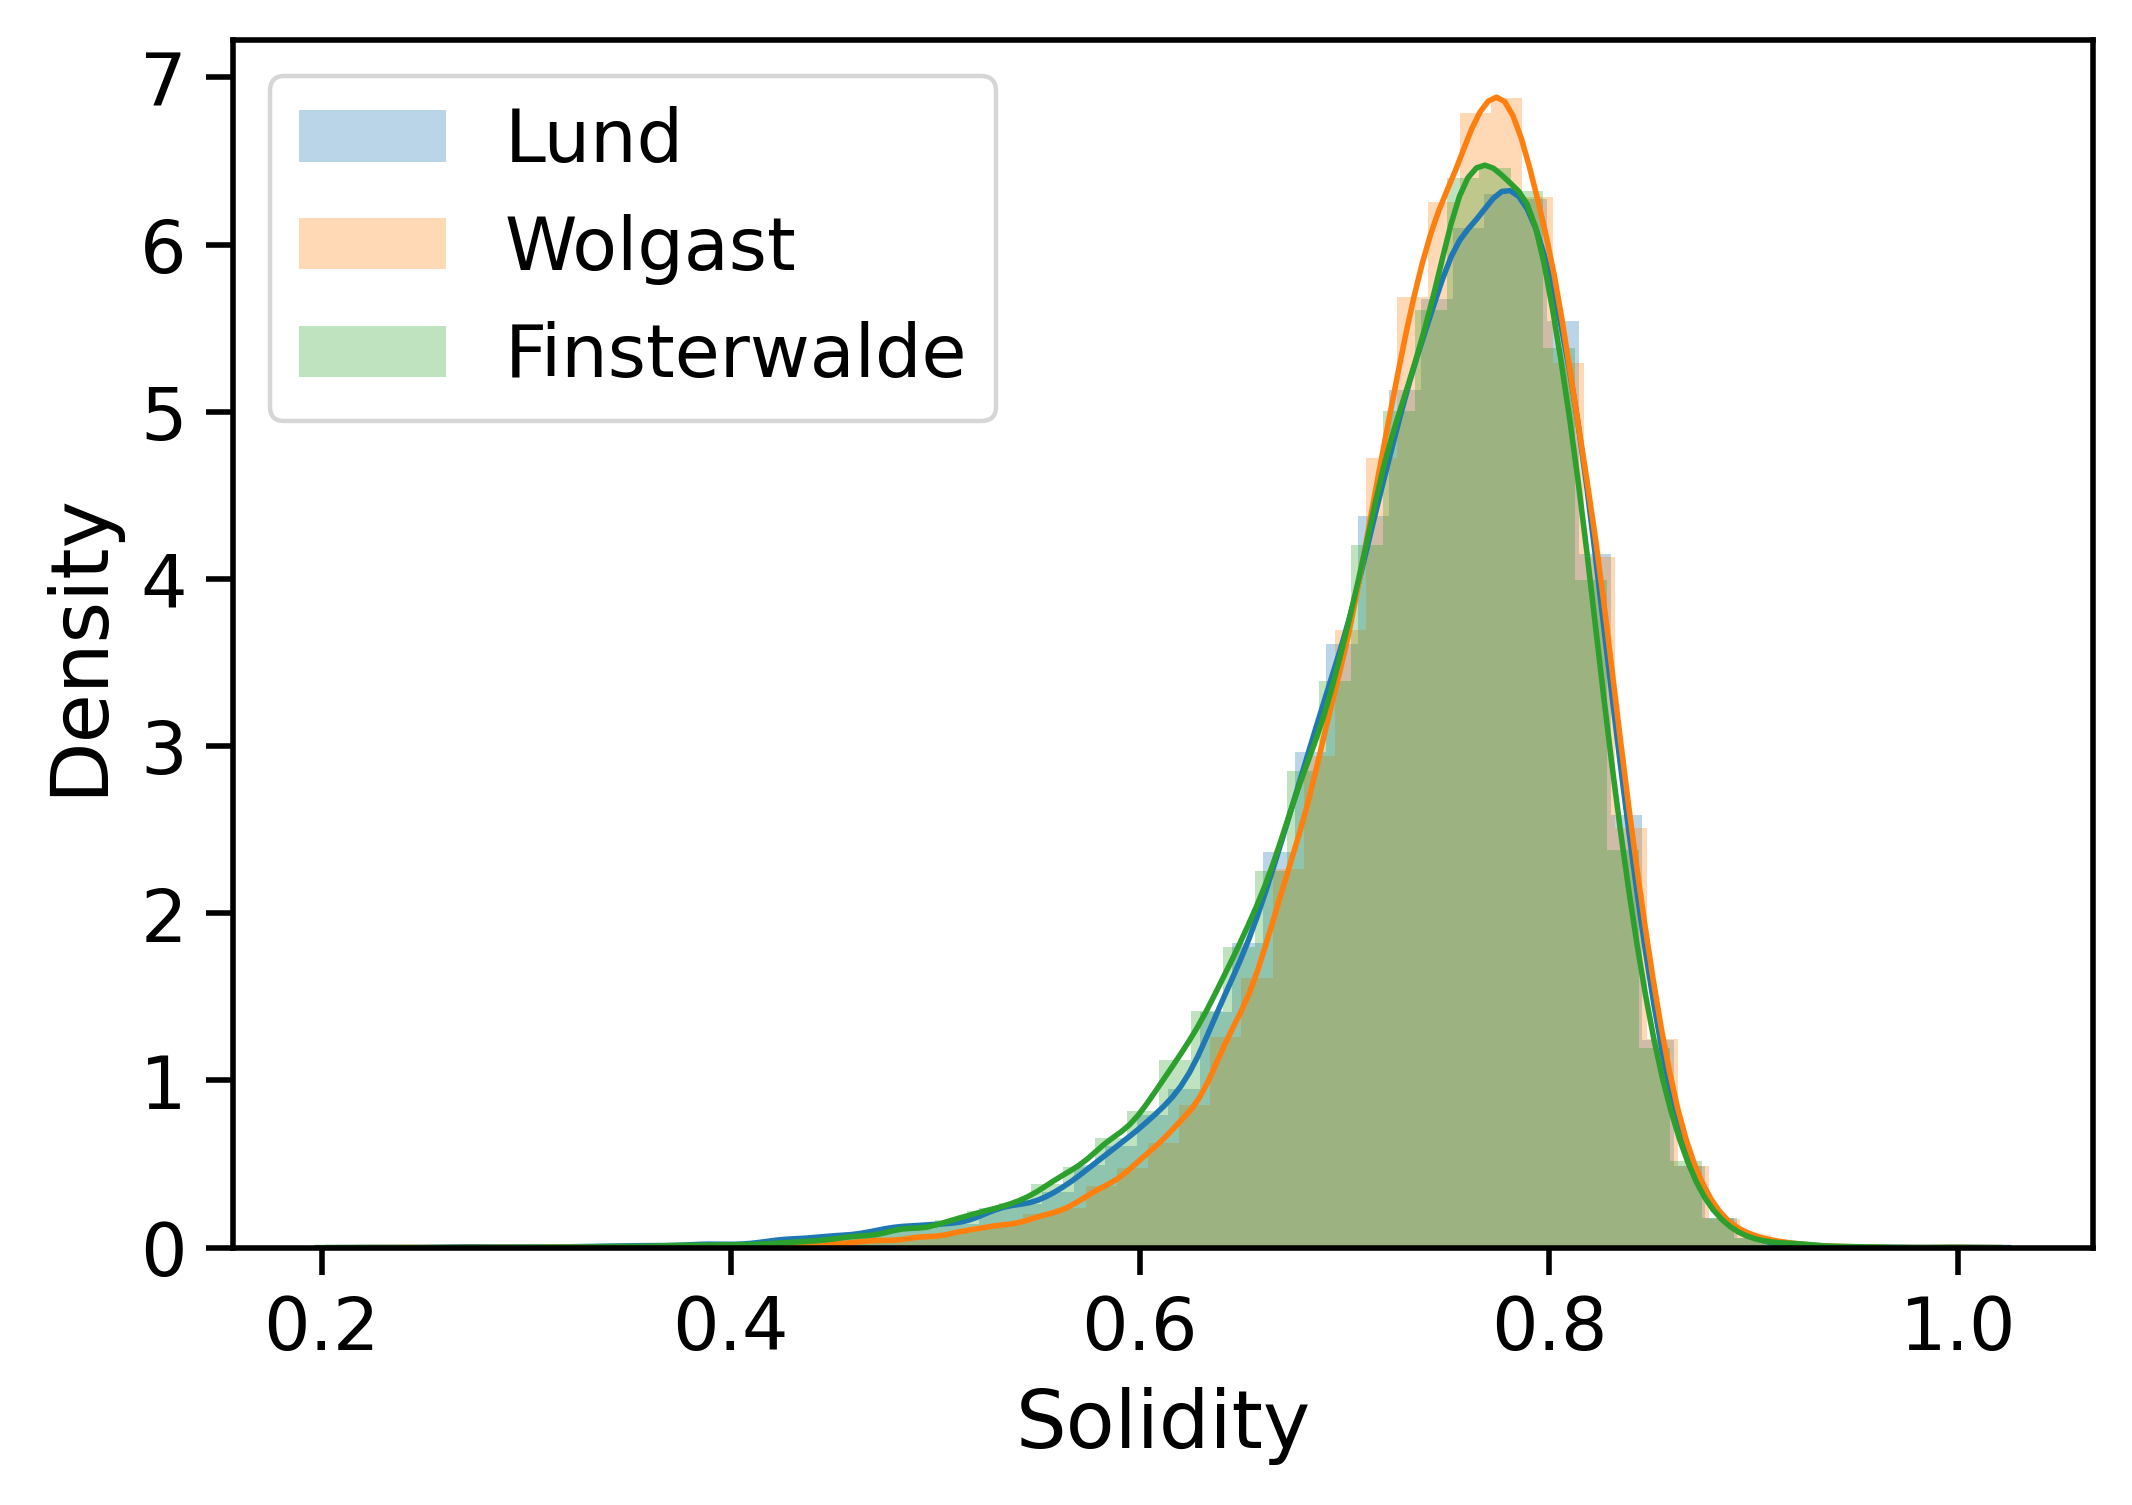

In [44]:
solidity = [prop['solidity'] for prop in props_list]
plot_dataset_comparison(solidity, 'Solidity')

Okay so I was right with the high values but there seems to be a hard cutoff at around 0.9 which I don't understand but it could be something to do with how solidity works with pixels in 3D. We have a really strong flank as well. I have previously talked about my skepticism with solidity as a parameter and I think we need to really double check it before using it.

# Feret Diameter Max
This feature roughly has something to do with how thick an object is. It describes the gap through which the object will fit through maximally. Also one of the weirder ones but I have the feeling that it might behave similarly to area since it is probably determined by the label expansion process:

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

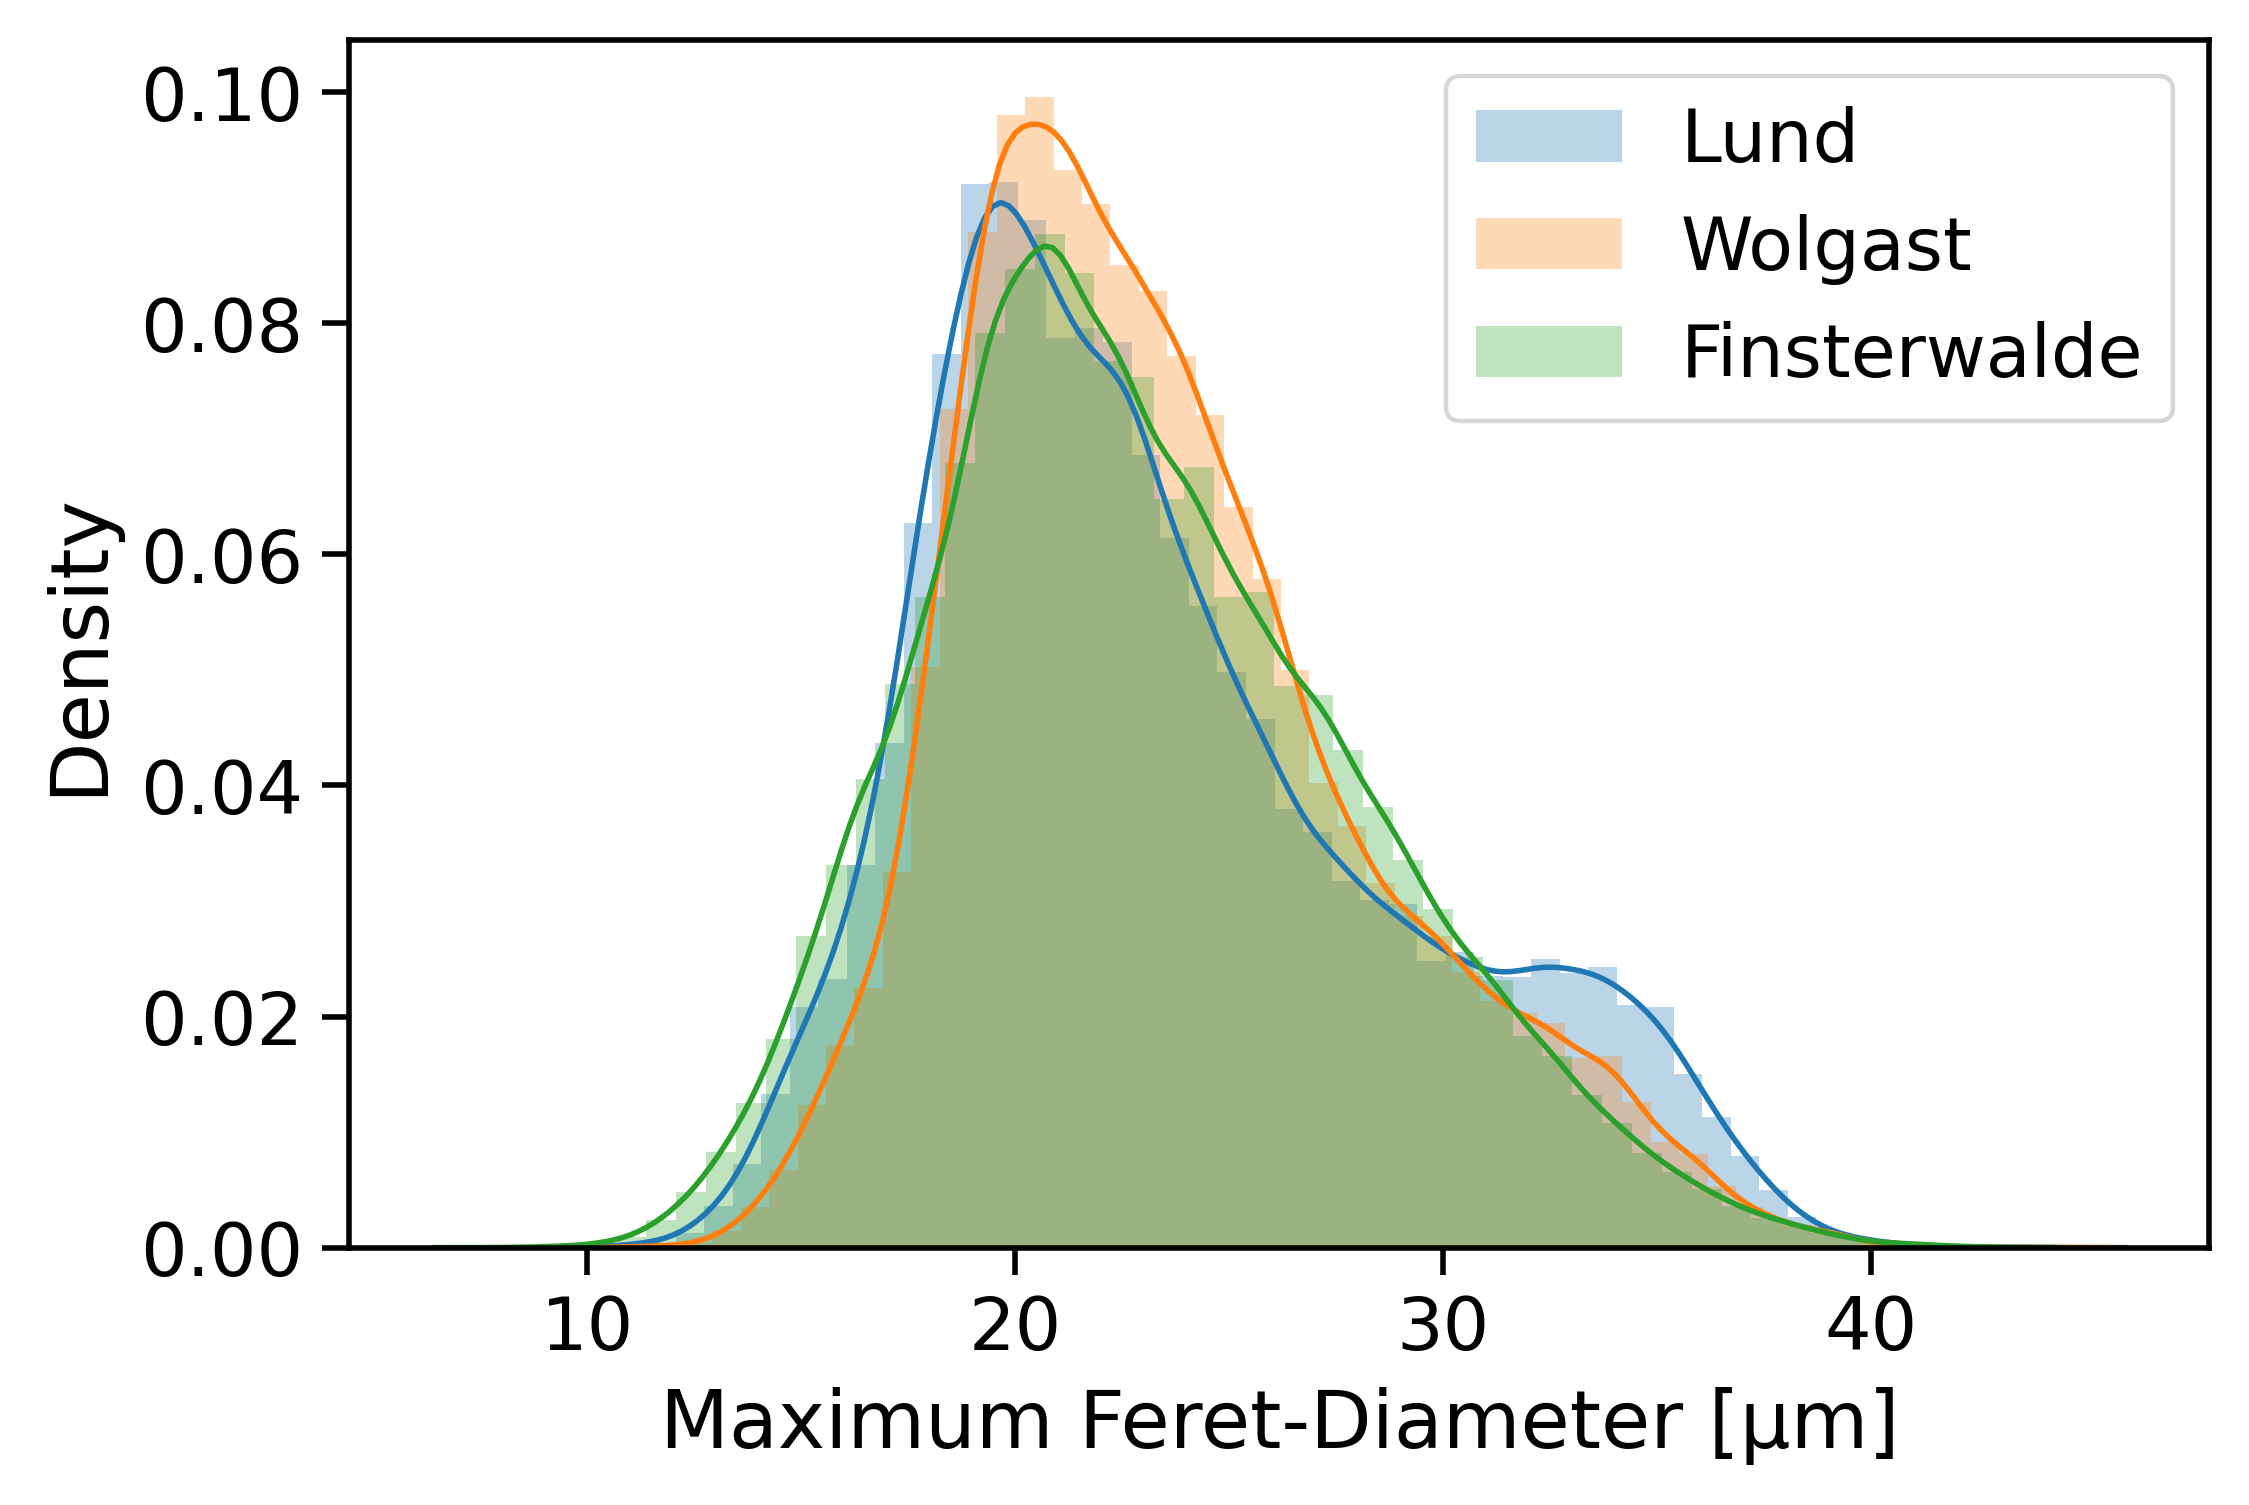

In [13]:
feret_diam_max = [prop['feret_diameter_max'] for prop in props_list]
plot_dataset_comparison(feret_diam_max, 'Maximum Feret-Diameter [\u03BCm]')

As expected it seems to behave similarly to area but with some slight differences. The peak sizes don't differ as much as for area but the separation is equally difficult to see. It should also be said that we don't know if these peaks are actually both corresponding to the same group of cells although it does make sense that smaller objects will have a smaller max feret diameter (but not necessarily). Thinking about it it should scale quite nicely with the major axis length (spoiler alert! it does).

# Minor and Major Axis length
We'll cover both of these features in one plot just because I imagine they are going to be similar and it feels right. Again these are features that should kind of scale with area because of label expansion but I think the minor axis length is definitely more influenced by neighboring cells and the geometry of the embryo, so it might have a different kind of distribution:

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

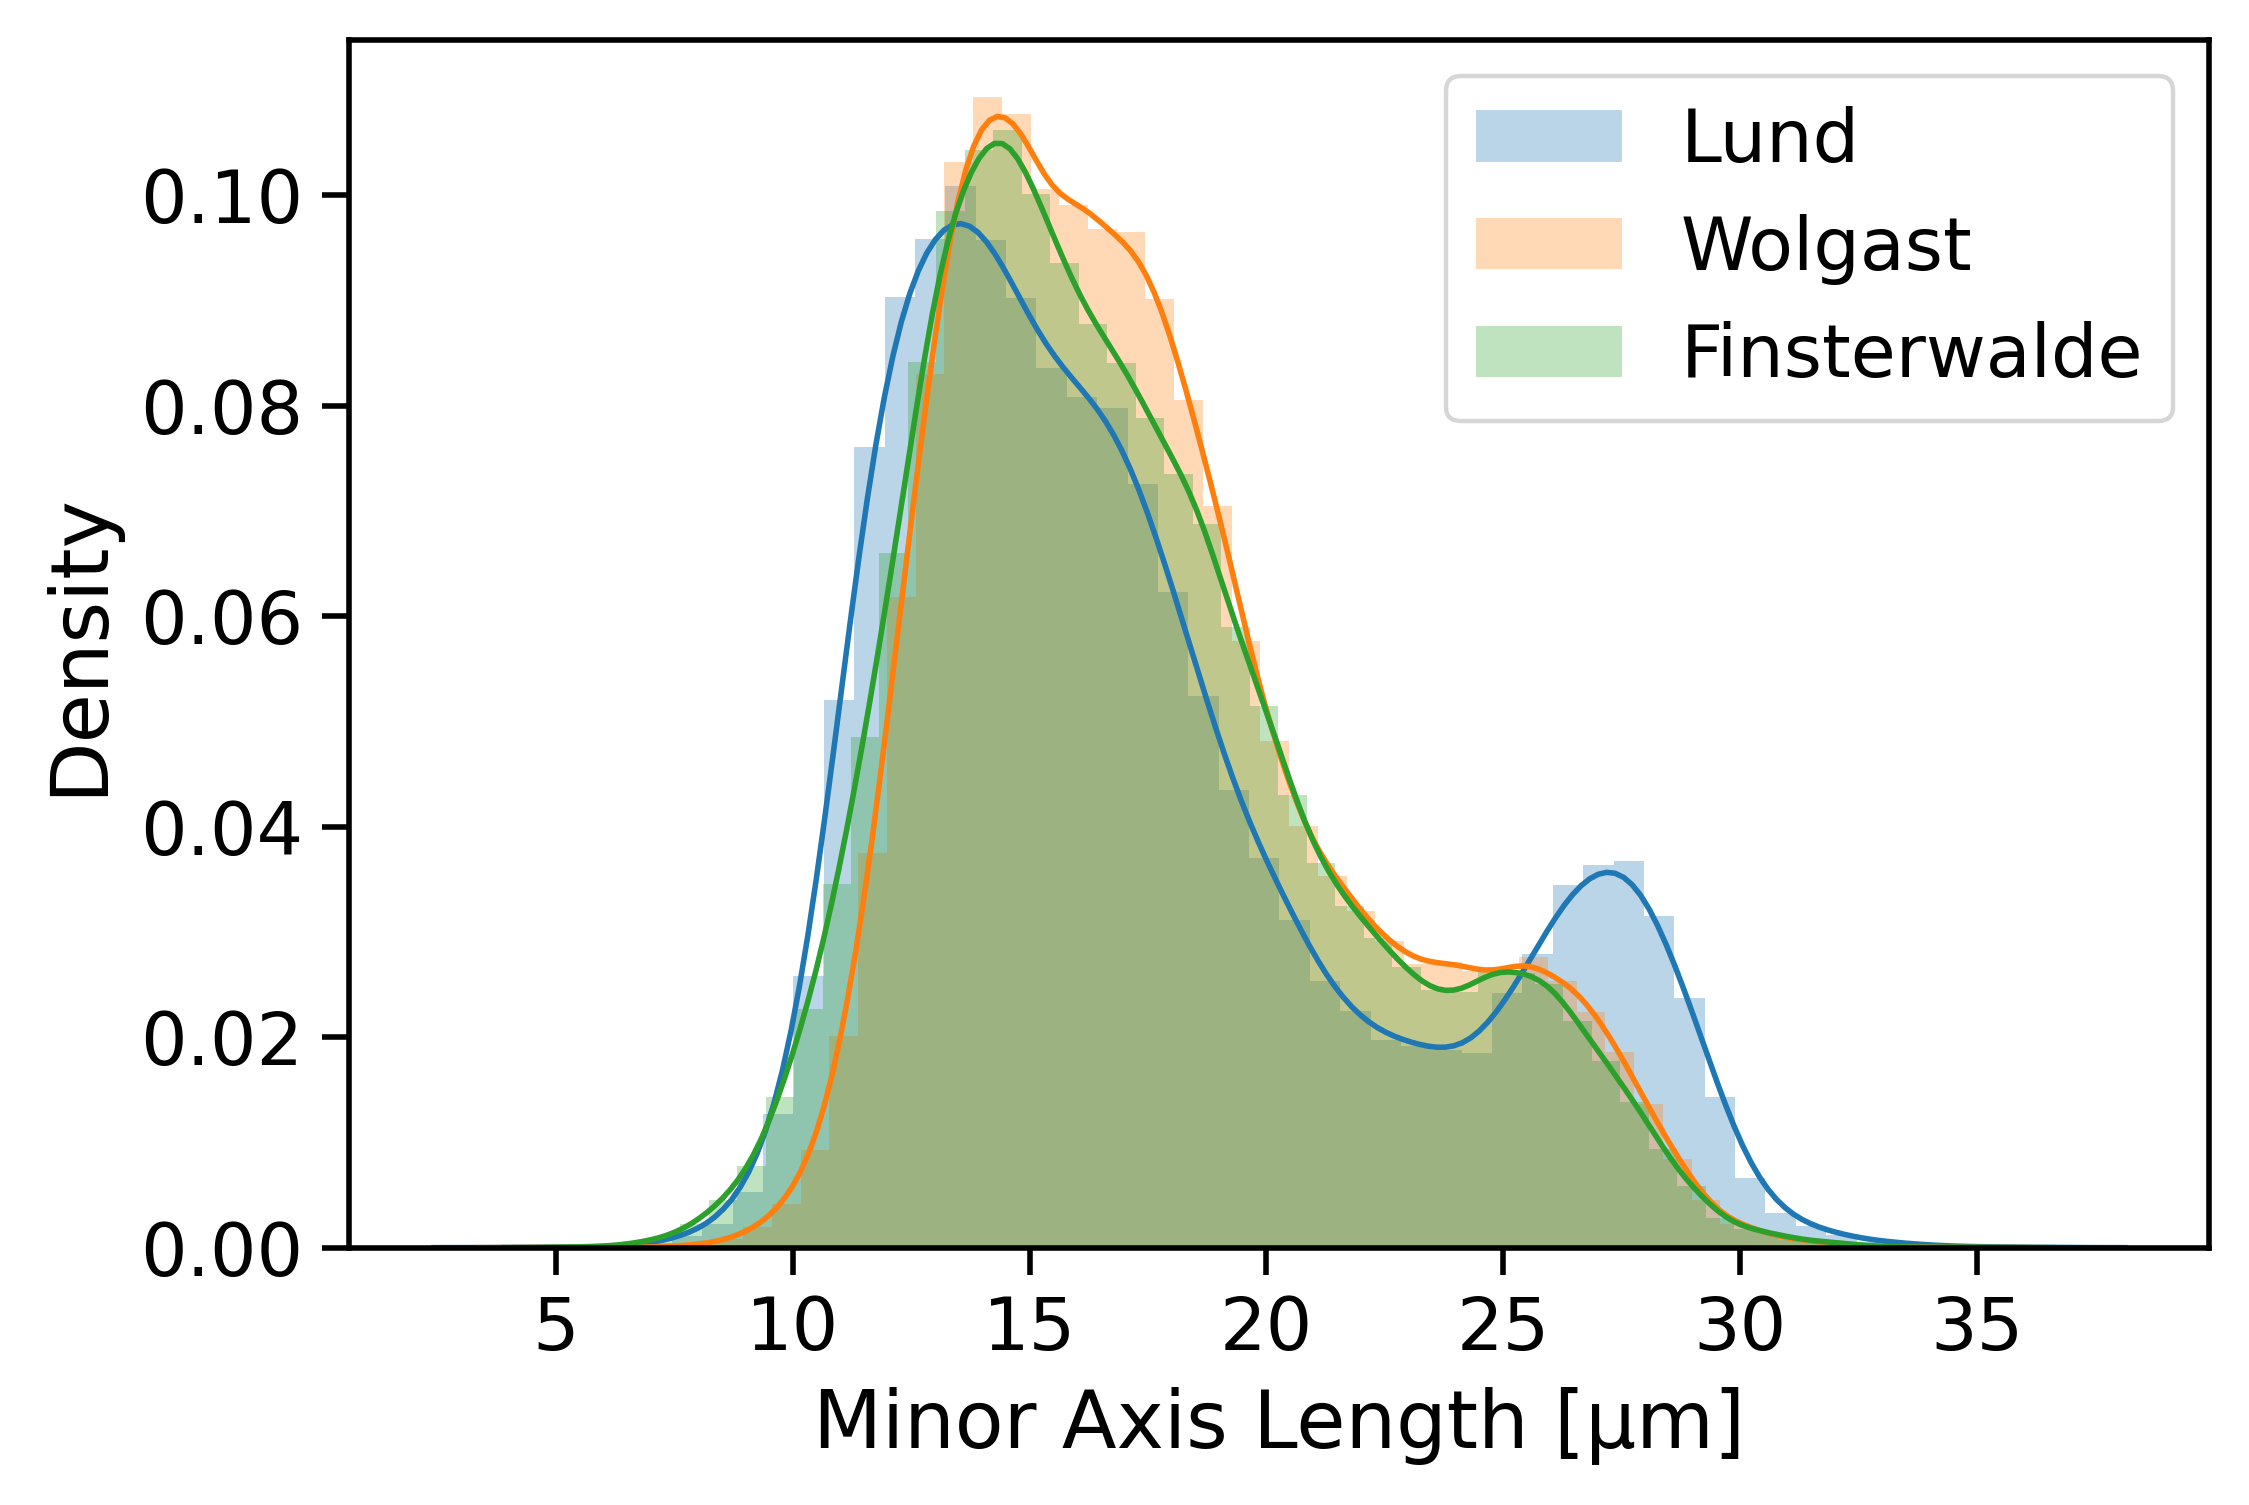

In [14]:

min_ax_length = [prop['minor_axis_length'] for prop in props_list]
plot_dataset_comparison(min_ax_length, 'Minor Axis Length [\u03BCm]')

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

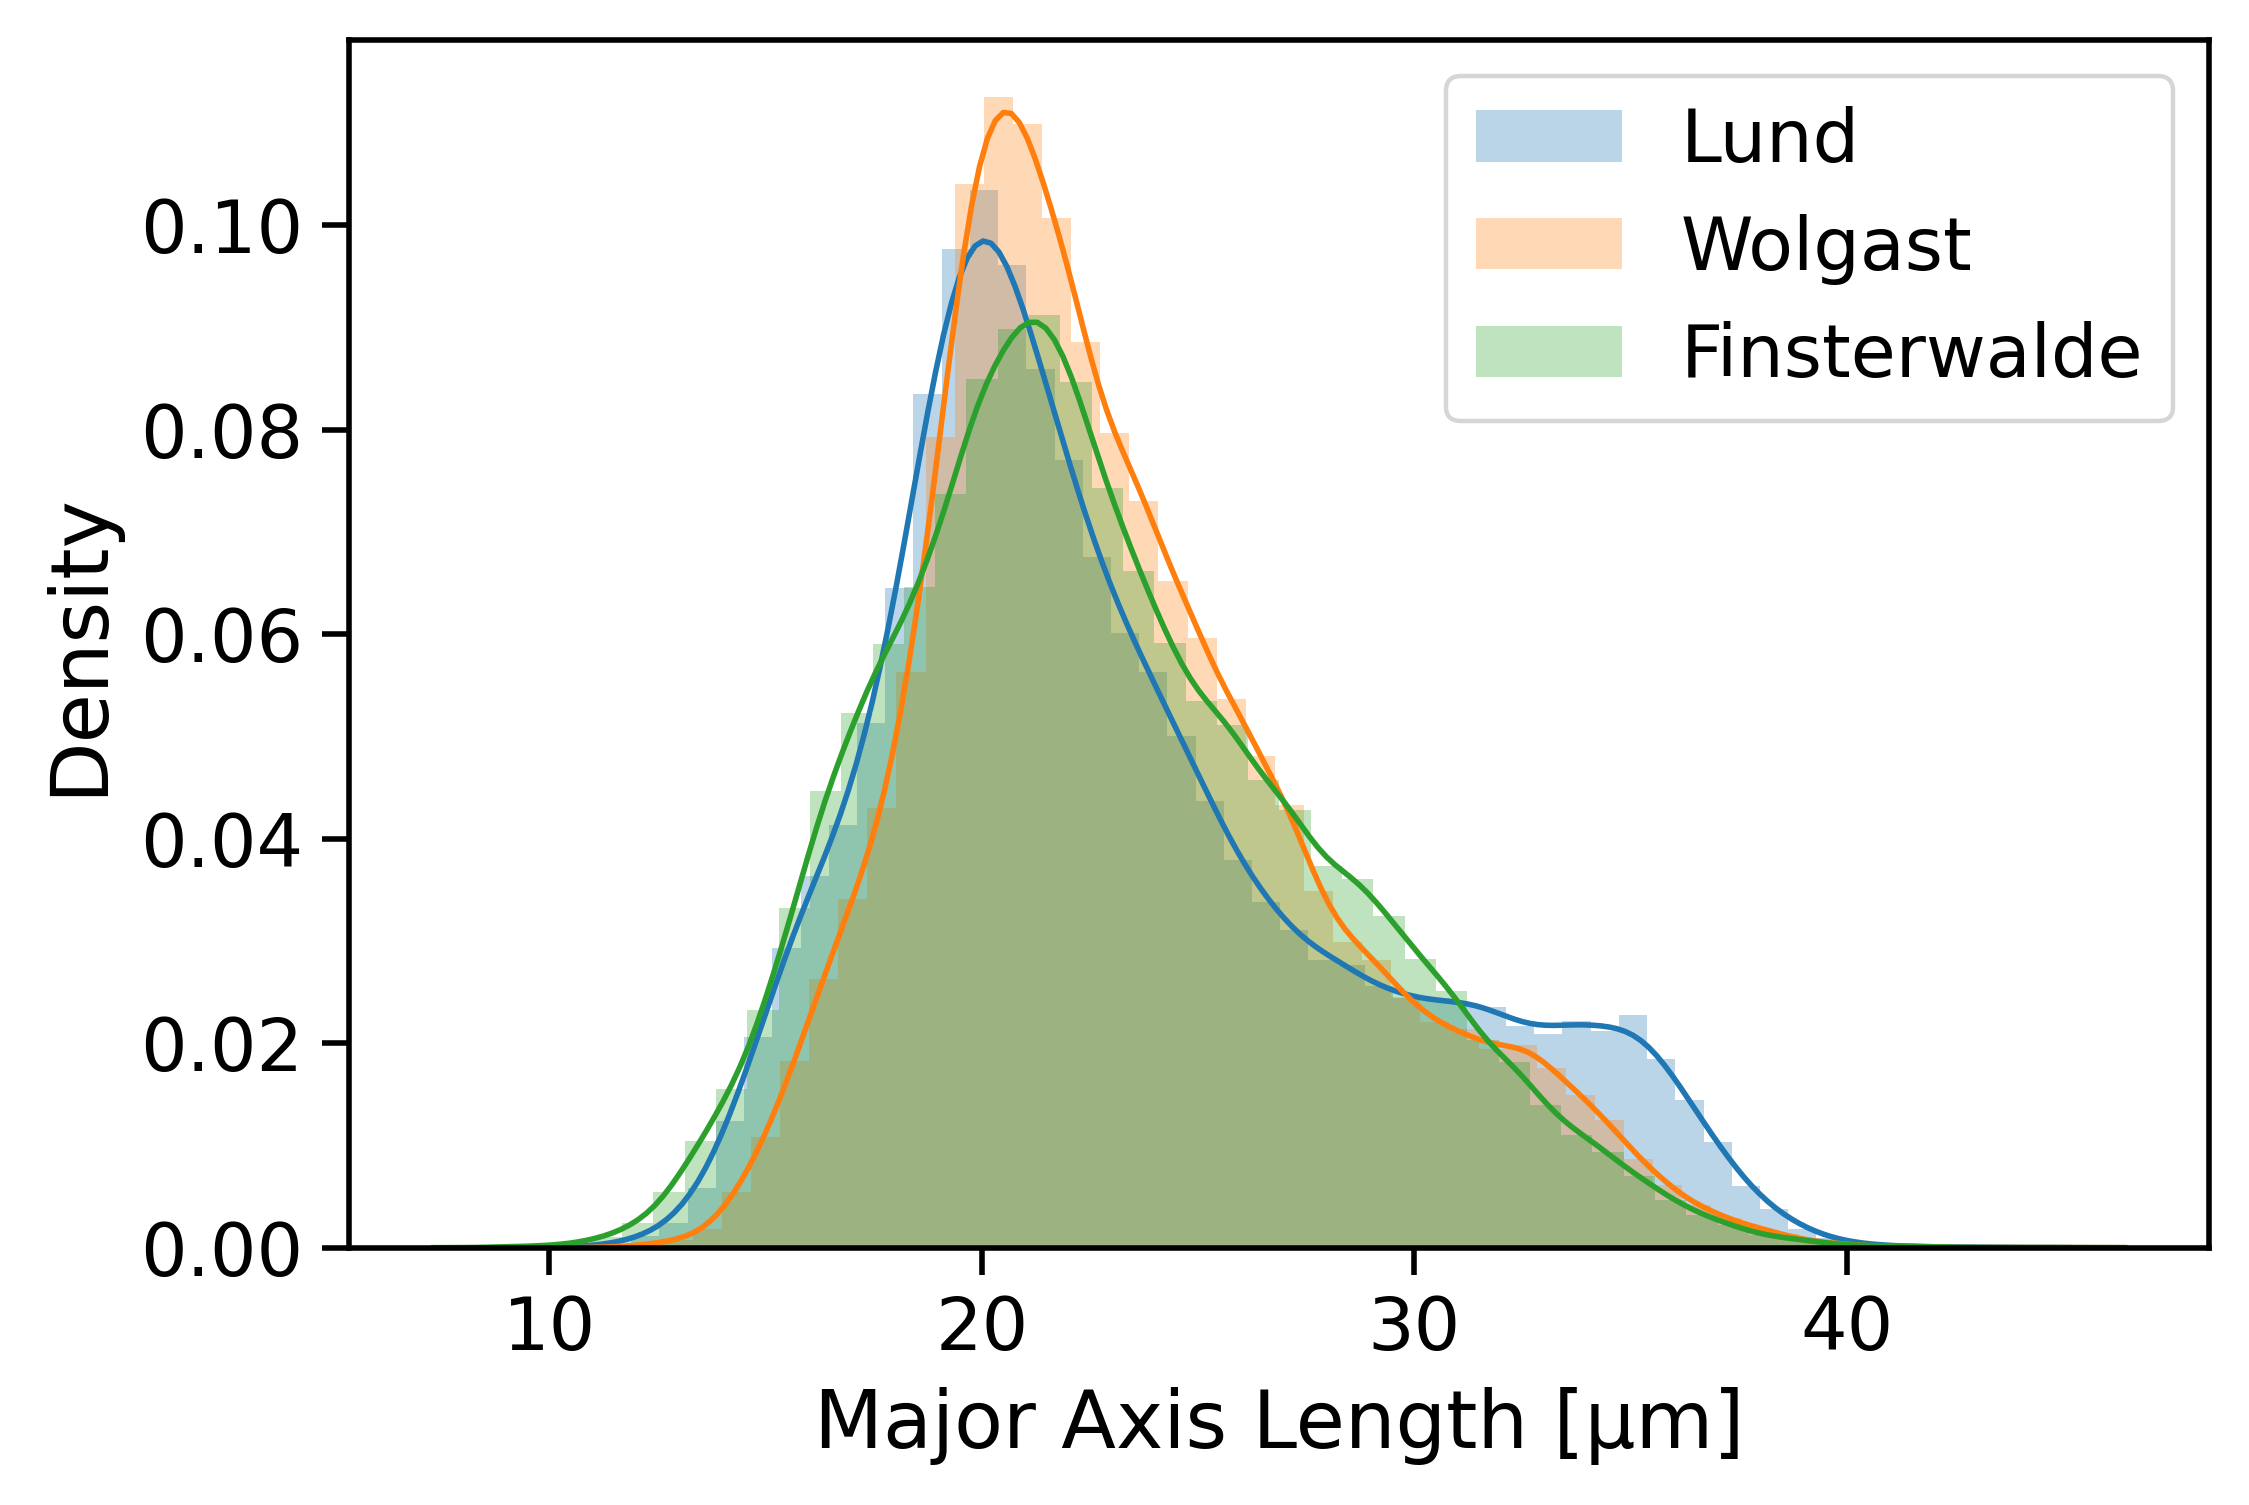

In [15]:
maj_ax_length = [prop['major_axis_length'] for prop in props_list]
plot_dataset_comparison(maj_ax_length, 'Major Axis Length [\u03BCm]')

In [50]:
props_list = [tc.min_maj_ax_to_aspectr(prop) for prop in props_list]

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

(1.0, 3.0)

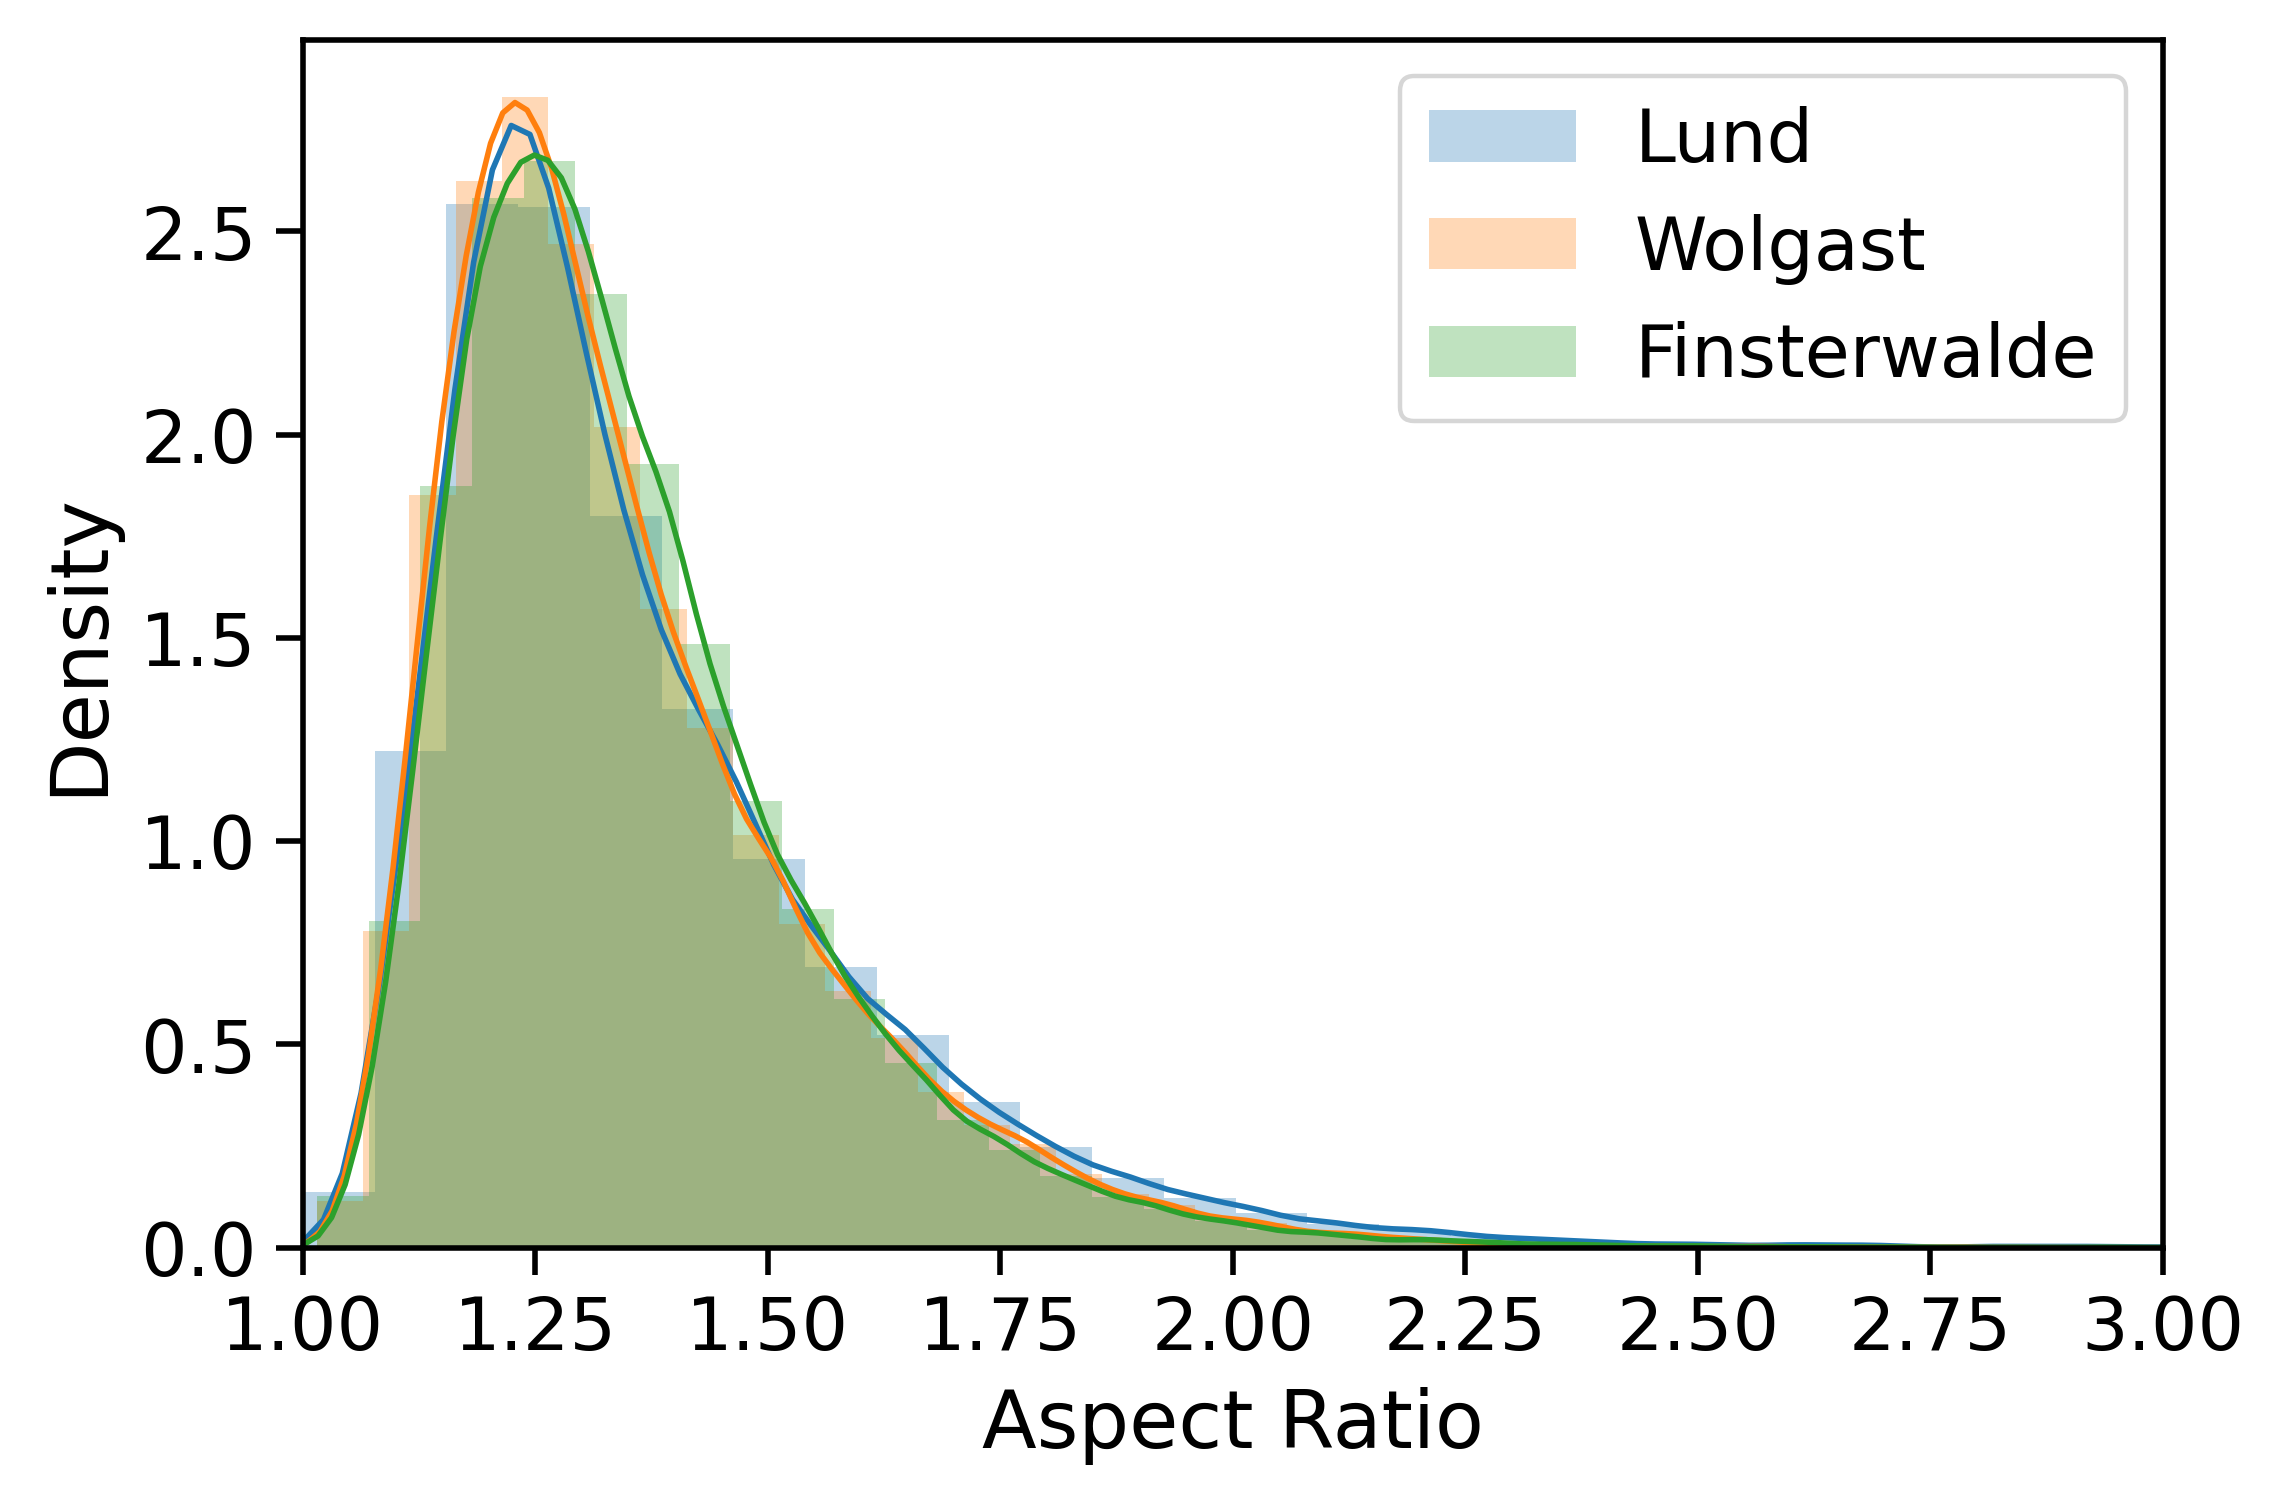

In [51]:


aspect = [prop['aspect_ratio'] for prop in props_list]
plot_dataset_comparison(aspect, 'Aspect Ratio')
plt.xlim([1,3])

As I expected there are some differences between minor and major axis length. Minor axis length has two very clearly separated peaks, whereas major axis length does not. It almost looks like major axis length has three peaks: one between the two that are similar to the ones in minor axis length. Maybe some timepoints exist where this third group can be found?

# Intensity Values
This is a group of features we really need to be careful with. Since they are mostly determined by imaging peculiarities they are most likely to actually introduce Irrelevant data in the form of imaging artefacts. Nevertheless they might be good parameters to find groupings, the question is do we want those kinds of results? It might be interestig to me to find that out but any biologist will shake their head in disappointment since it has no biological relevance. Anyway, let's look at them anyway and we'll do that combined like in the plot above:
## Lund

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

Text(0.5, 0, 'Intensity')

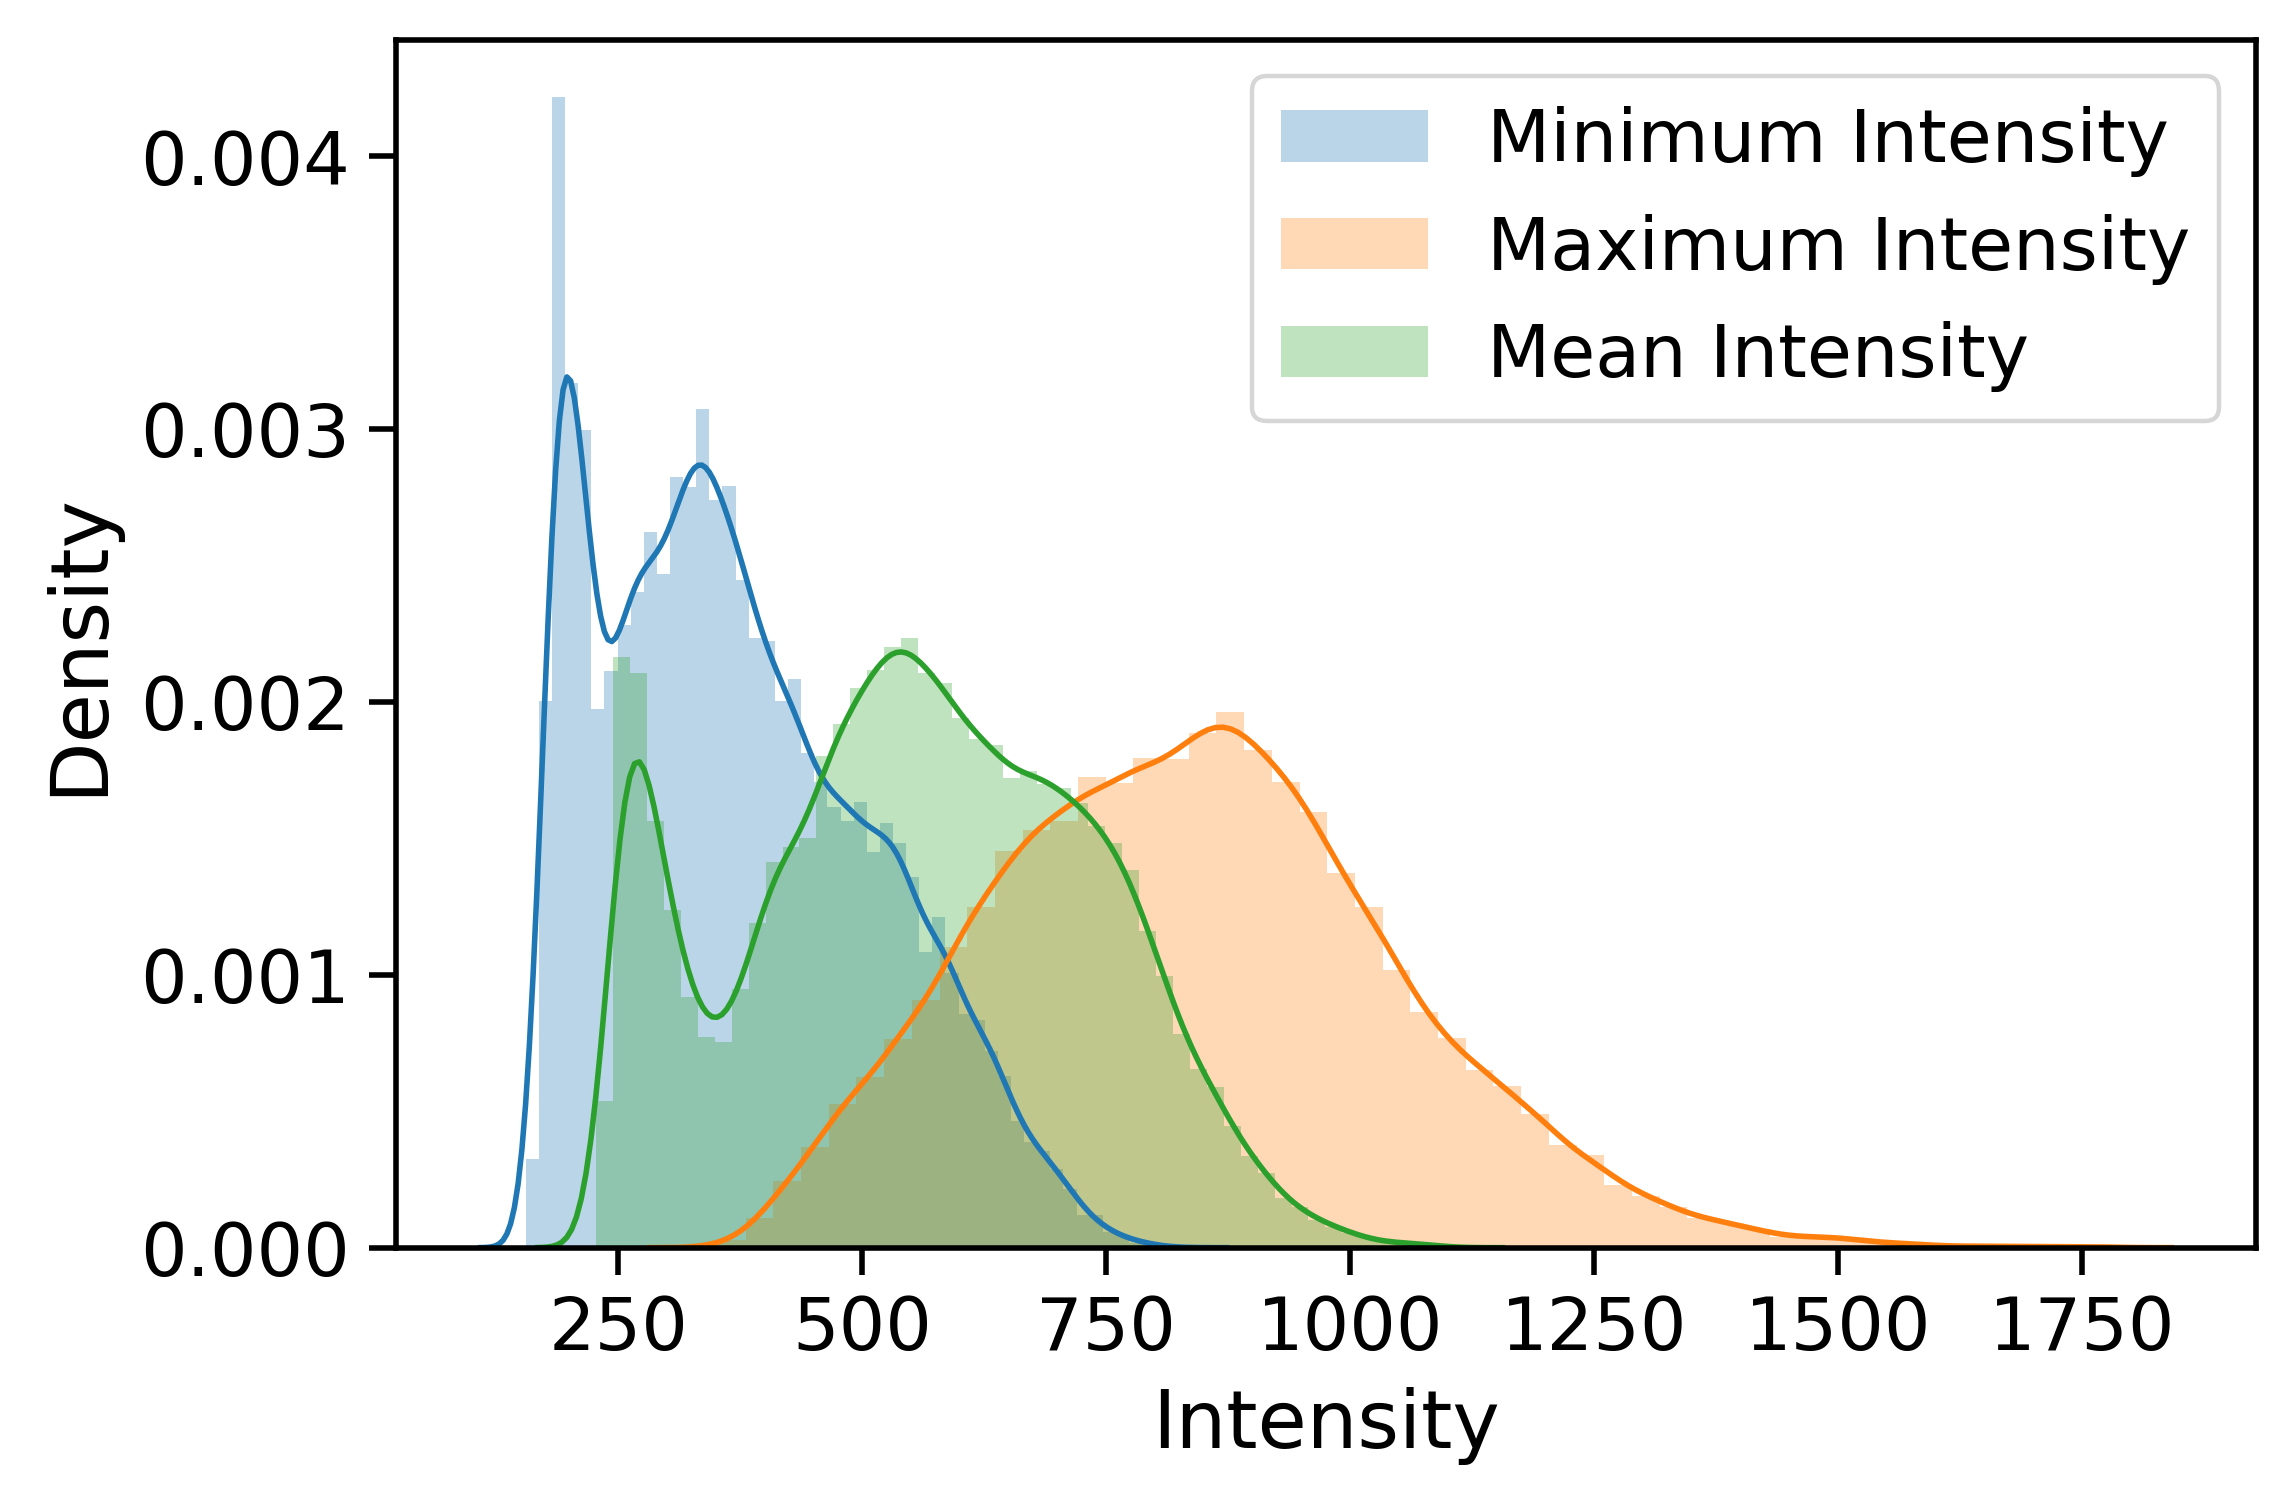

In [54]:
min_int = props_list[0]['min_intensity'].tolist()
max_int = props_list[0]['max_intensity'].tolist()
mean_int= props_list[0]['mean_intensity'].tolist()

kwargs = dict(hist_kws={'alpha':0.3}, kde_kws={'linewidth':1})

plt.figure(figsize =(6,4), dpi = 400)
sns.distplot(min_int, label = 'Minimum Intensity',**kwargs)
sns.distplot(max_int, label = 'Maximum Intensity',**kwargs)
sns.distplot(mean_int, label = 'Mean Intensity',**kwargs)
plt.legend()
plt.xlabel('Intensity')

## Wolgast

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

Text(0.5, 0, 'Intensity')

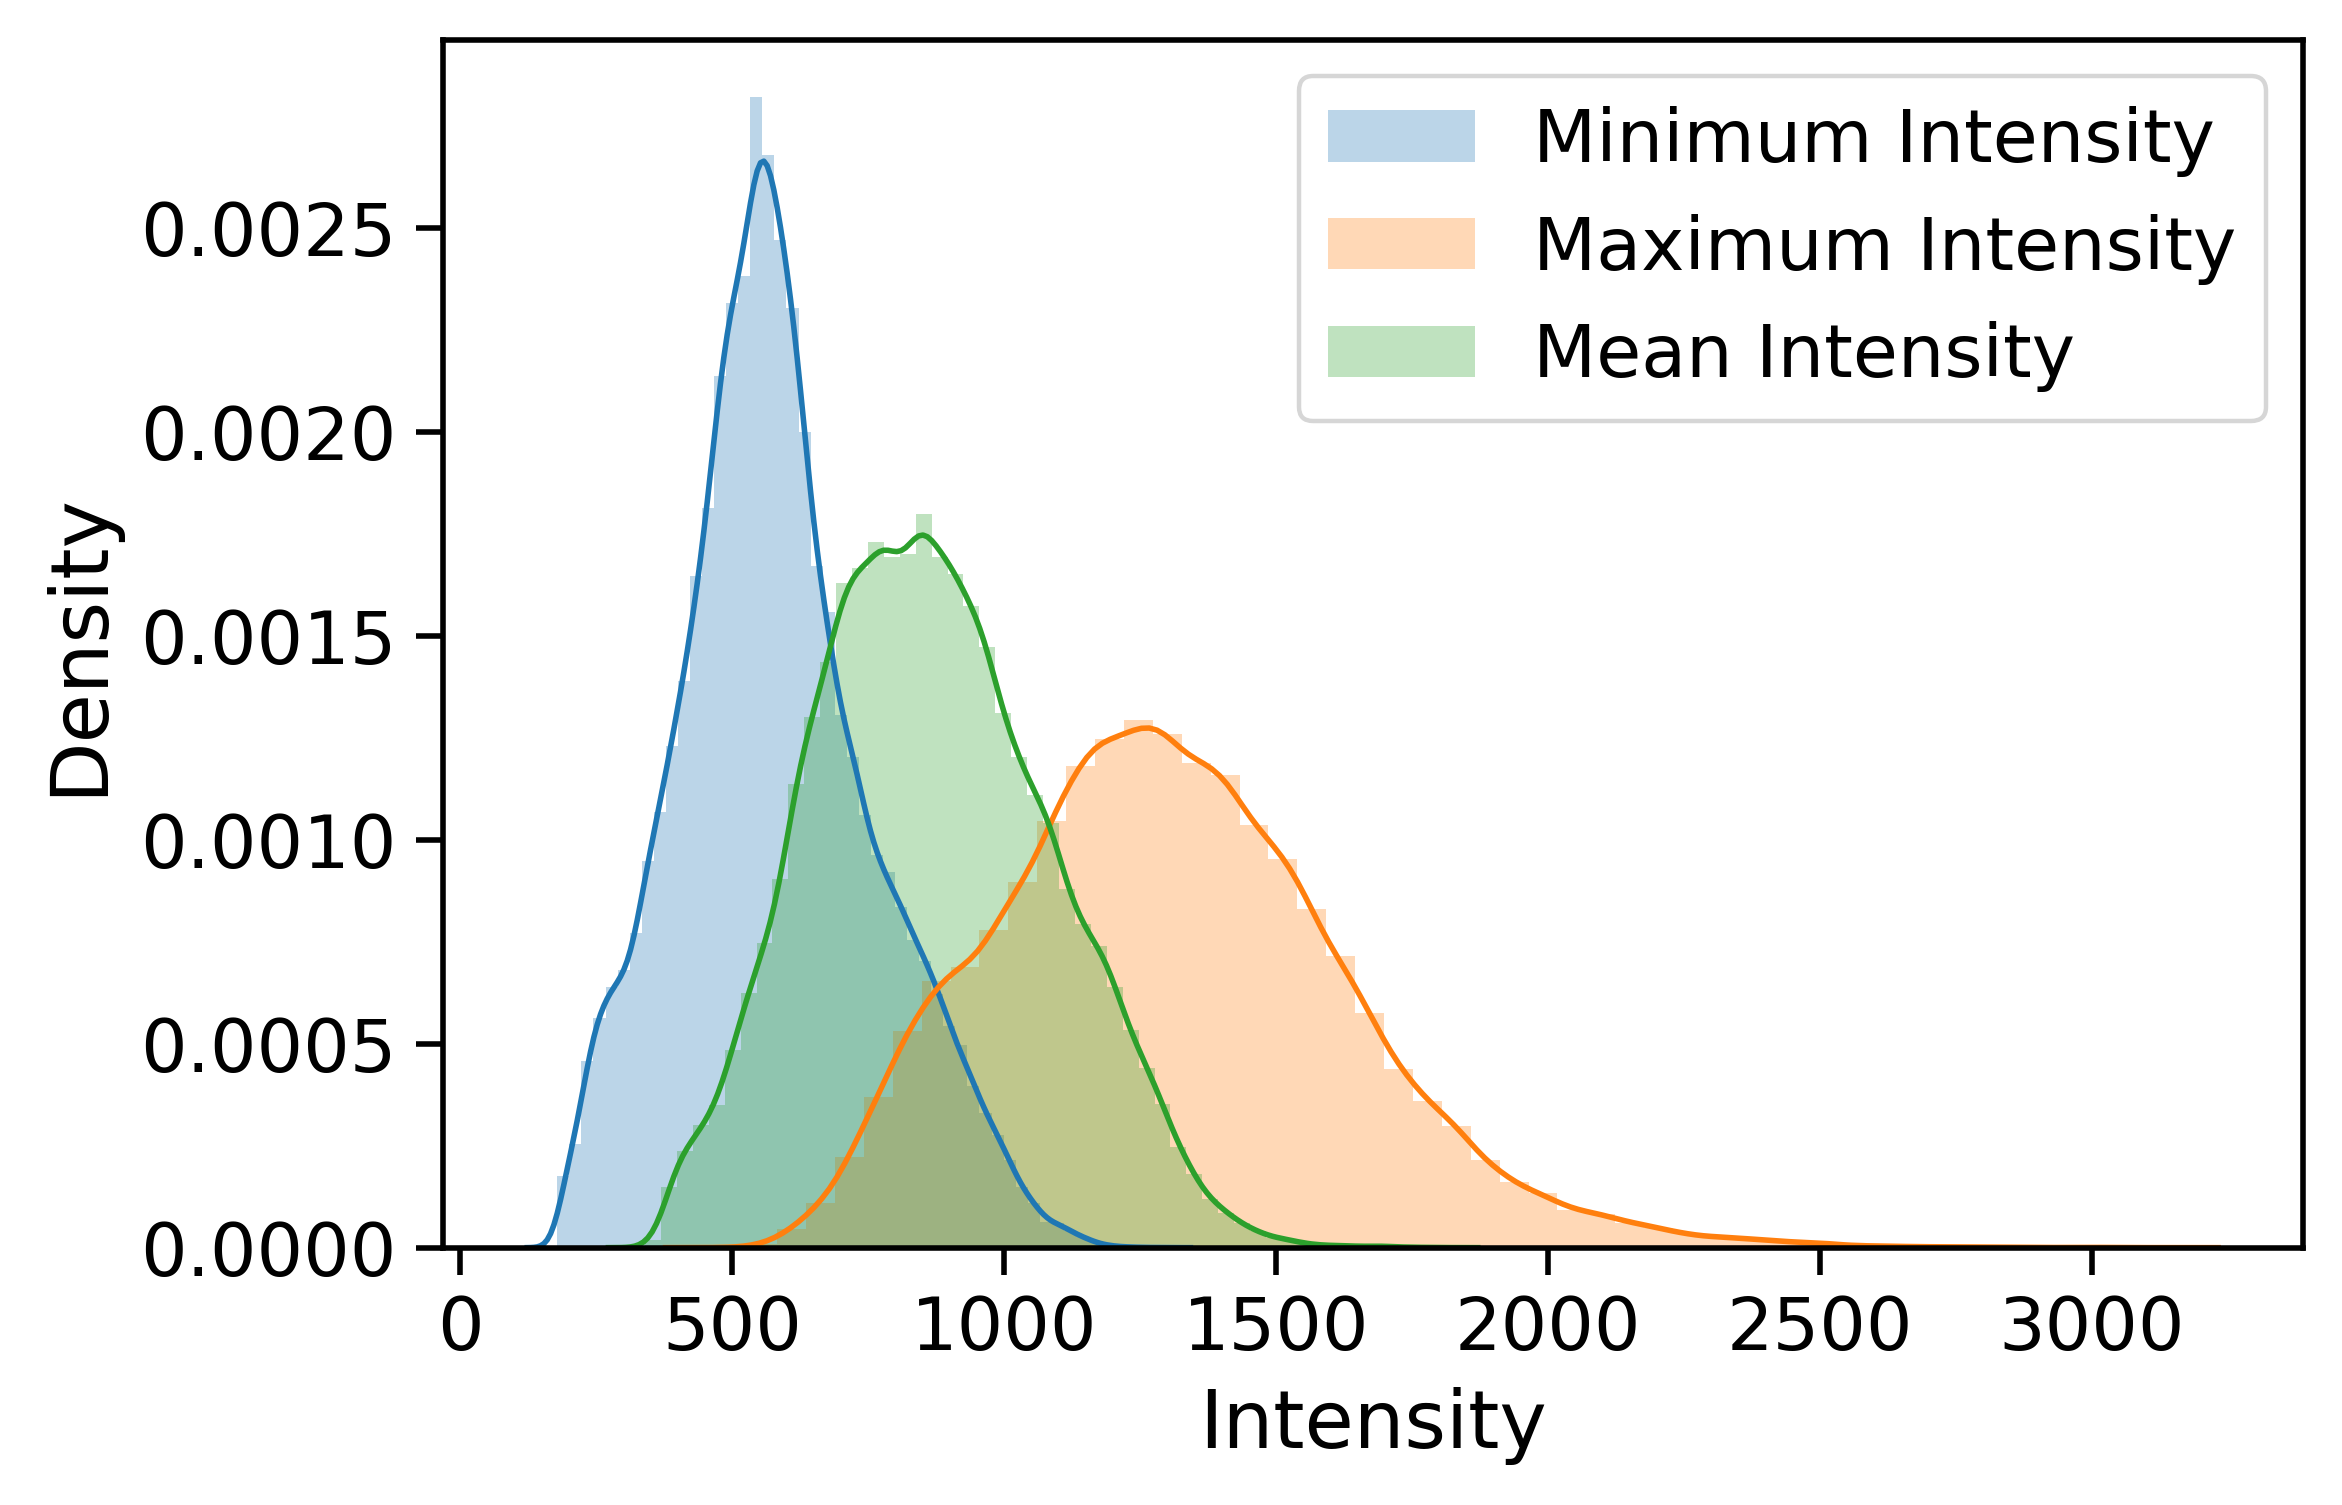

In [56]:
min_int = props_list[1]['min_intensity'].tolist()
max_int = props_list[1]['max_intensity'].tolist()
mean_int= props_list[1]['mean_intensity'].tolist()

kwargs = dict(hist_kws={'alpha':0.3}, kde_kws={'linewidth':1})

plt.figure(figsize =(6,4), dpi = 400)
sns.distplot(min_int, label = 'Minimum Intensity',**kwargs)
sns.distplot(max_int, label = 'Maximum Intensity',**kwargs)
sns.distplot(mean_int, label = 'Mean Intensity',**kwargs)
plt.legend()
plt.xlabel('Intensity')

## Finsterwalde

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

Text(0.5, 0, 'Intensity')

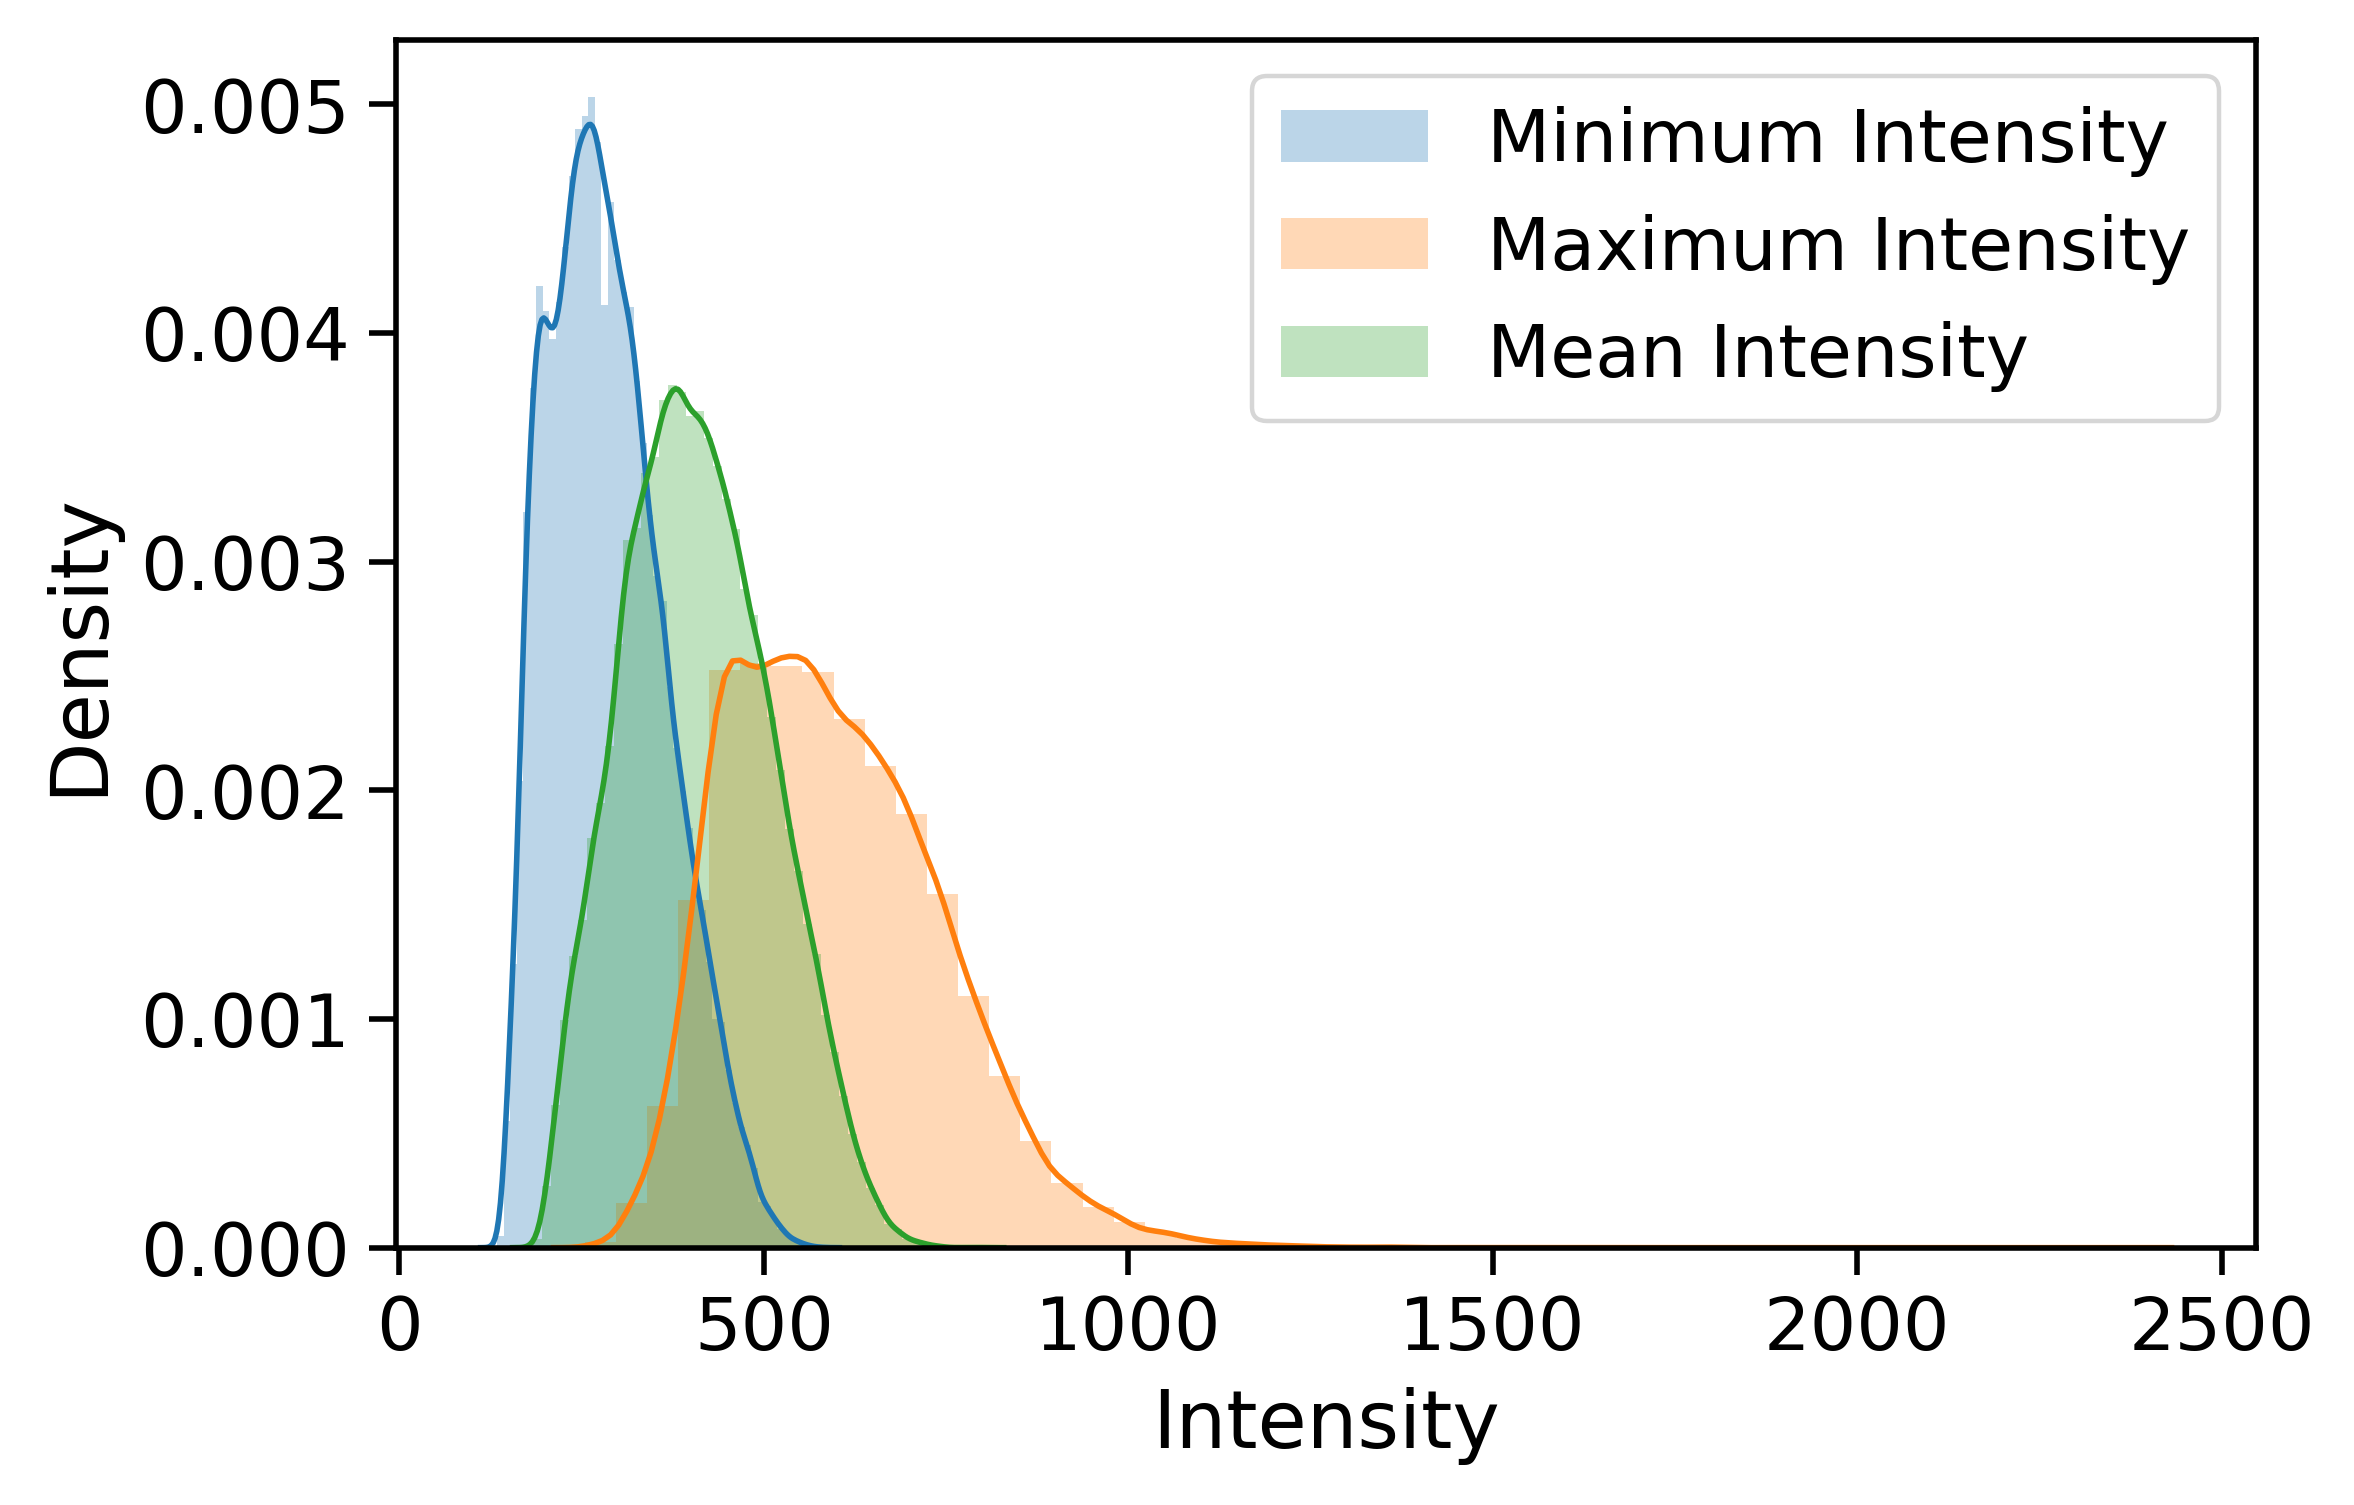

In [57]:
min_int = props_list[2]['min_intensity'].tolist()
max_int = props_list[2]['max_intensity'].tolist()
mean_int= props_list[2]['mean_intensity'].tolist()

kwargs = dict(hist_kws={'alpha':0.3}, kde_kws={'linewidth':1})

plt.figure(figsize =(6,4), dpi = 400)
sns.distplot(min_int, label = 'Minimum Intensity',**kwargs)
sns.distplot(max_int, label = 'Maximum Intensity',**kwargs)
sns.distplot(mean_int, label = 'Mean Intensity',**kwargs)
plt.legend()
plt.xlabel('Intensity')

## Combined Intensity Plots

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

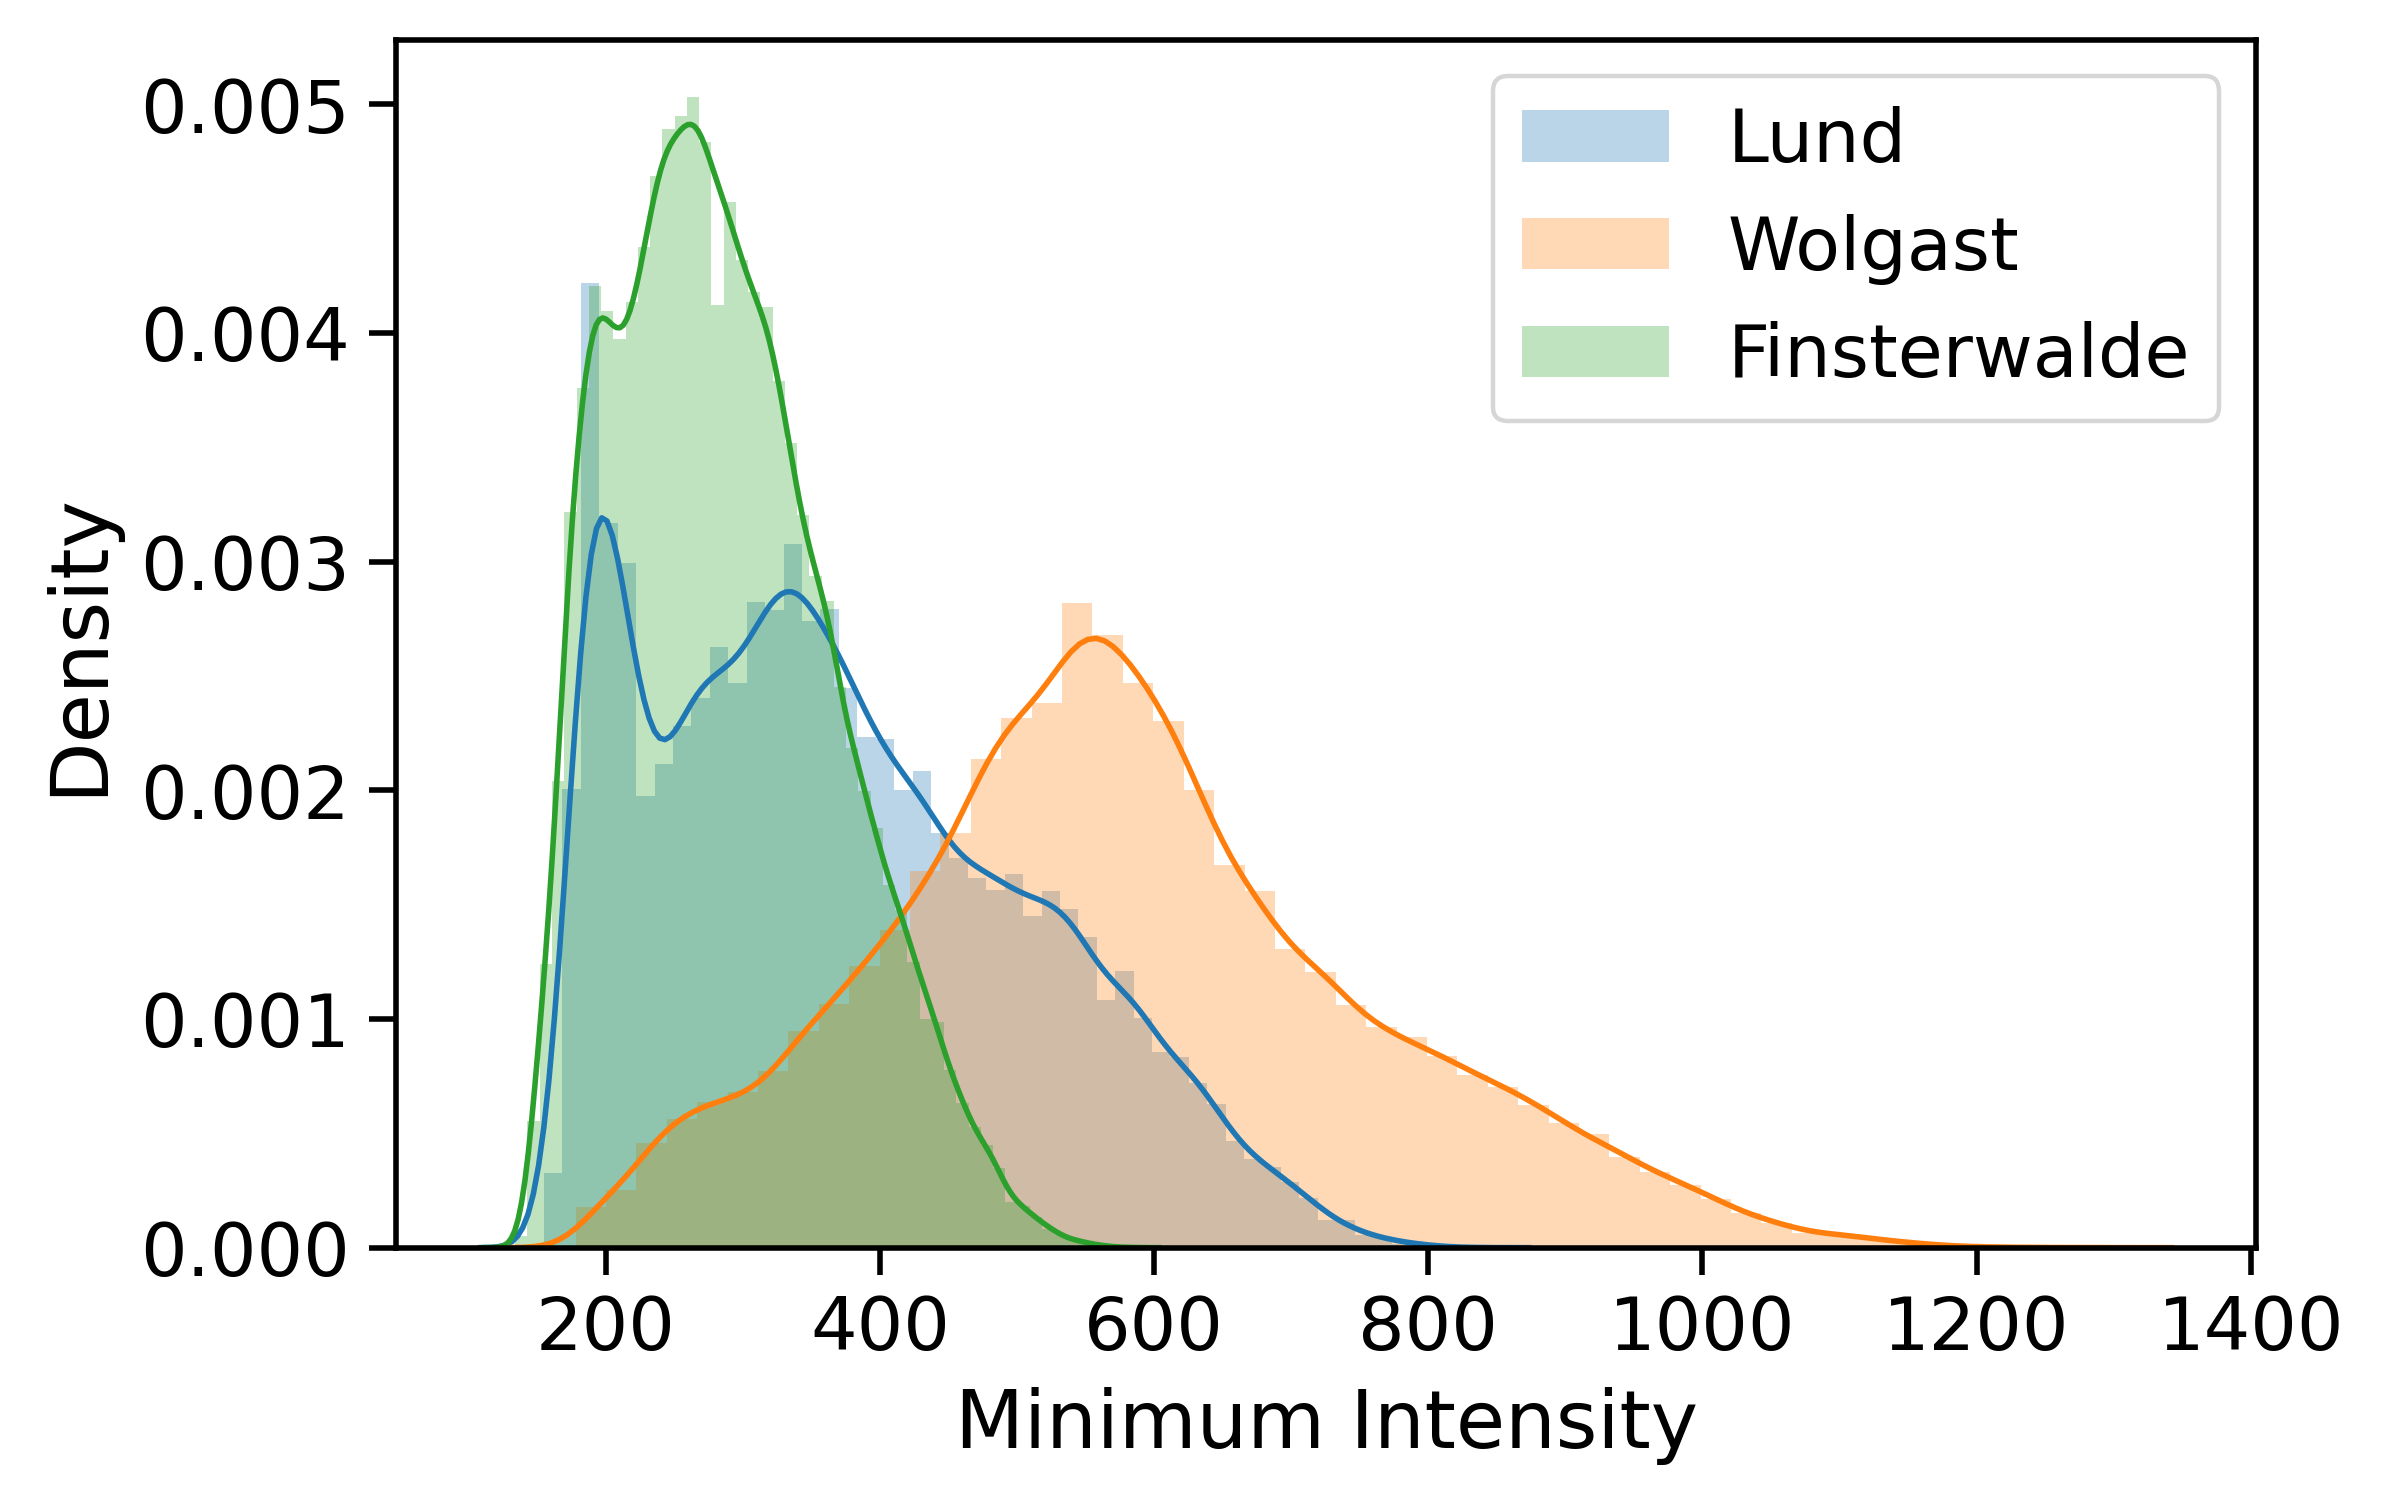

In [58]:
minint = [prop['min_intensity'] for prop in props_list]
plot_dataset_comparison(minint, 'Minimum Intensity')

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

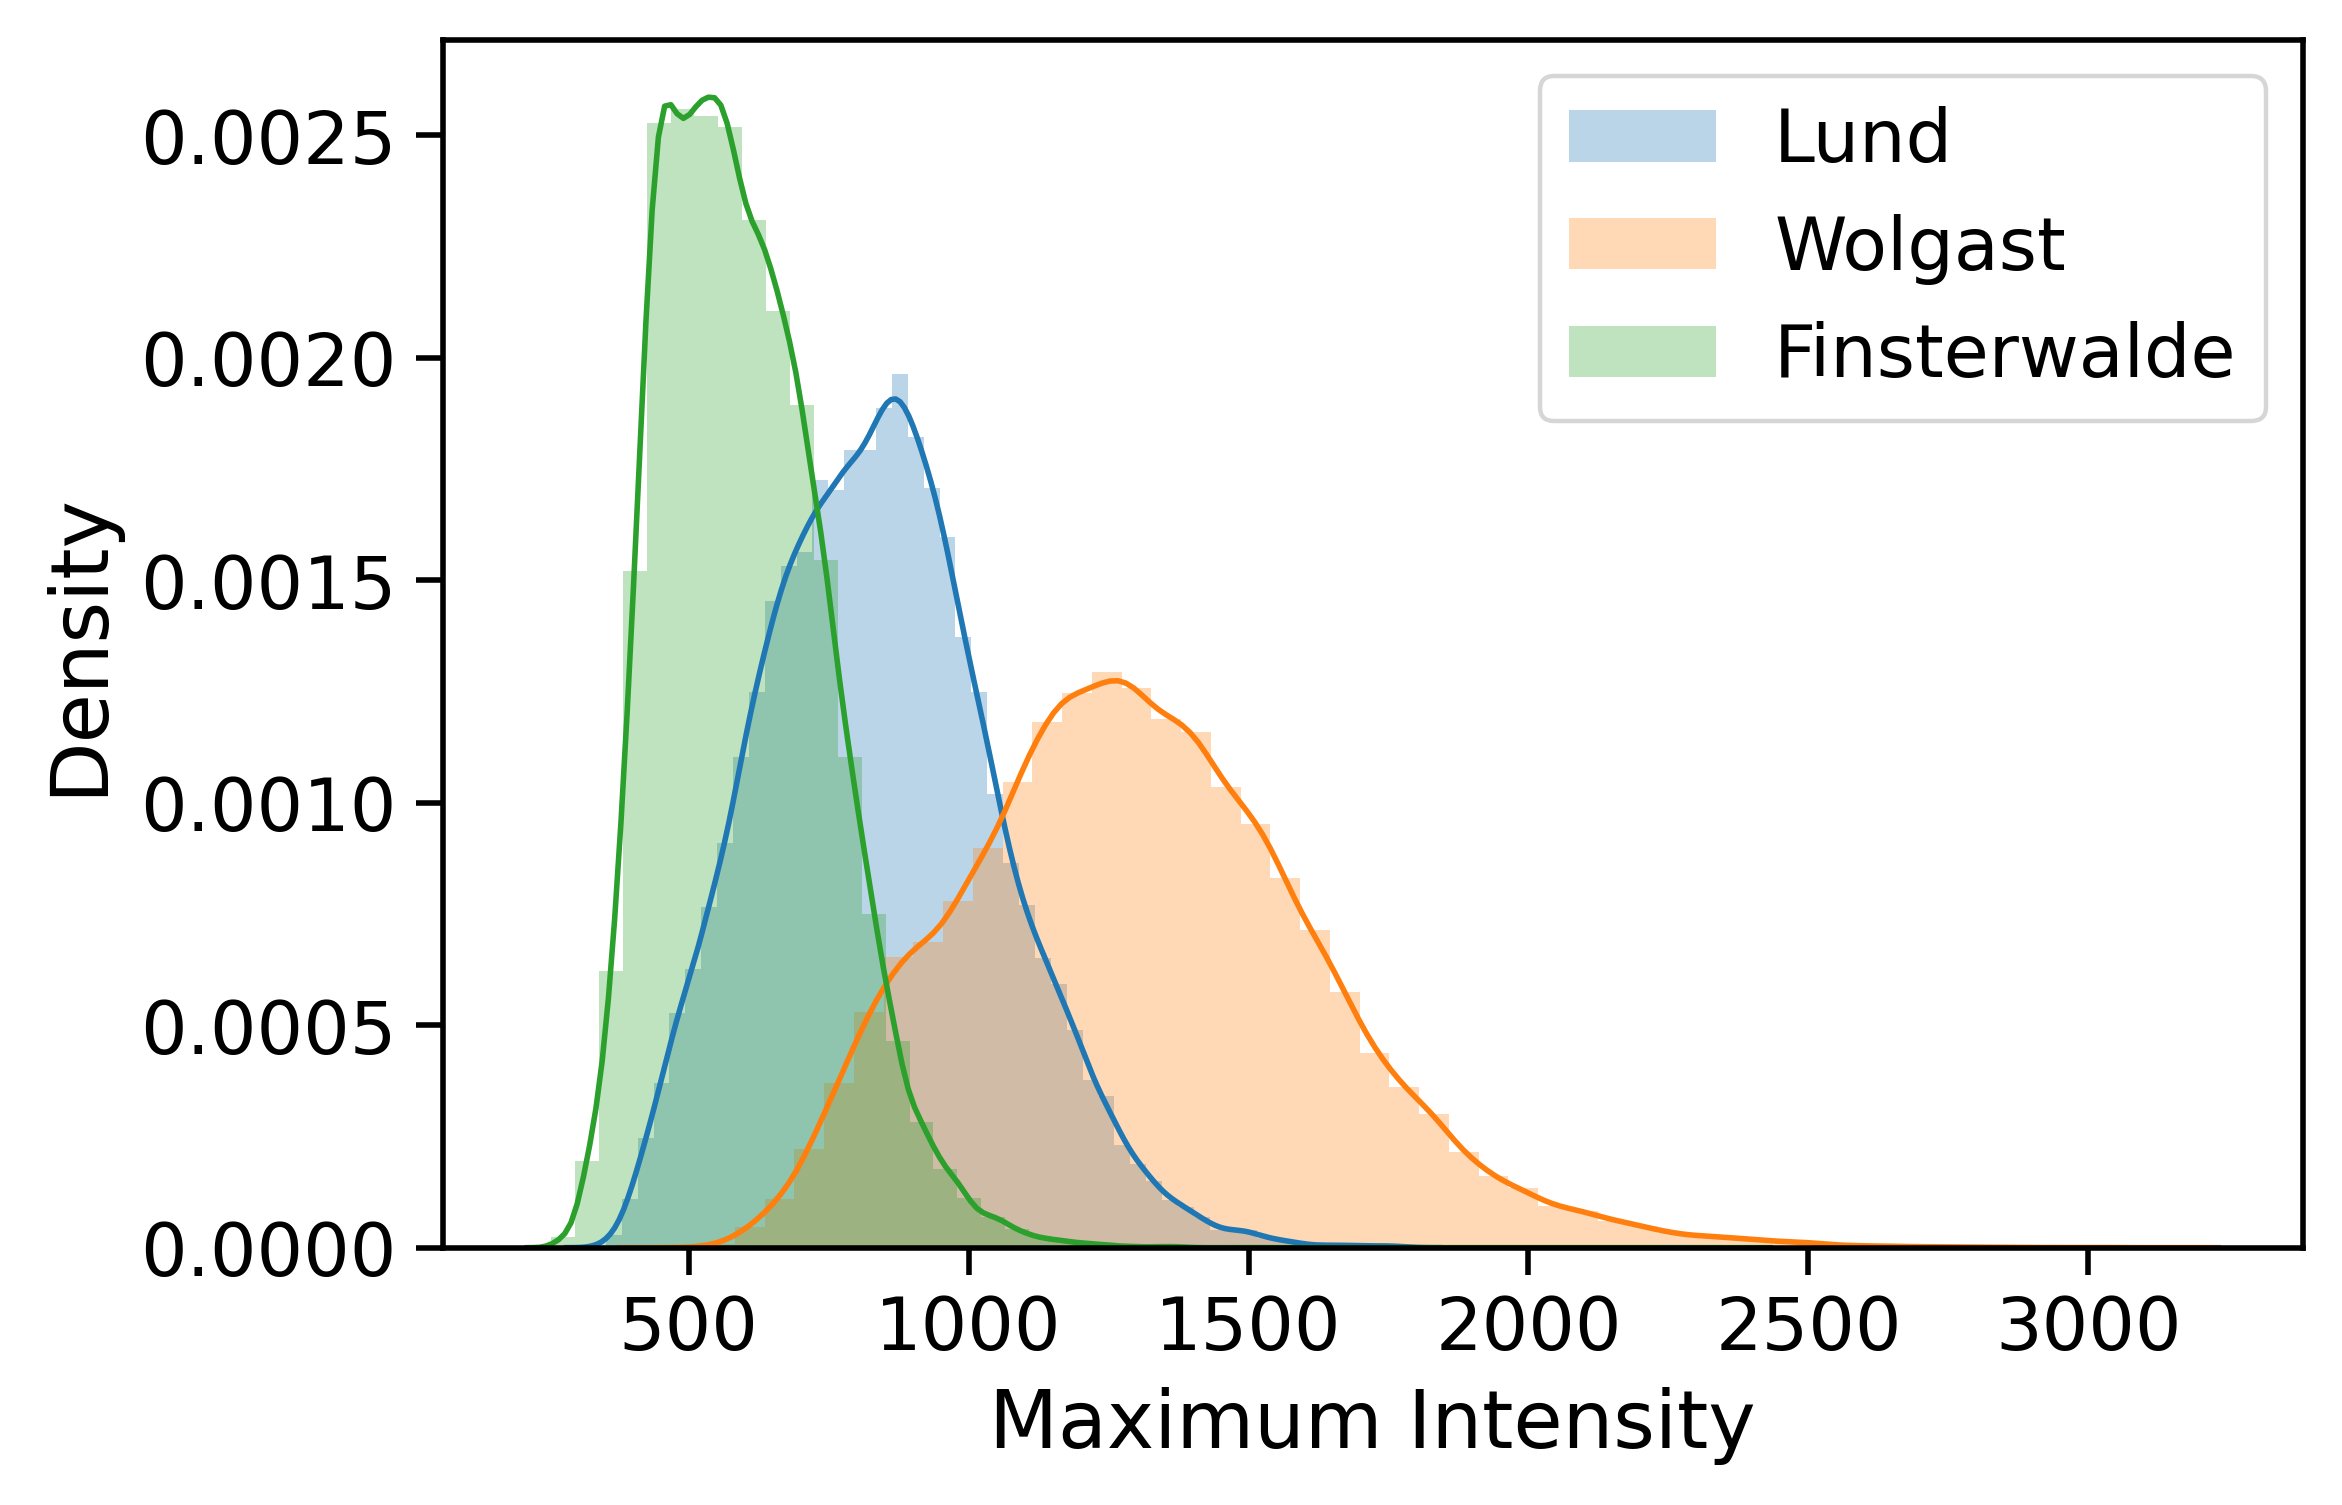

In [59]:
maxint = [prop['max_intensity'] for prop in props_list]
plot_dataset_comparison(maxint, 'Maximum Intensity')

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

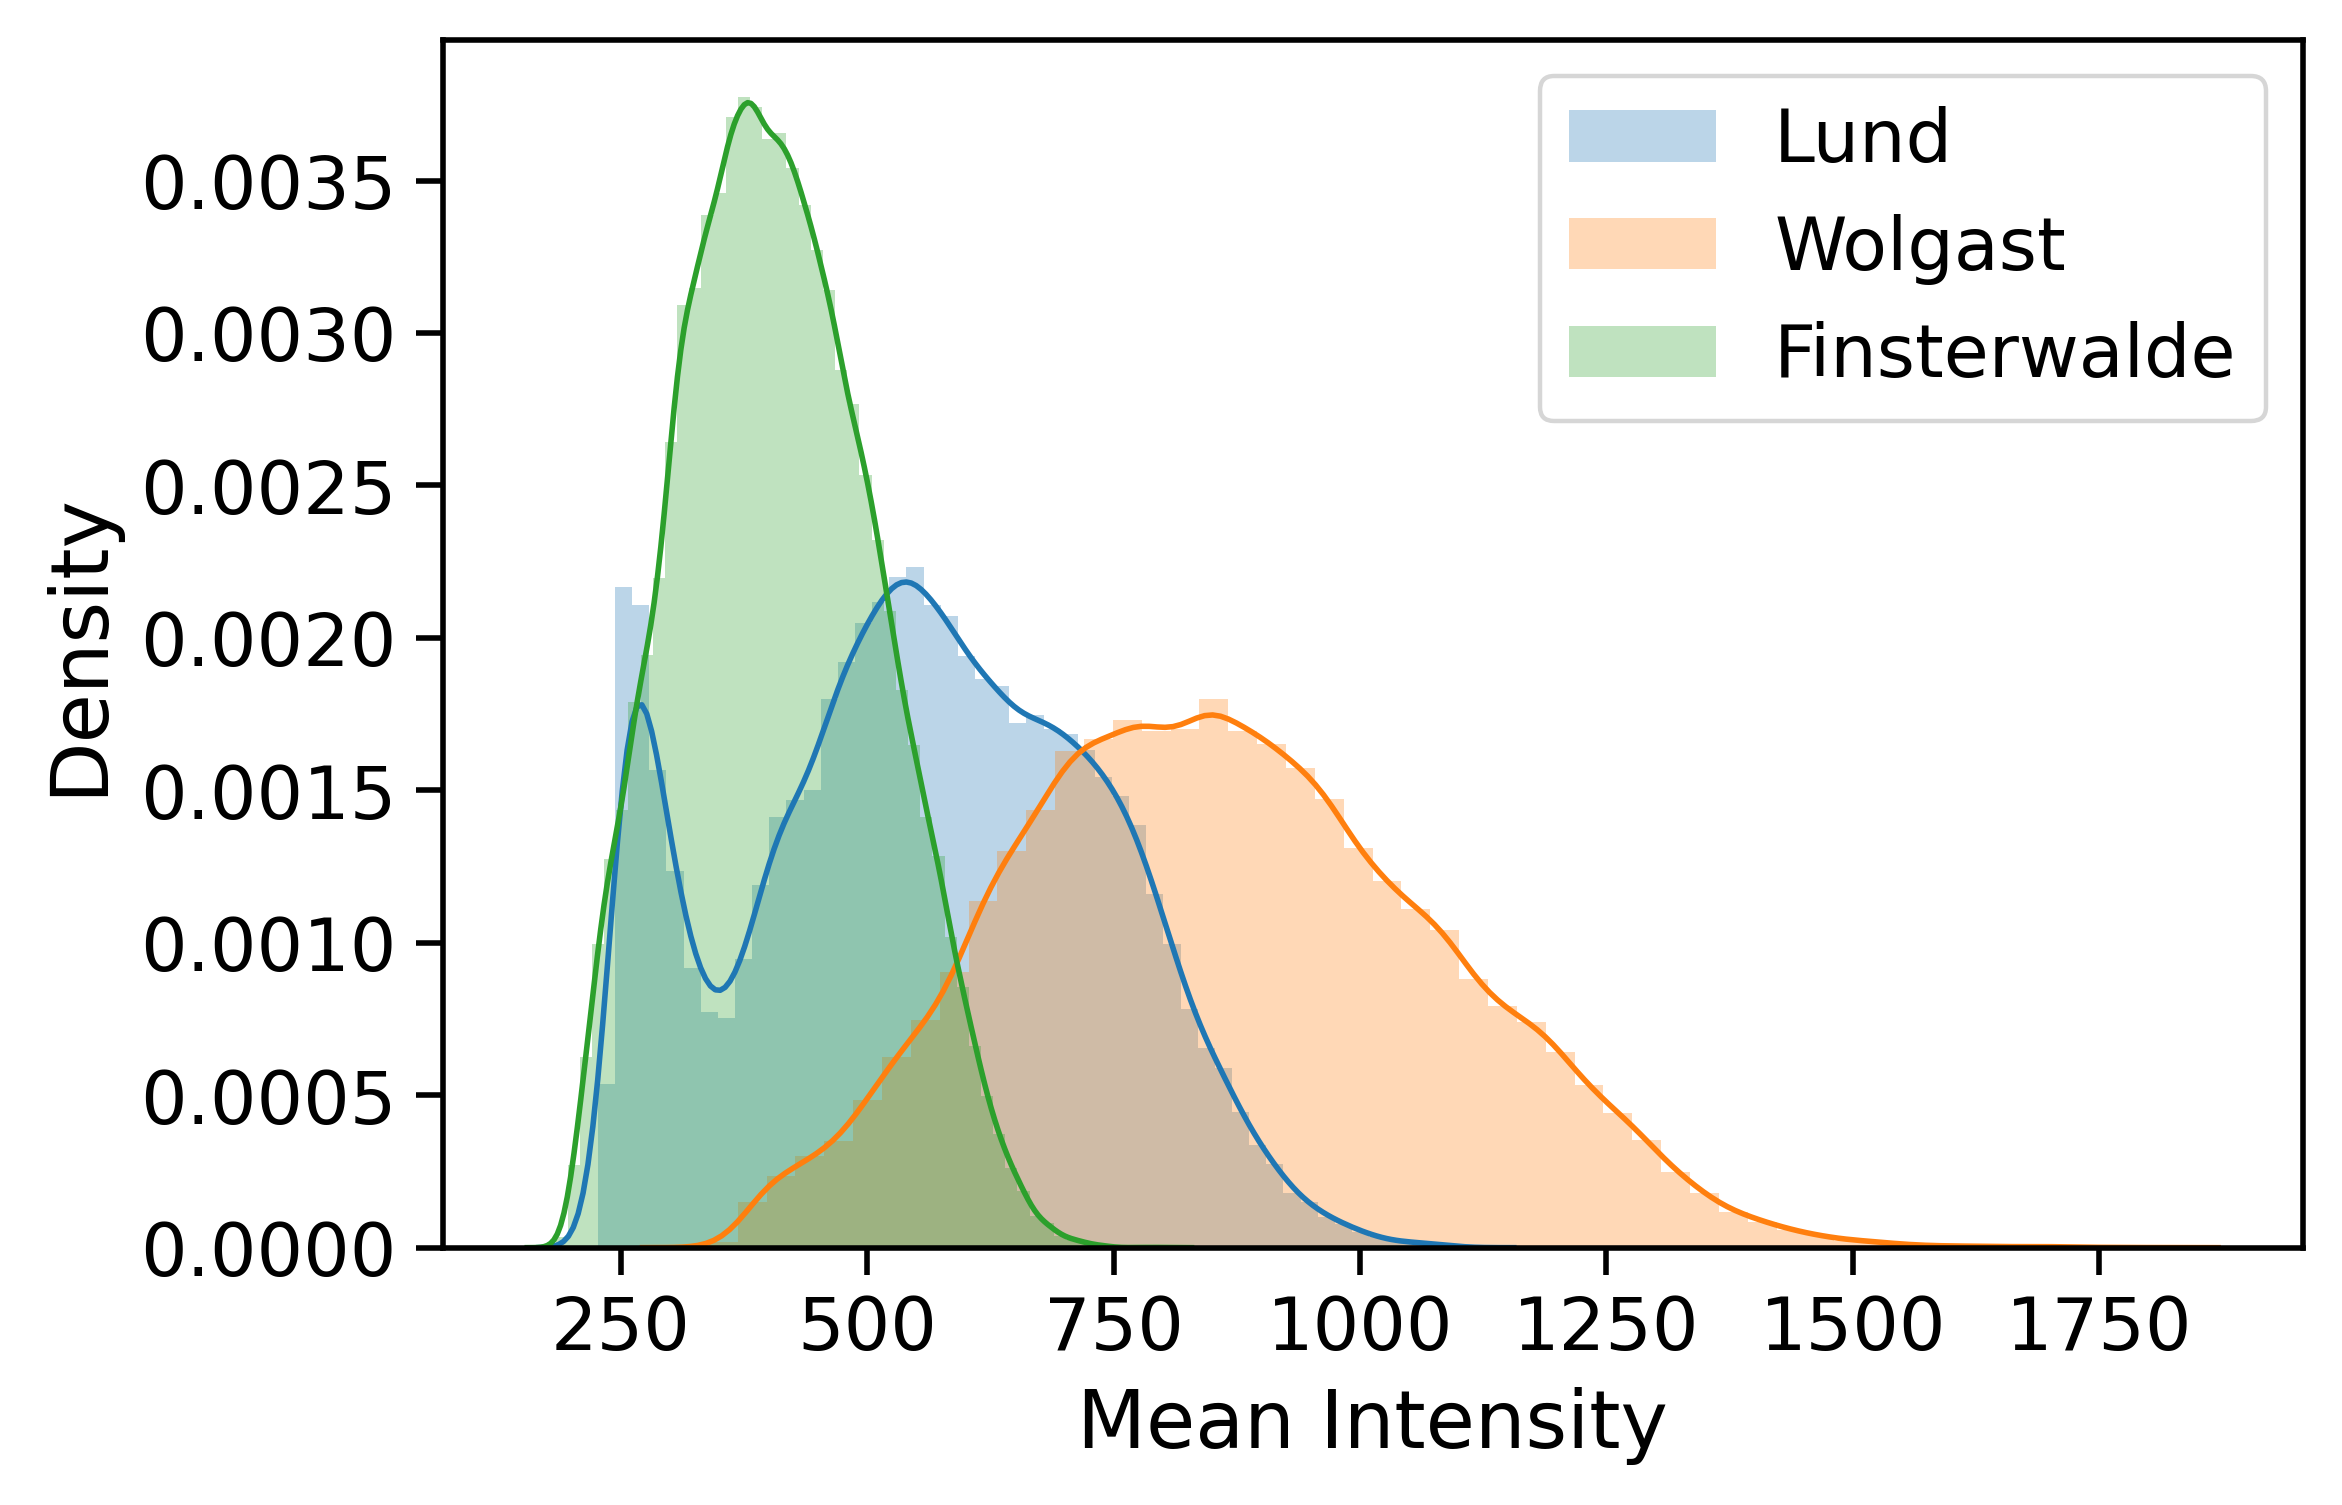

In [60]:
meanint = [prop['mean_intensity'] for prop in props_list]
plot_dataset_comparison(meanint, 'Mean Intensity')

Okay so this is interesting. Minimum and mean intensity plots look quite similar i shape while maximum intensity values look VERY different and have almost nothing to do with the distributions in the other plots. With the minimum intensity I have some Idea of what might be going on:

Since the minimum intensity is most likely determined by the background intensity it will be influenced by what what region the cell is in and by the size of the expanded cell. Some regions have high background fluorescence caused by a concentration in nuclear signal locally but also caused by imaging artefacts. Regions which are illuminated strongly (direct illumination / less obstructing elements like other cells or agarose) will also be brighter and illuminate the background. The size of the expanded cells also determines how much background is taken into account. Large cells with a blurred nuclear signal in the center will have lower values because the cell boundaries are large enough to include darker background regions. 

The Mean intensity also resembles a similar distribution to the minimum intensity. We would have to check if these distributions match up with the cells but I would not be surprised. The arguments that I gave before still hold true in the case of mean intensity. Imaging artefacts mentioned above will have a similar influence here. The size of the cells also still influences the mean intensity as larger cells will include more background which will influence the mean similarly to the minimum, albeit with slightly less dramatically (hence why the distributions look slightly different in terms of peak heights).

The maximum intensity on the other hand looks quite different. It is obviously also influenced by imaging parameters mentioned above but the reason for the distribution we see here is [not clear to me yet]().


# Intensity Standard Deviation
This one I'll look at separately because it differs too much in terms of the actual values. Conceptually it is also slightly different because rather than describing illumination as an artefact it says more about the signal. Very small nuclei might have a higher stddev because they blend in with the background signal causing higher standard deviation. It could be argued that this kind of measurement of intensity is slightly less prone to be influenced by imaging artefacts but I think to a cretain extent it will be influences. Generally I think that quite a few of these features will be influenced by imaging artefacts anyway and since this is a kind of data exploration we shouldn't throw away everything before taking a look. 

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

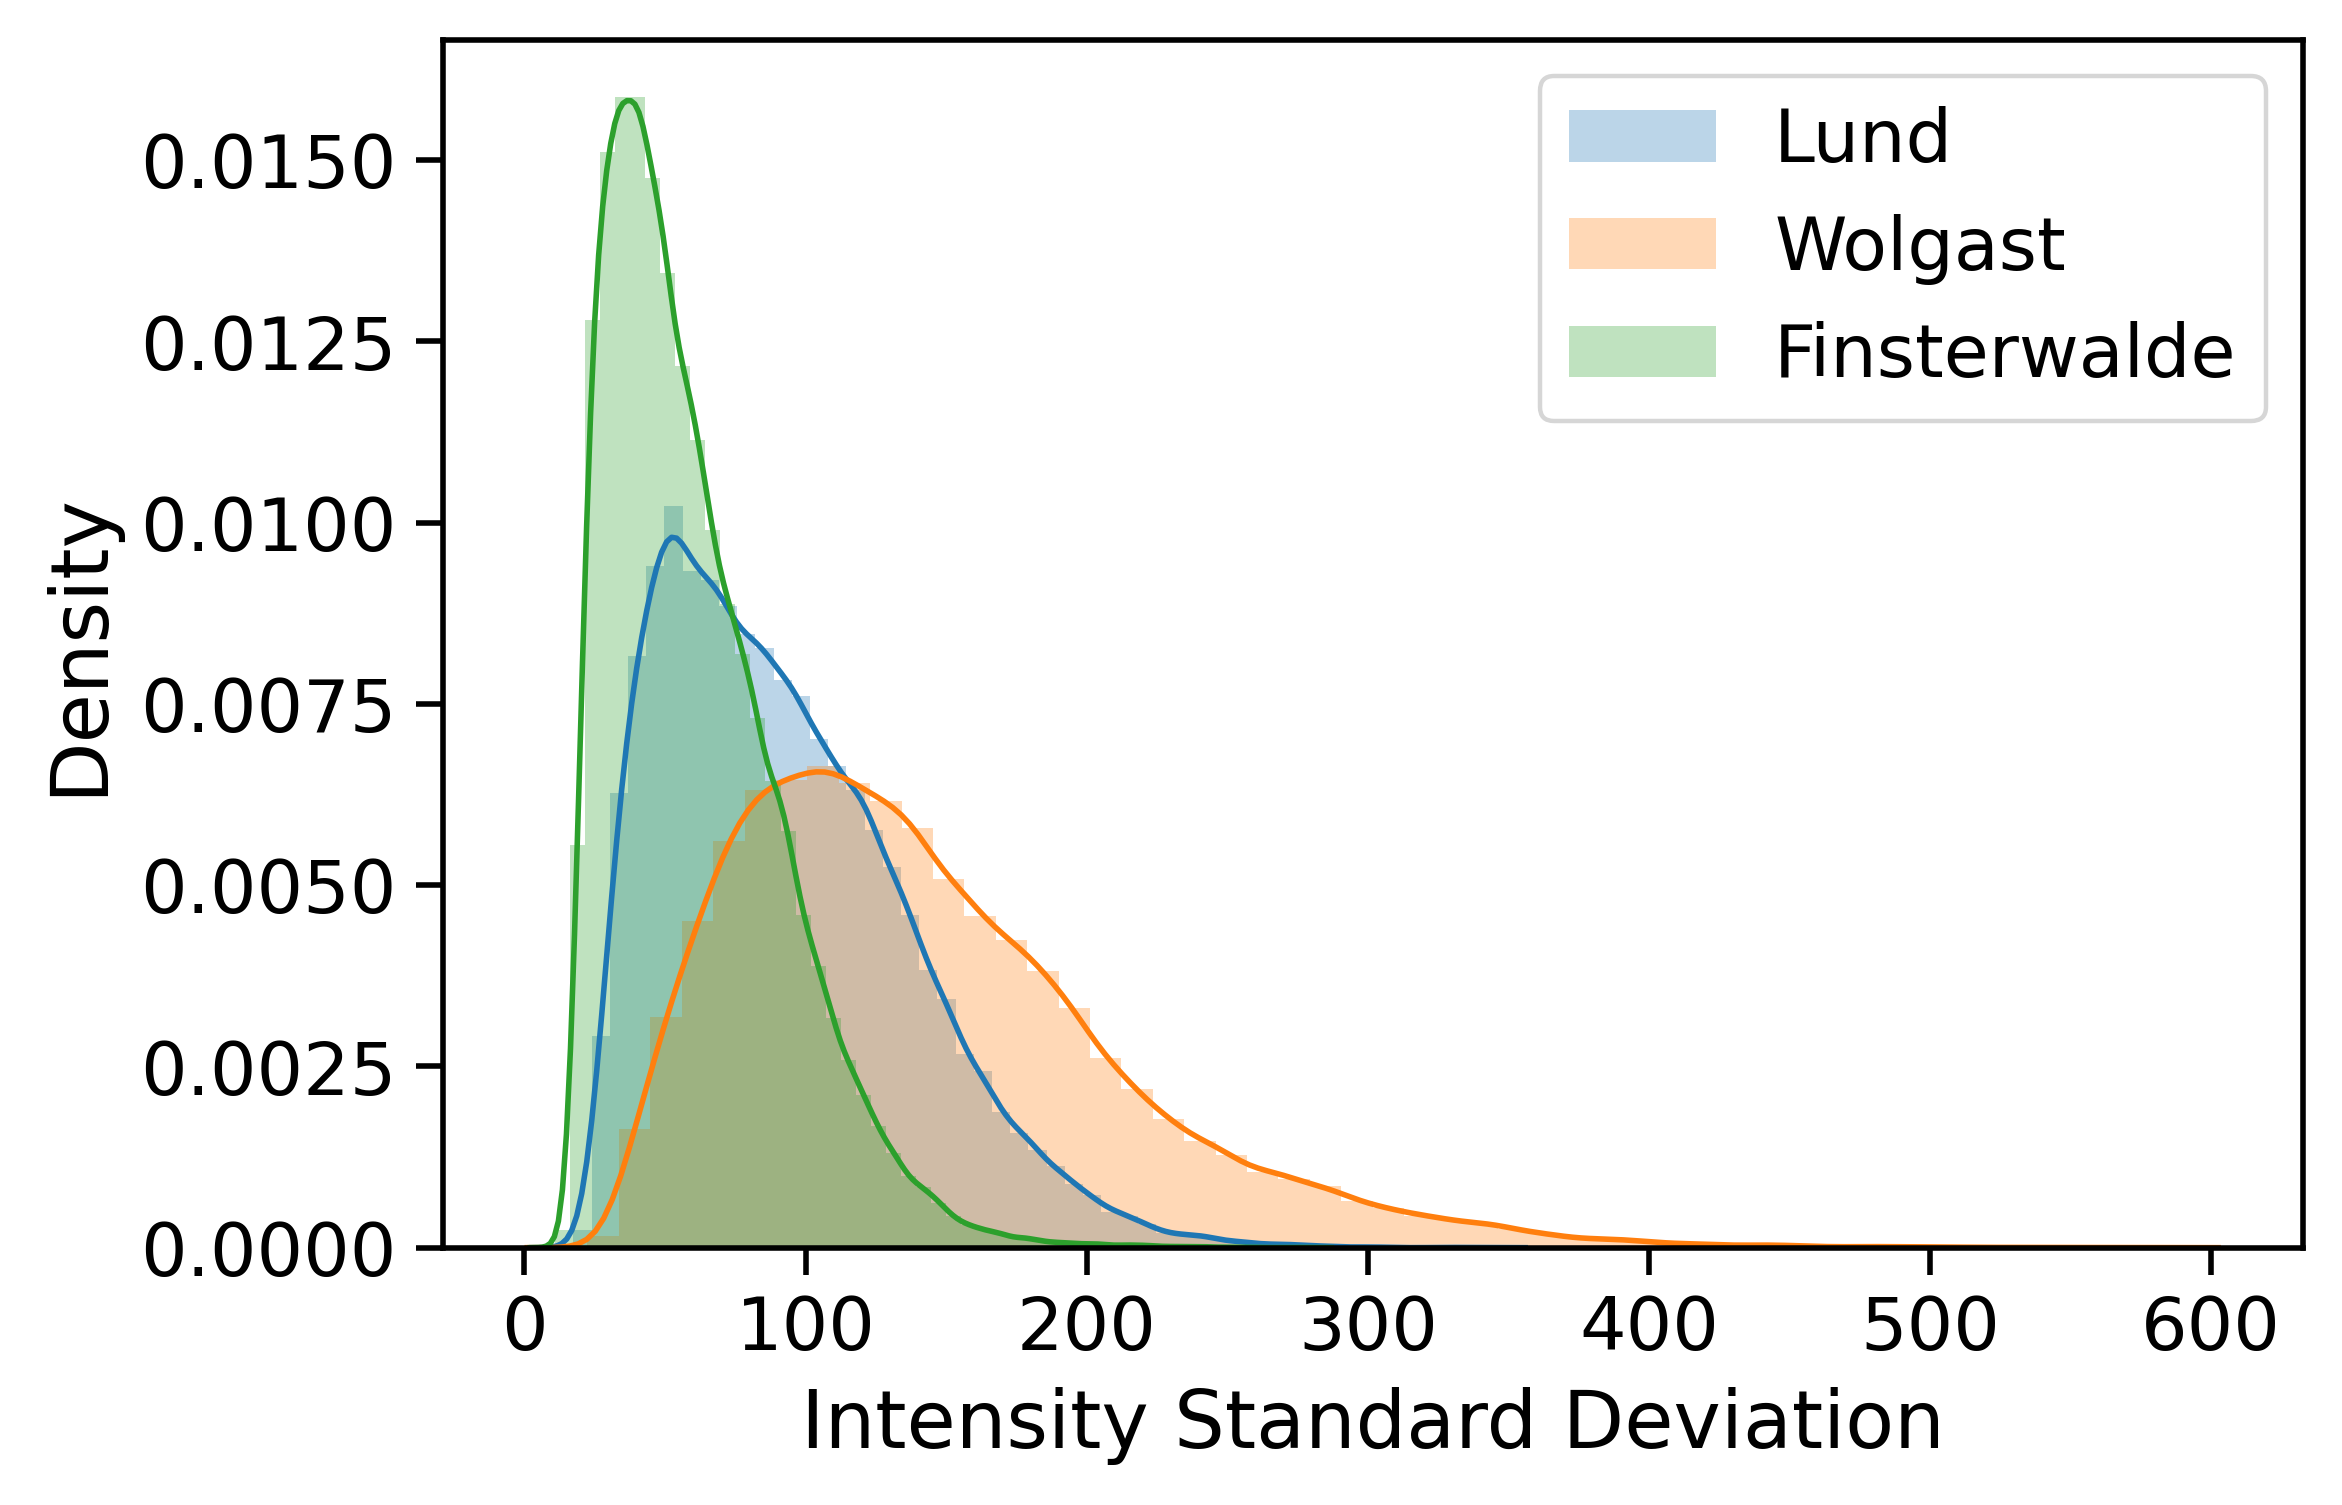

In [62]:
stdint = [prop['image_stdev'] for prop in props_list]
plot_dataset_comparison(stdint, 'Intensity Standard Deviation')

Hmmmmmmmmm this distribution looks weird. Somehow I have a feeling that there are a few peaks that cannot be seen clearly here. Again I have the feeling that pooling the datapoints might be covering up some of the finer details of the distributions. Maybe we should look at a few different windows at some point. Maybe there's also a method for doing this in a more streamlined way.

# Number of Neighbors
And with this we're entering the world of topological data in our dataset. My gut feeling tells me that these kind of measurements should allow some kind differentiation but that's just a feeling. Let's look at it and see if instinct and reality have anything to do with eachother:

C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histo

(0.0, 30.0)

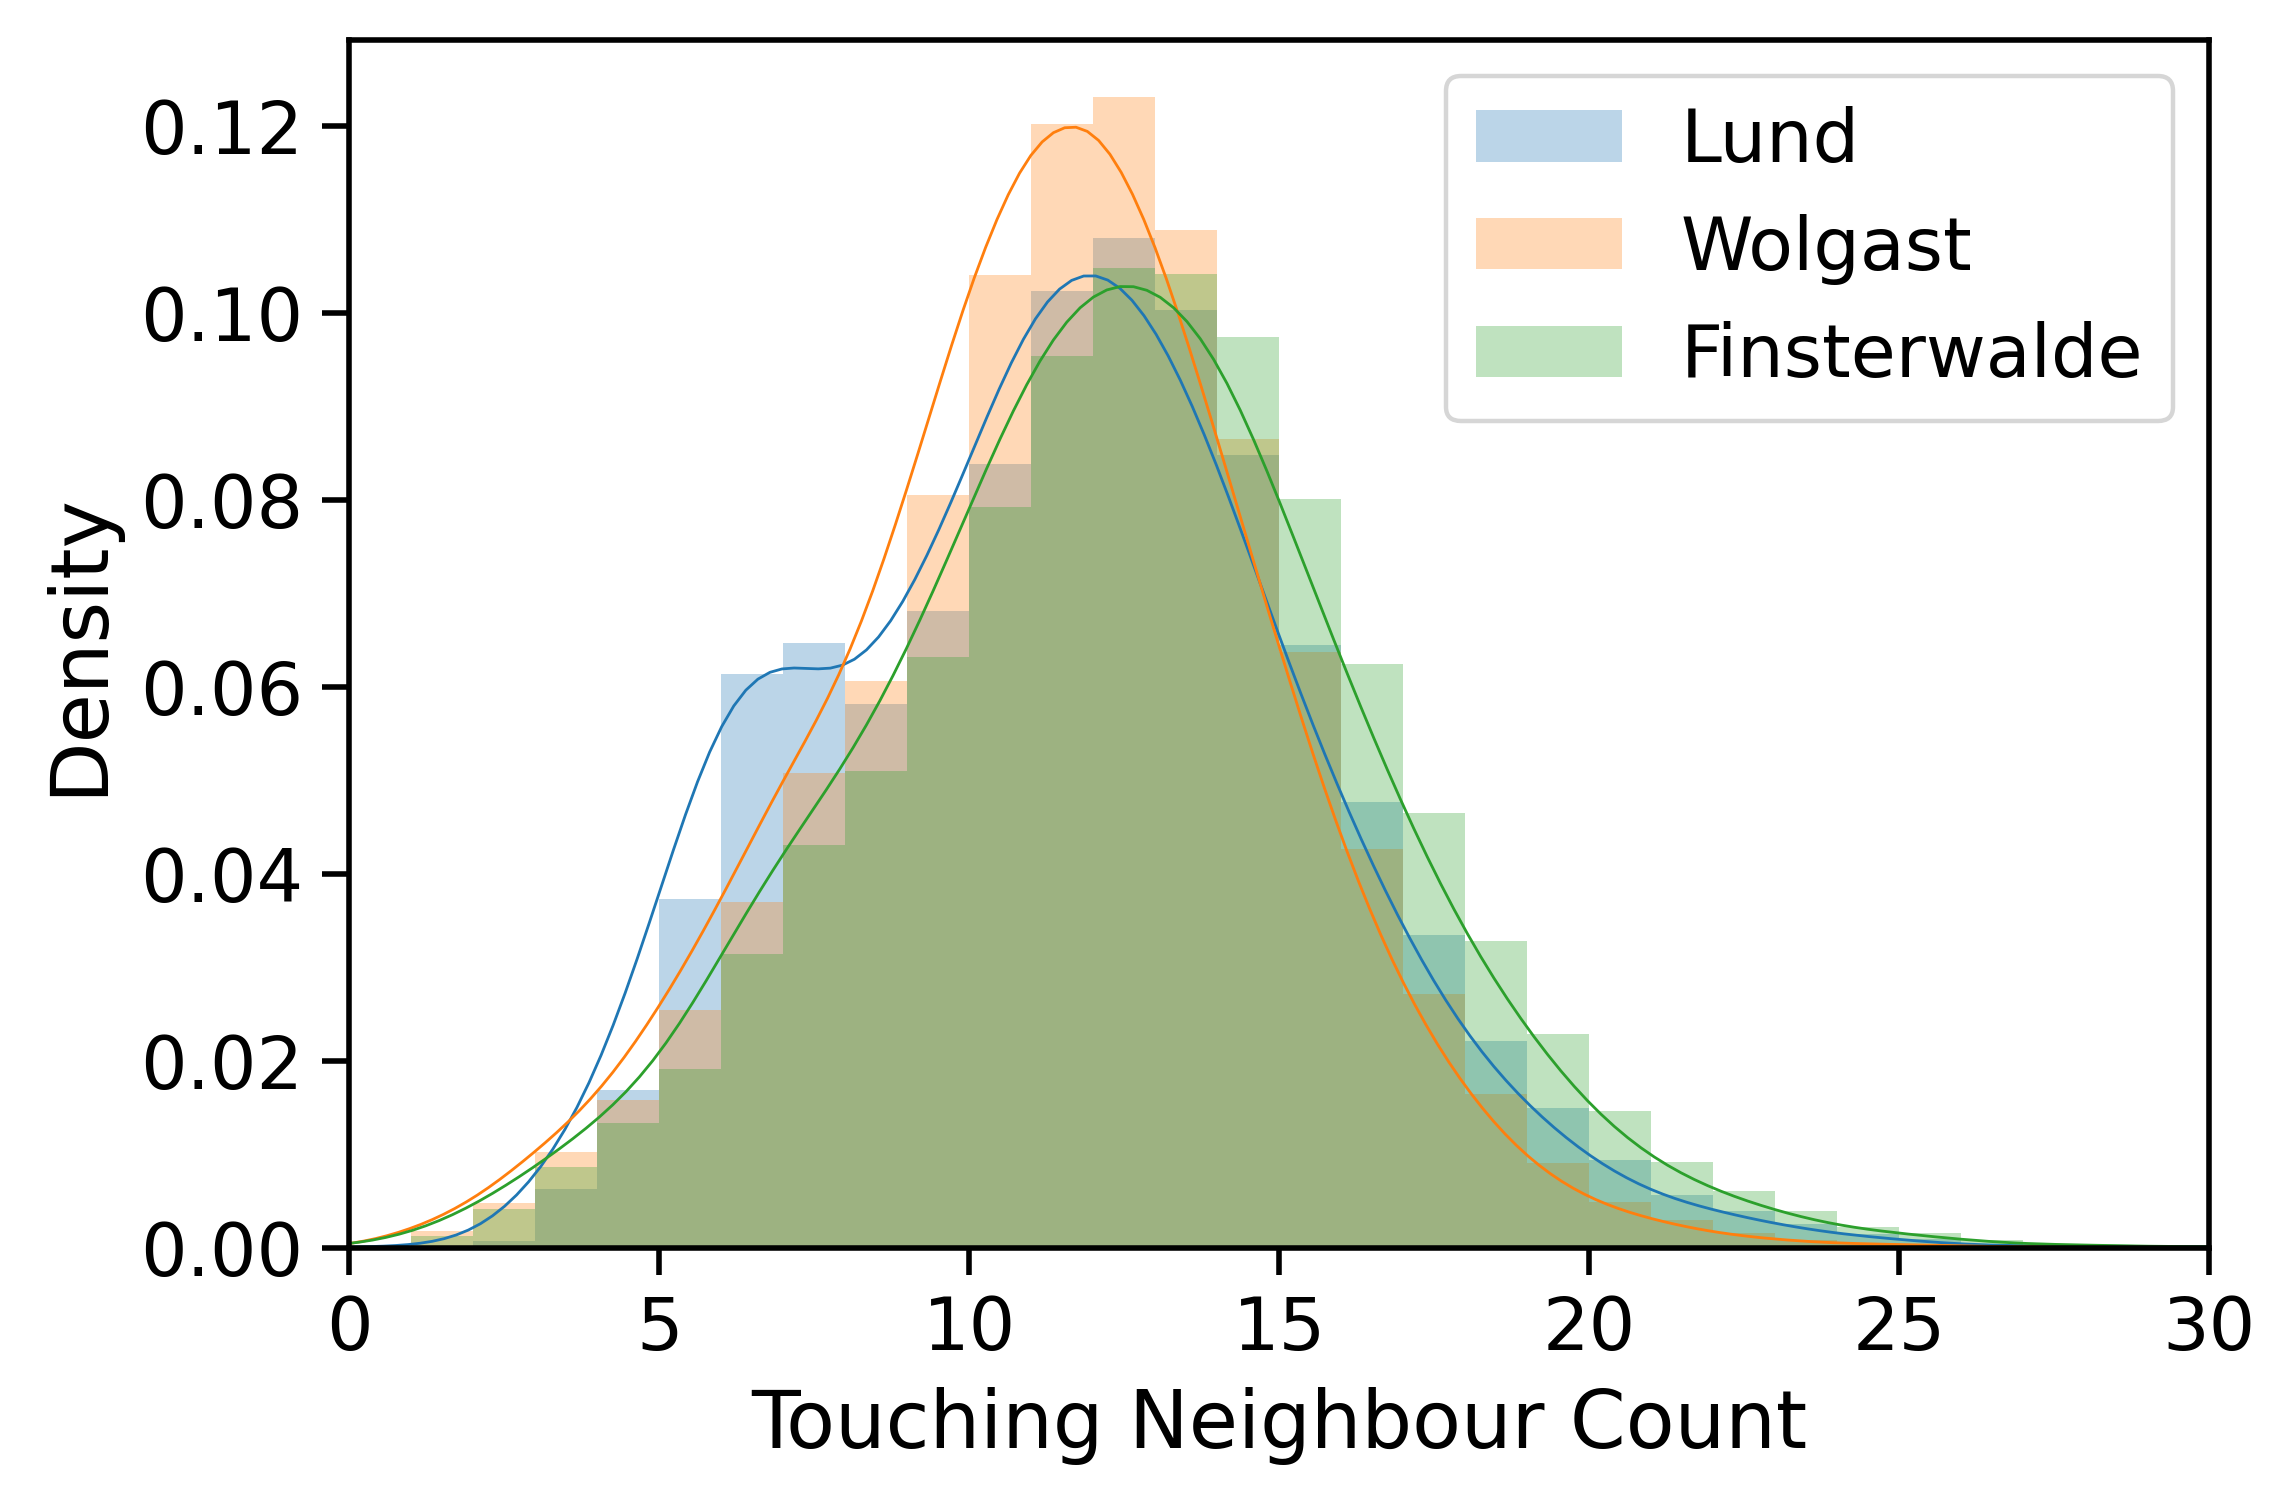

In [11]:
def plot_dataset_comparison(measurements,x_axis_title,names = ['Lund', 'Wolgast', 'Finsterwalde'],
                            kwargs = dict(hist_kws={'alpha':0.3}, kde_kws={'linewidth':0.5}),
                            bins = None):
    
    # Renaming X-Axis
    new_name_props = [prop.rename(x_axis_title) for prop in measurements]
    
    
    
    plt.figure(figsize =(6,4), dpi = 400)
    
    for Area, name in zip(new_name_props, names):
        sns.distplot(Area, bins = bins, label = name, **kwargs)
    plt.legend()

tnc = [prop['touching neighbor count'] for prop in props_list]
plot_dataset_comparison(tnc, 'Touching Neighbour Count', bins = range(31), 
                        kwargs = dict(hist_kws={'alpha':0.3}, 
                                      kde_kws={'linewidth':0.5, 
                                               'bw':0.2}))
plt.xlim([0,30])

Since this is another one of the discrete variables the distribution looks a bit weird. It is quite strange though that some counts are not found AT ALL. I'm guessing this has something to do with the generation of the data which maybe favours some values less? I really don't know though. This distribution is also not reaally very informative for exactly that reason though. With a lot of good will you can see two peaks but if I'm honest with myself I don't really believe this distribution it could just as well be one weirdly shaped peak.

# Average Distance to Neighbours
This is our next set of topological data. I already know it correlates quite strongly with area (which makes sense: larger cells -> larger distance to neighbours). Anyway, since we have three of these we'll plot them together again:

## Lund

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

(5.0, 35.0)

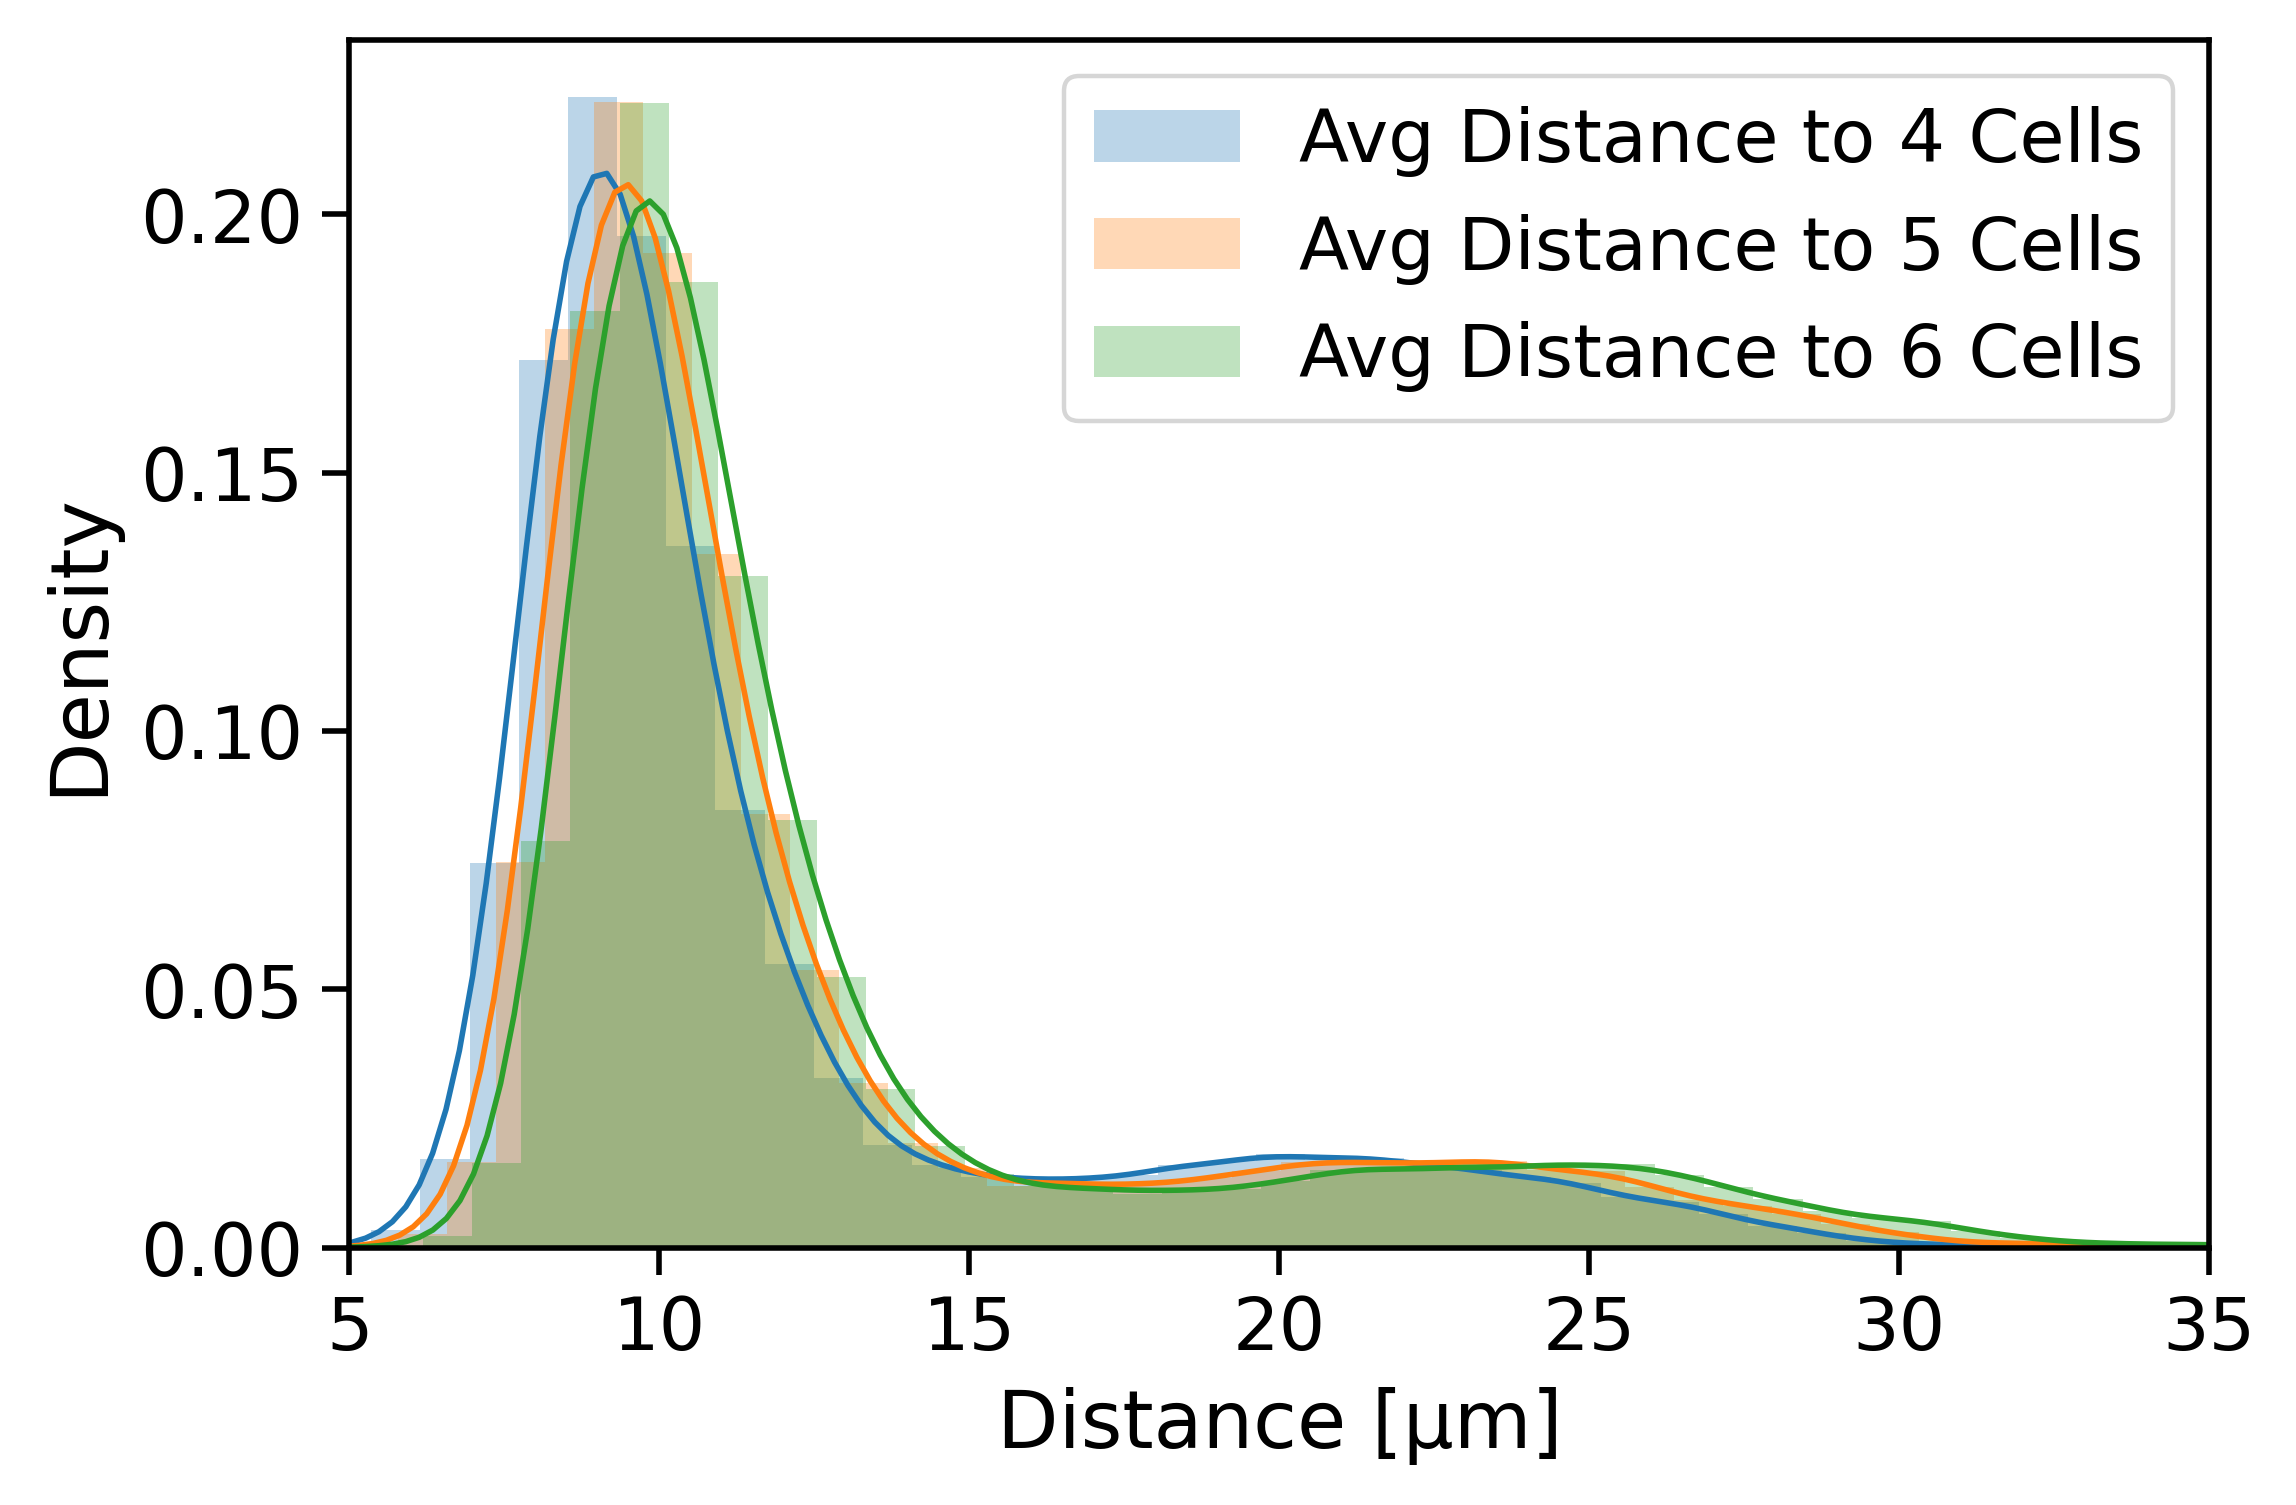

In [17]:
avg_dist_4 = props_list[0]['avg distance of 4 closest points'].tolist()
avg_dist_5 = props_list[0]['avg distance of 5 closest points'].tolist()
avg_dist_6 = props_list[0]['avg distance of 6 closest points'].tolist()

kwargs = dict(hist_kws={'alpha':0.3}, kde_kws={'linewidth':1})

plt.figure(figsize =(6,4), dpi = 400)
sns.distplot(avg_dist_4, label = 'Avg Distance to 4 Cells',**kwargs)
sns.distplot(avg_dist_5, label = 'Avg Distance to 5 Cells',**kwargs)
sns.distplot(avg_dist_6, label = 'Avg Distance to 6 Cells',**kwargs)
plt.legend()
plt.xlabel('Distance [\u03BCm]')
plt.xlim([5,35])

# Wolgast

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

(5.0, 40.0)

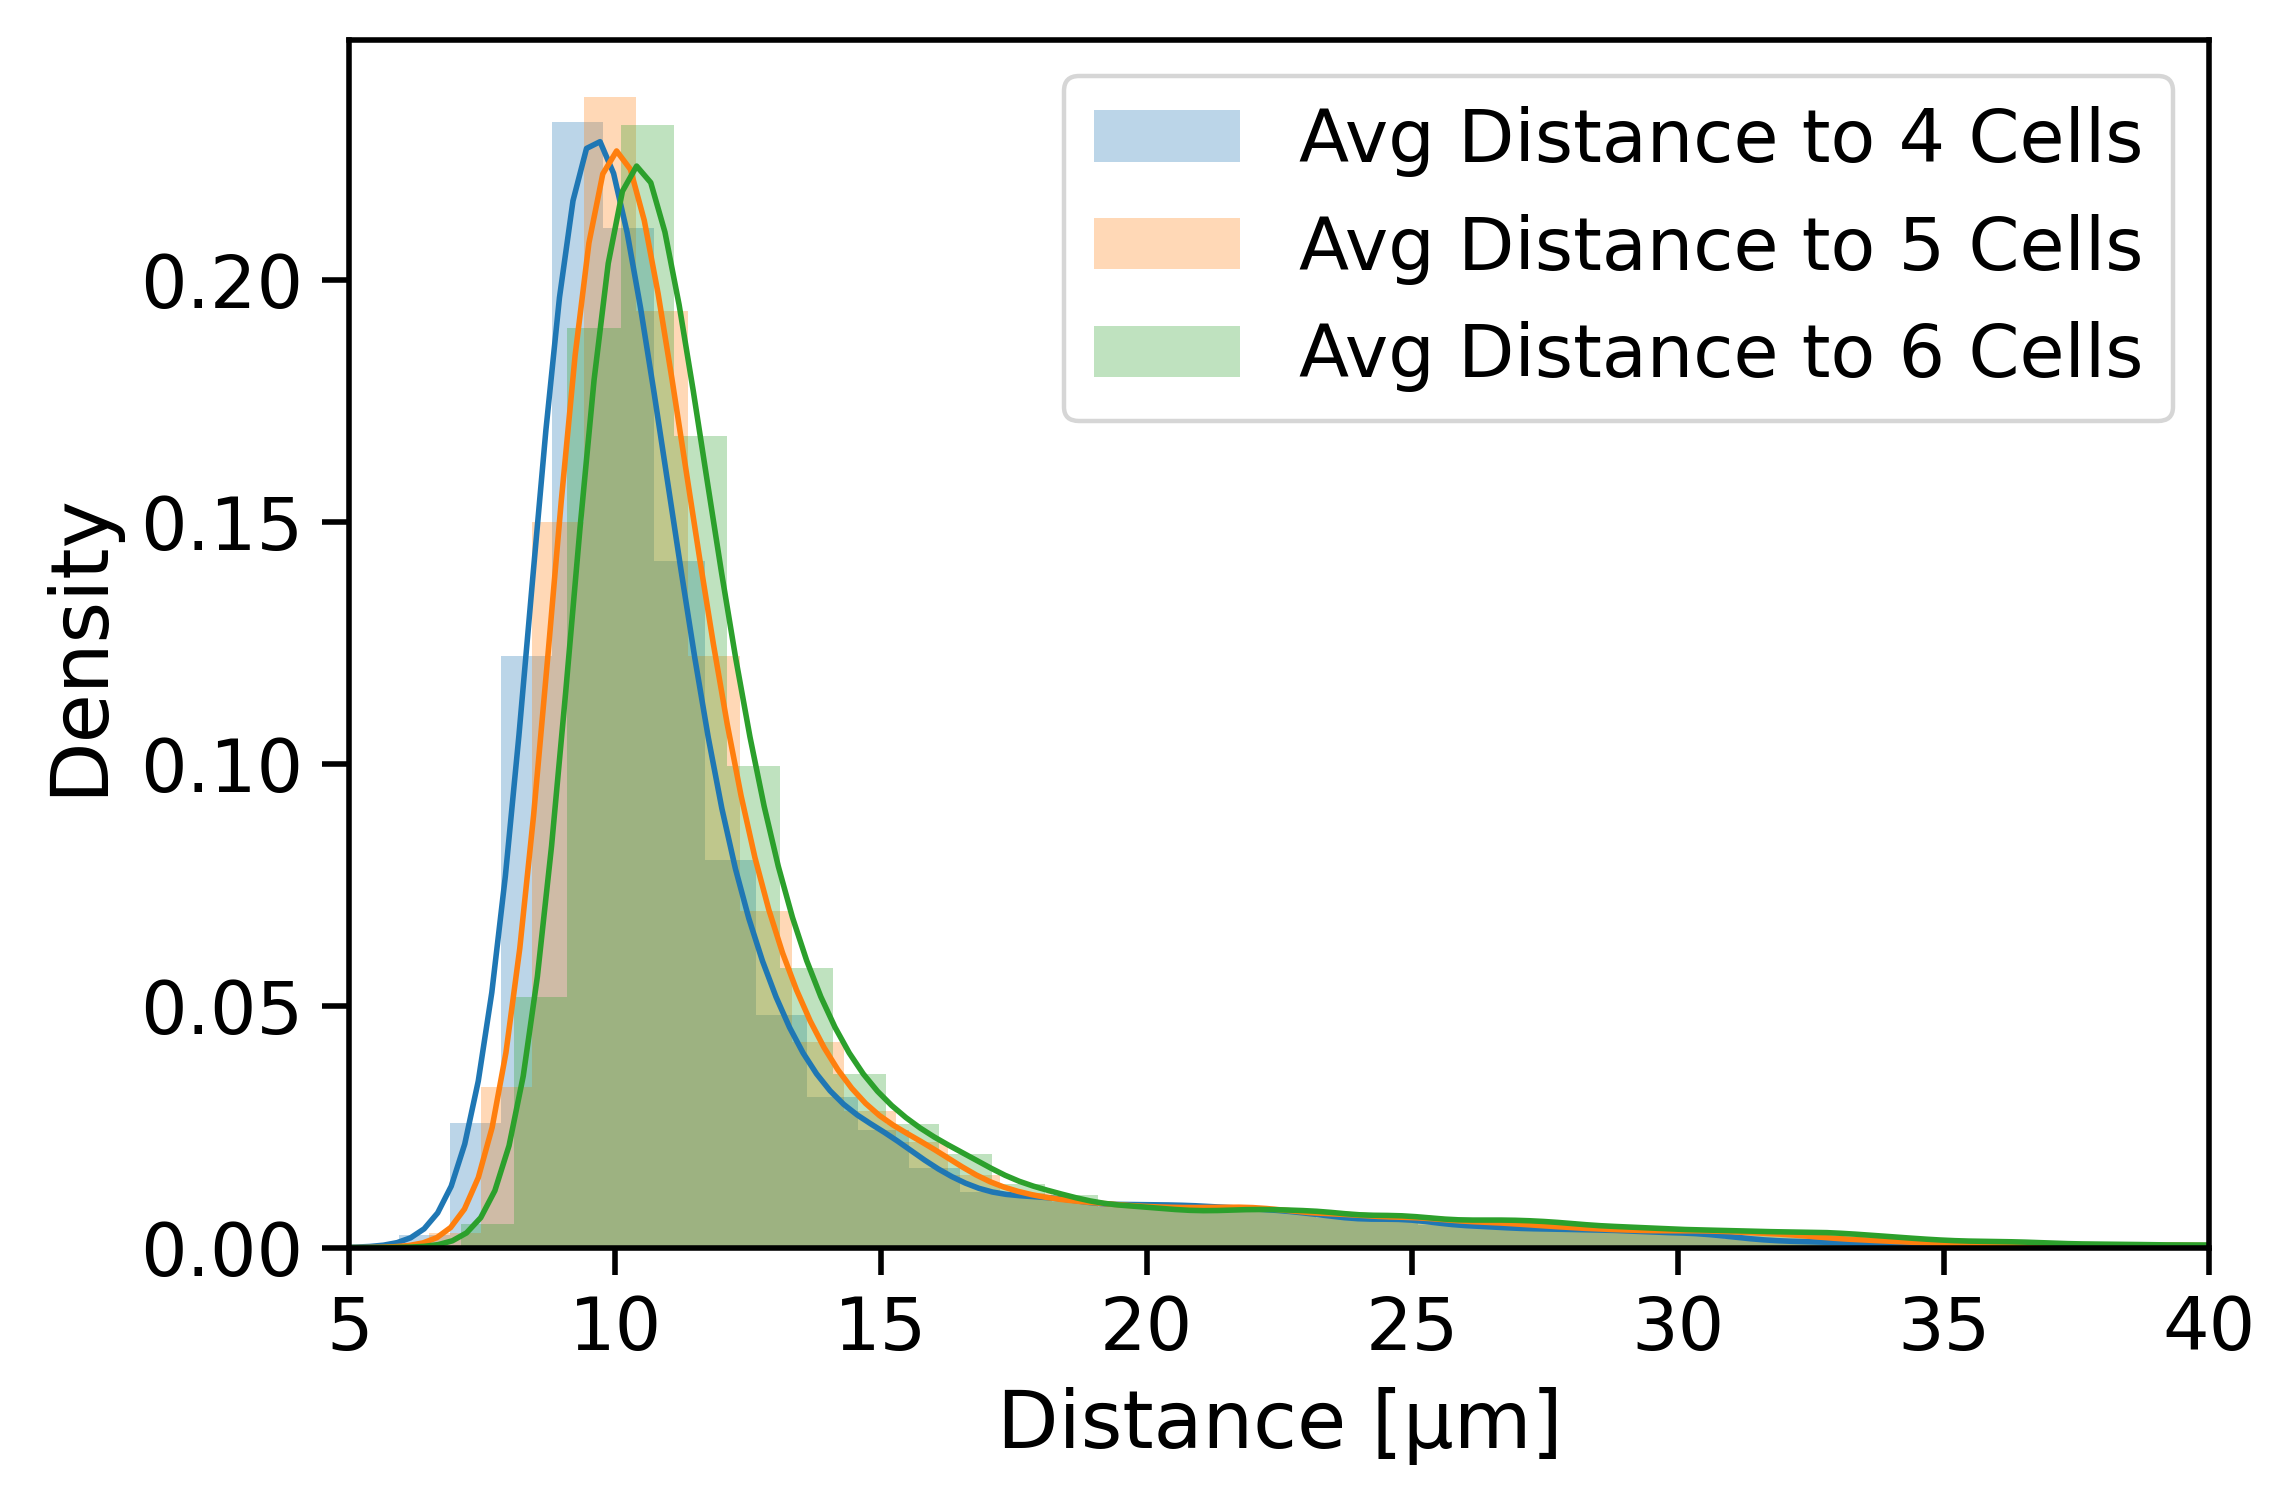

In [19]:
avg_dist_4 = props_list[1]['avg distance of 4 closest points'].tolist()
avg_dist_5 = props_list[1]['avg distance of 5 closest points'].tolist()
avg_dist_6 = props_list[1]['avg distance of 6 closest points'].tolist()

kwargs = dict(hist_kws={'alpha':0.3}, kde_kws={'linewidth':1})

plt.figure(figsize =(6,4), dpi = 400)
sns.distplot(avg_dist_4, label = 'Avg Distance to 4 Cells',**kwargs)
sns.distplot(avg_dist_5, label = 'Avg Distance to 5 Cells',**kwargs)
sns.distplot(avg_dist_6, label = 'Avg Distance to 6 Cells',**kwargs)
plt.legend()
plt.xlabel('Distance [\u03BCm]')
plt.xlim([5,40])

# Finsterwalde

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

(5.0, 60.0)

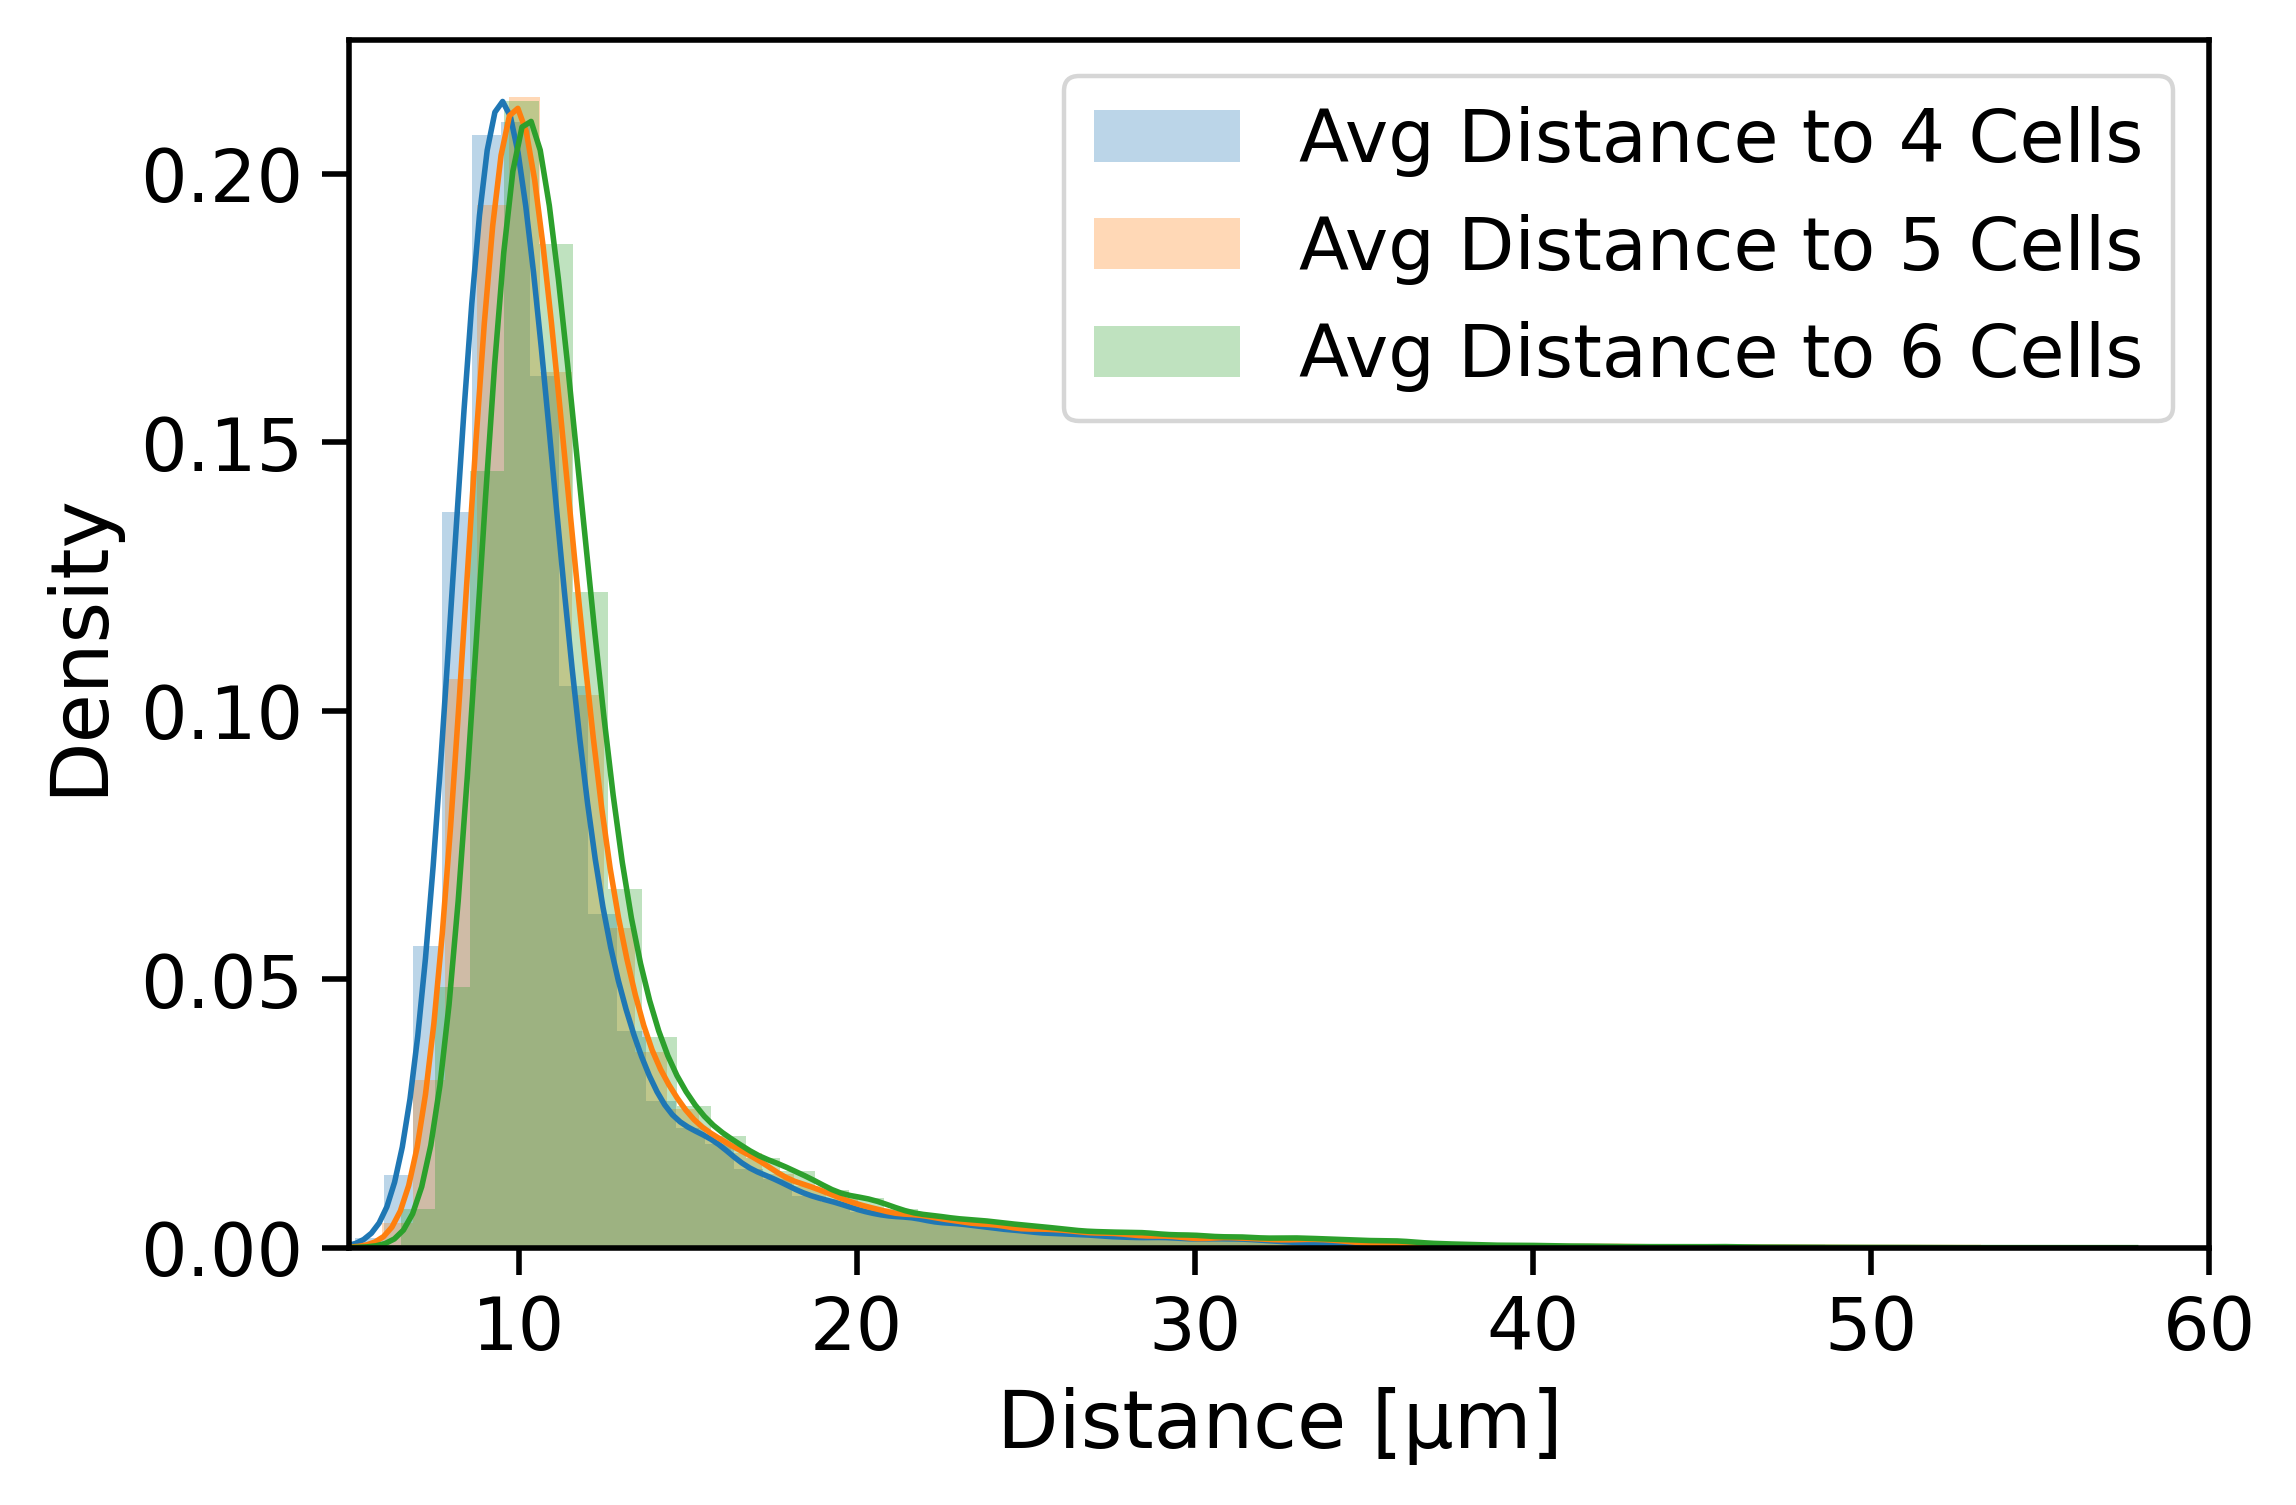

In [20]:
avg_dist_4 = props_list[2]['avg distance of 4 closest points'].tolist()
avg_dist_5 = props_list[2]['avg distance of 5 closest points'].tolist()
avg_dist_6 = props_list[2]['avg distance of 6 closest points'].tolist()

kwargs = dict(hist_kws={'alpha':0.3}, kde_kws={'linewidth':1})

plt.figure(figsize =(6,4), dpi = 400)
sns.distplot(avg_dist_4, label = 'Avg Distance to 4 Cells',**kwargs)
sns.distplot(avg_dist_5, label = 'Avg Distance to 5 Cells',**kwargs)
sns.distplot(avg_dist_6, label = 'Avg Distance to 6 Cells',**kwargs)
plt.legend()
plt.xlabel('Distance [\u03BCm]')
plt.xlim([5,60])

# Avg Dist Dataset Comparison

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

(5.0, 40.0)

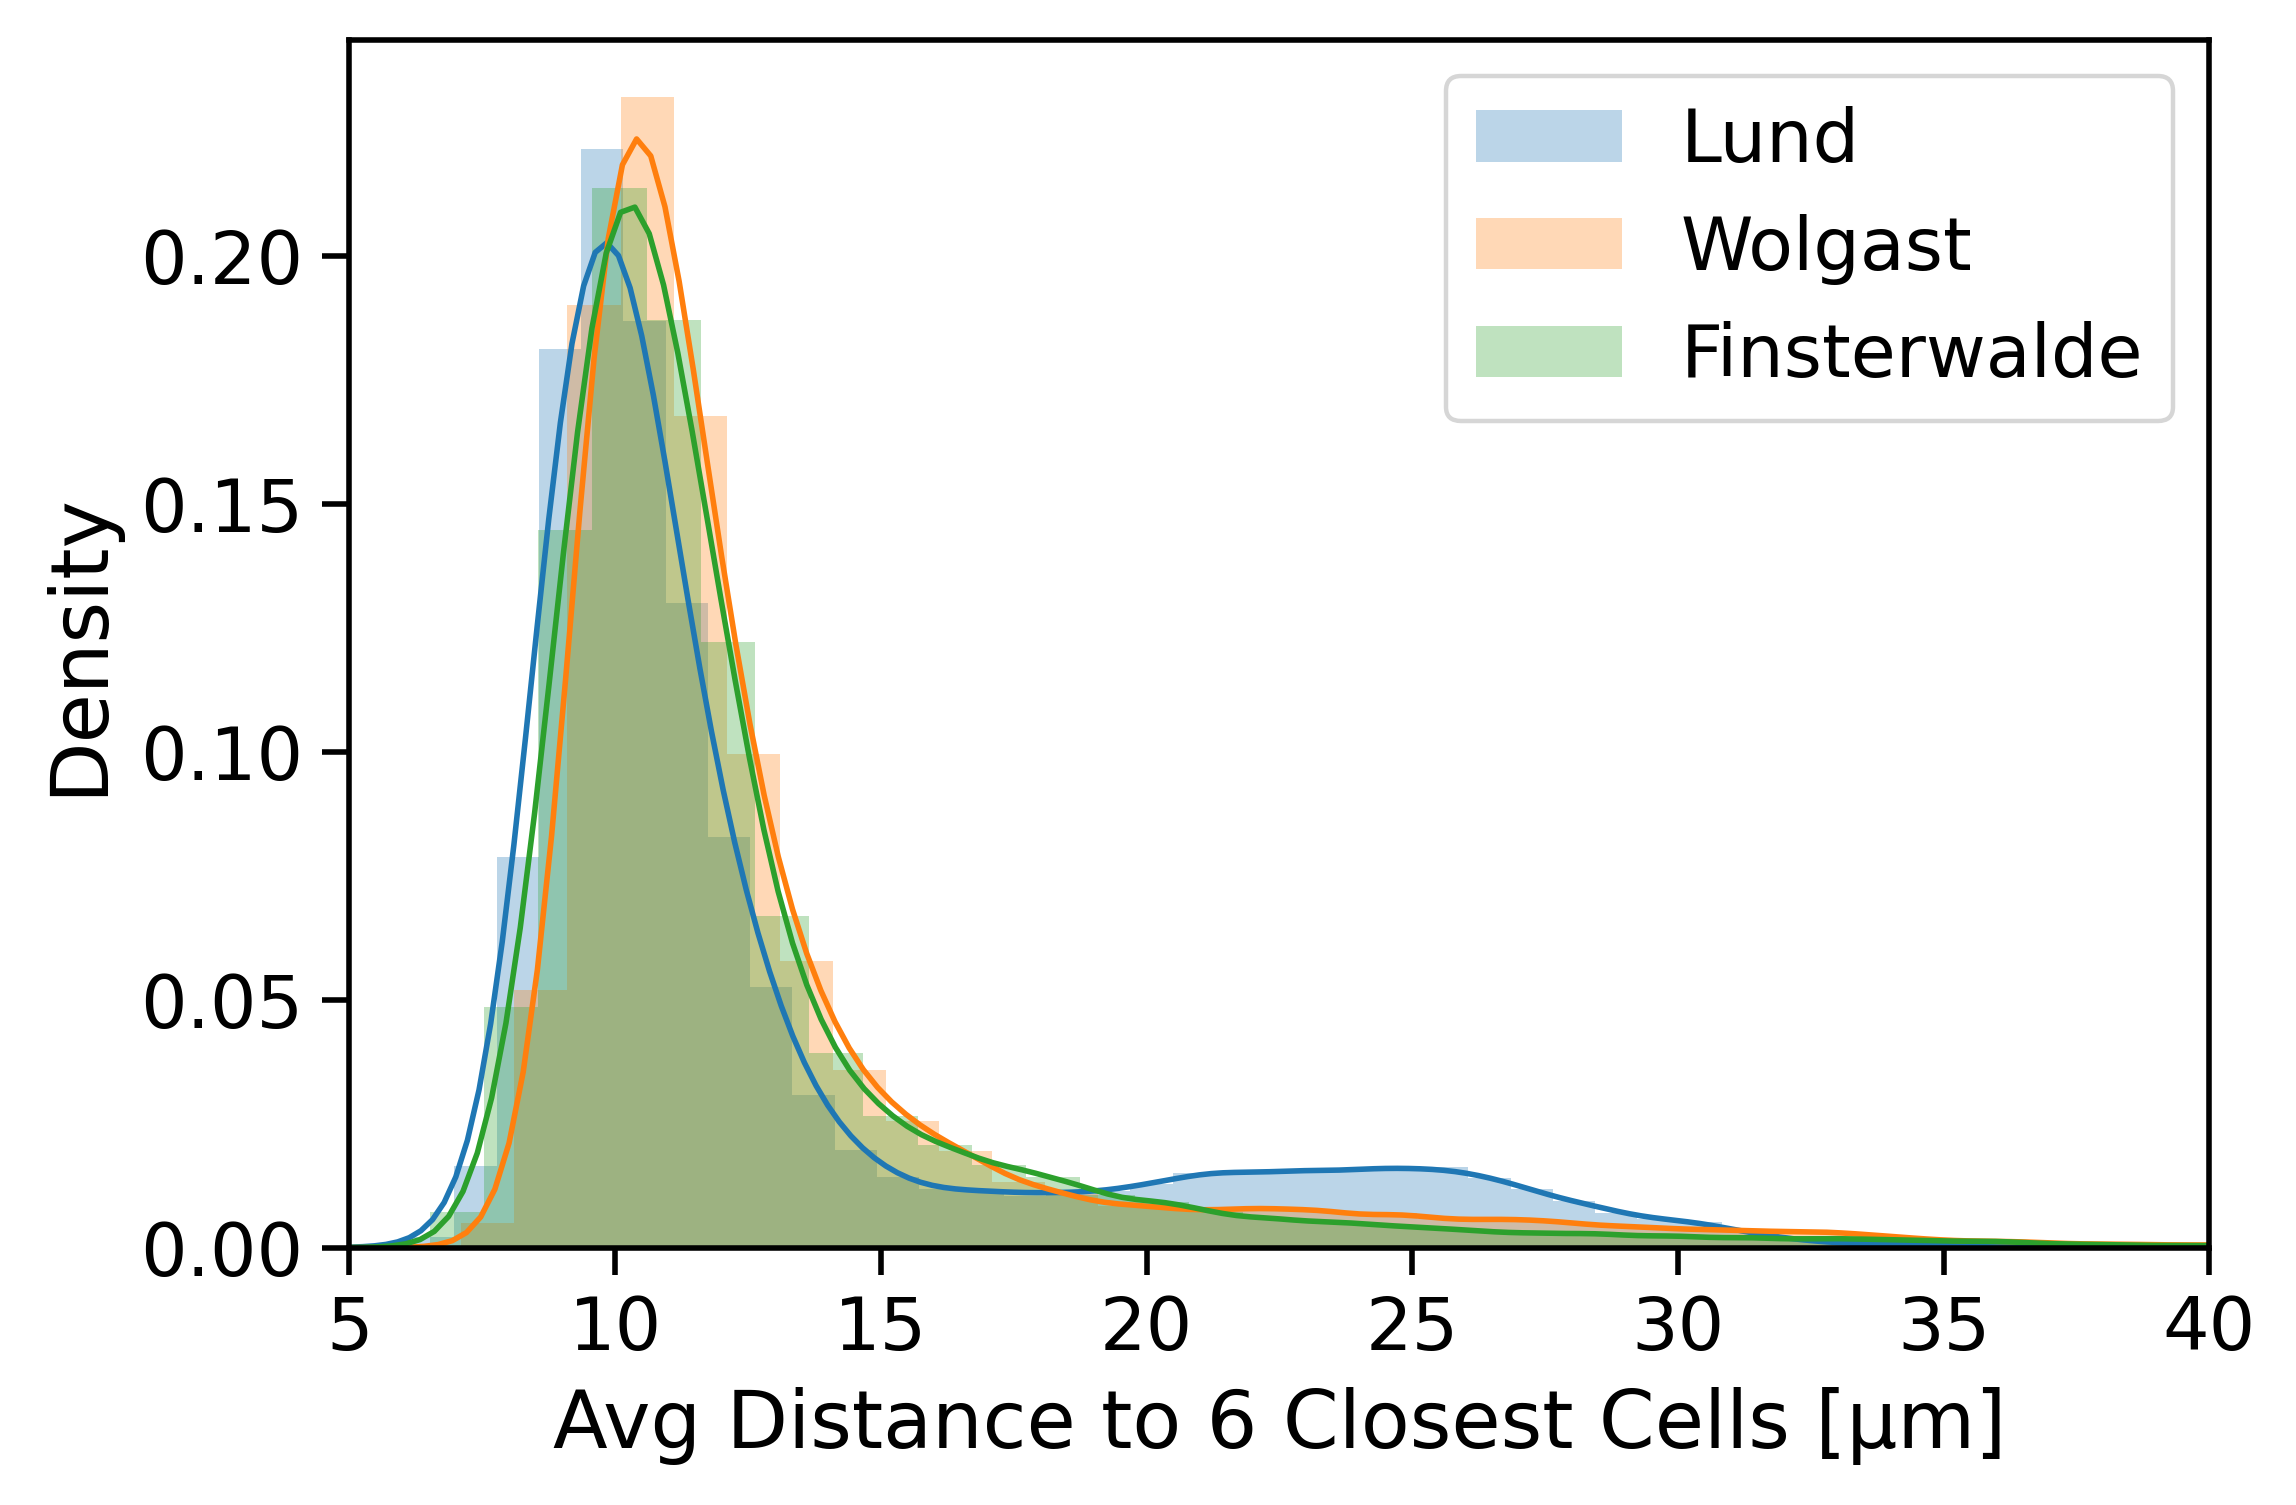

In [22]:
adn6 = [prop['avg distance of 6 closest points'] for prop in props_list]
plot_dataset_comparison(adn6, 'Avg Distance to 6 Closest Cells [\u03BCm]')
plt.xlim([5,40])

It's amazing how not only the plots look extremely similar to eachother but they look almost identical to the area plot. I thought that maybe they differ slightly because of certain neighbourhoods but it seems that this is not the case. I wonder if different numbers of neighbours could change this and would be better suited as a parameter. Including this feature alongside area will definitely be like a weight on area though, which might be undesireable and might be causing this focus on embryo/serosa clusterings.

# Standard Deviation of Neighbor Distance
This feature obviously will highlight all edge regions between two differing area sizes of cells (since neighbourhood distance correlates so strongly with area: maybe proove this with STdev of area data and comparison to this feature). Since the different distance to neighbourhood values were so similar in their distribution let's just look at one value for some clarity:

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

(0.0, 6.0)

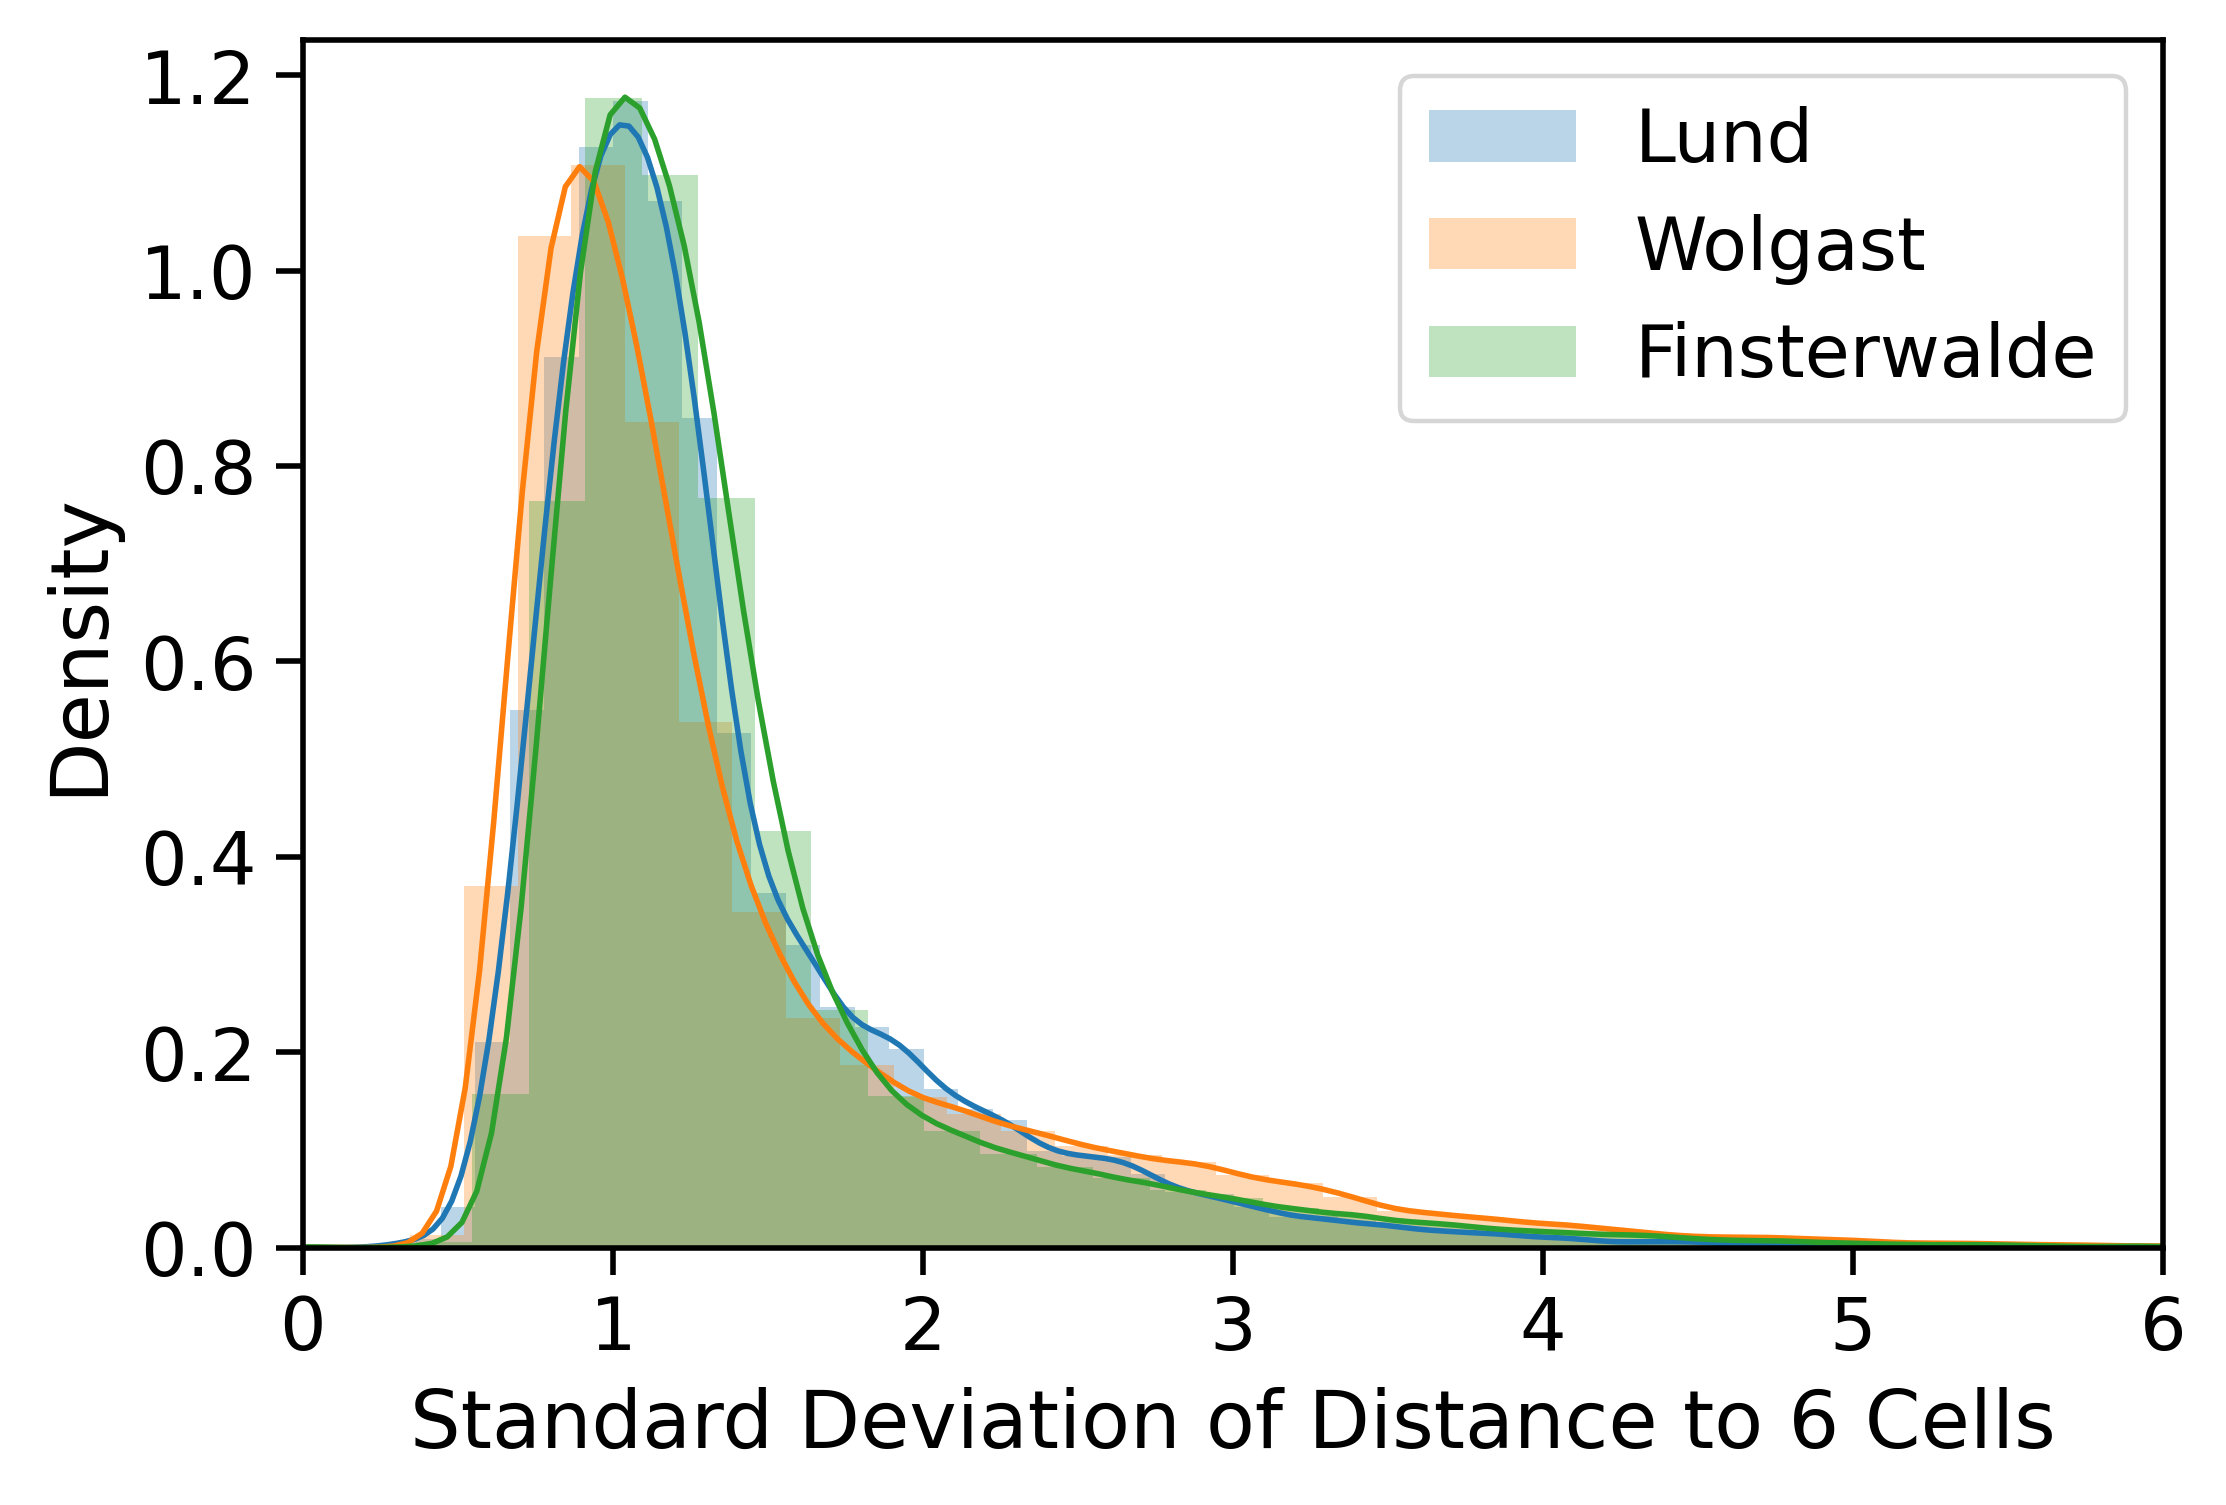

In [24]:


stdadn6 = [prop['stddev distance of 6 closest points'] for prop in props_list]
plot_dataset_comparison(stdadn6, 'Standard Deviation of Distance to 6 Cells')
plt.xlim([0,6])

Okay so I was expecting something else. I'm not sure what exactly but not such a normal distributed feature. It might be that the peak of this distribution actually is the cells that are between other distributions though. We'll need to do some more investigating to actually prove that though. 

# Concluding Remarks
Anyway. These are my first thoughts on the features separately. I definitely need to look into them a bit more and I'll definitely need more for the master thesis but this will serve as a kind of rough frame for further more in depth exploration (with citations etc.) but something needed to be done for now and I definitely need to get a feeling for the data.

One final remark is that we only seem to have features that resemble some kind of normal distribution (with some odd ones out, that MIGHT be some other kind of distribution like euler number). Nevertheless One thing I can conclude is that it seems reasonable to perform Standardscaling on all of these features as none have sharp edges or are actually confined by the measurement boundaries.

C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryans\anaconda3\envs\mstr_v4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

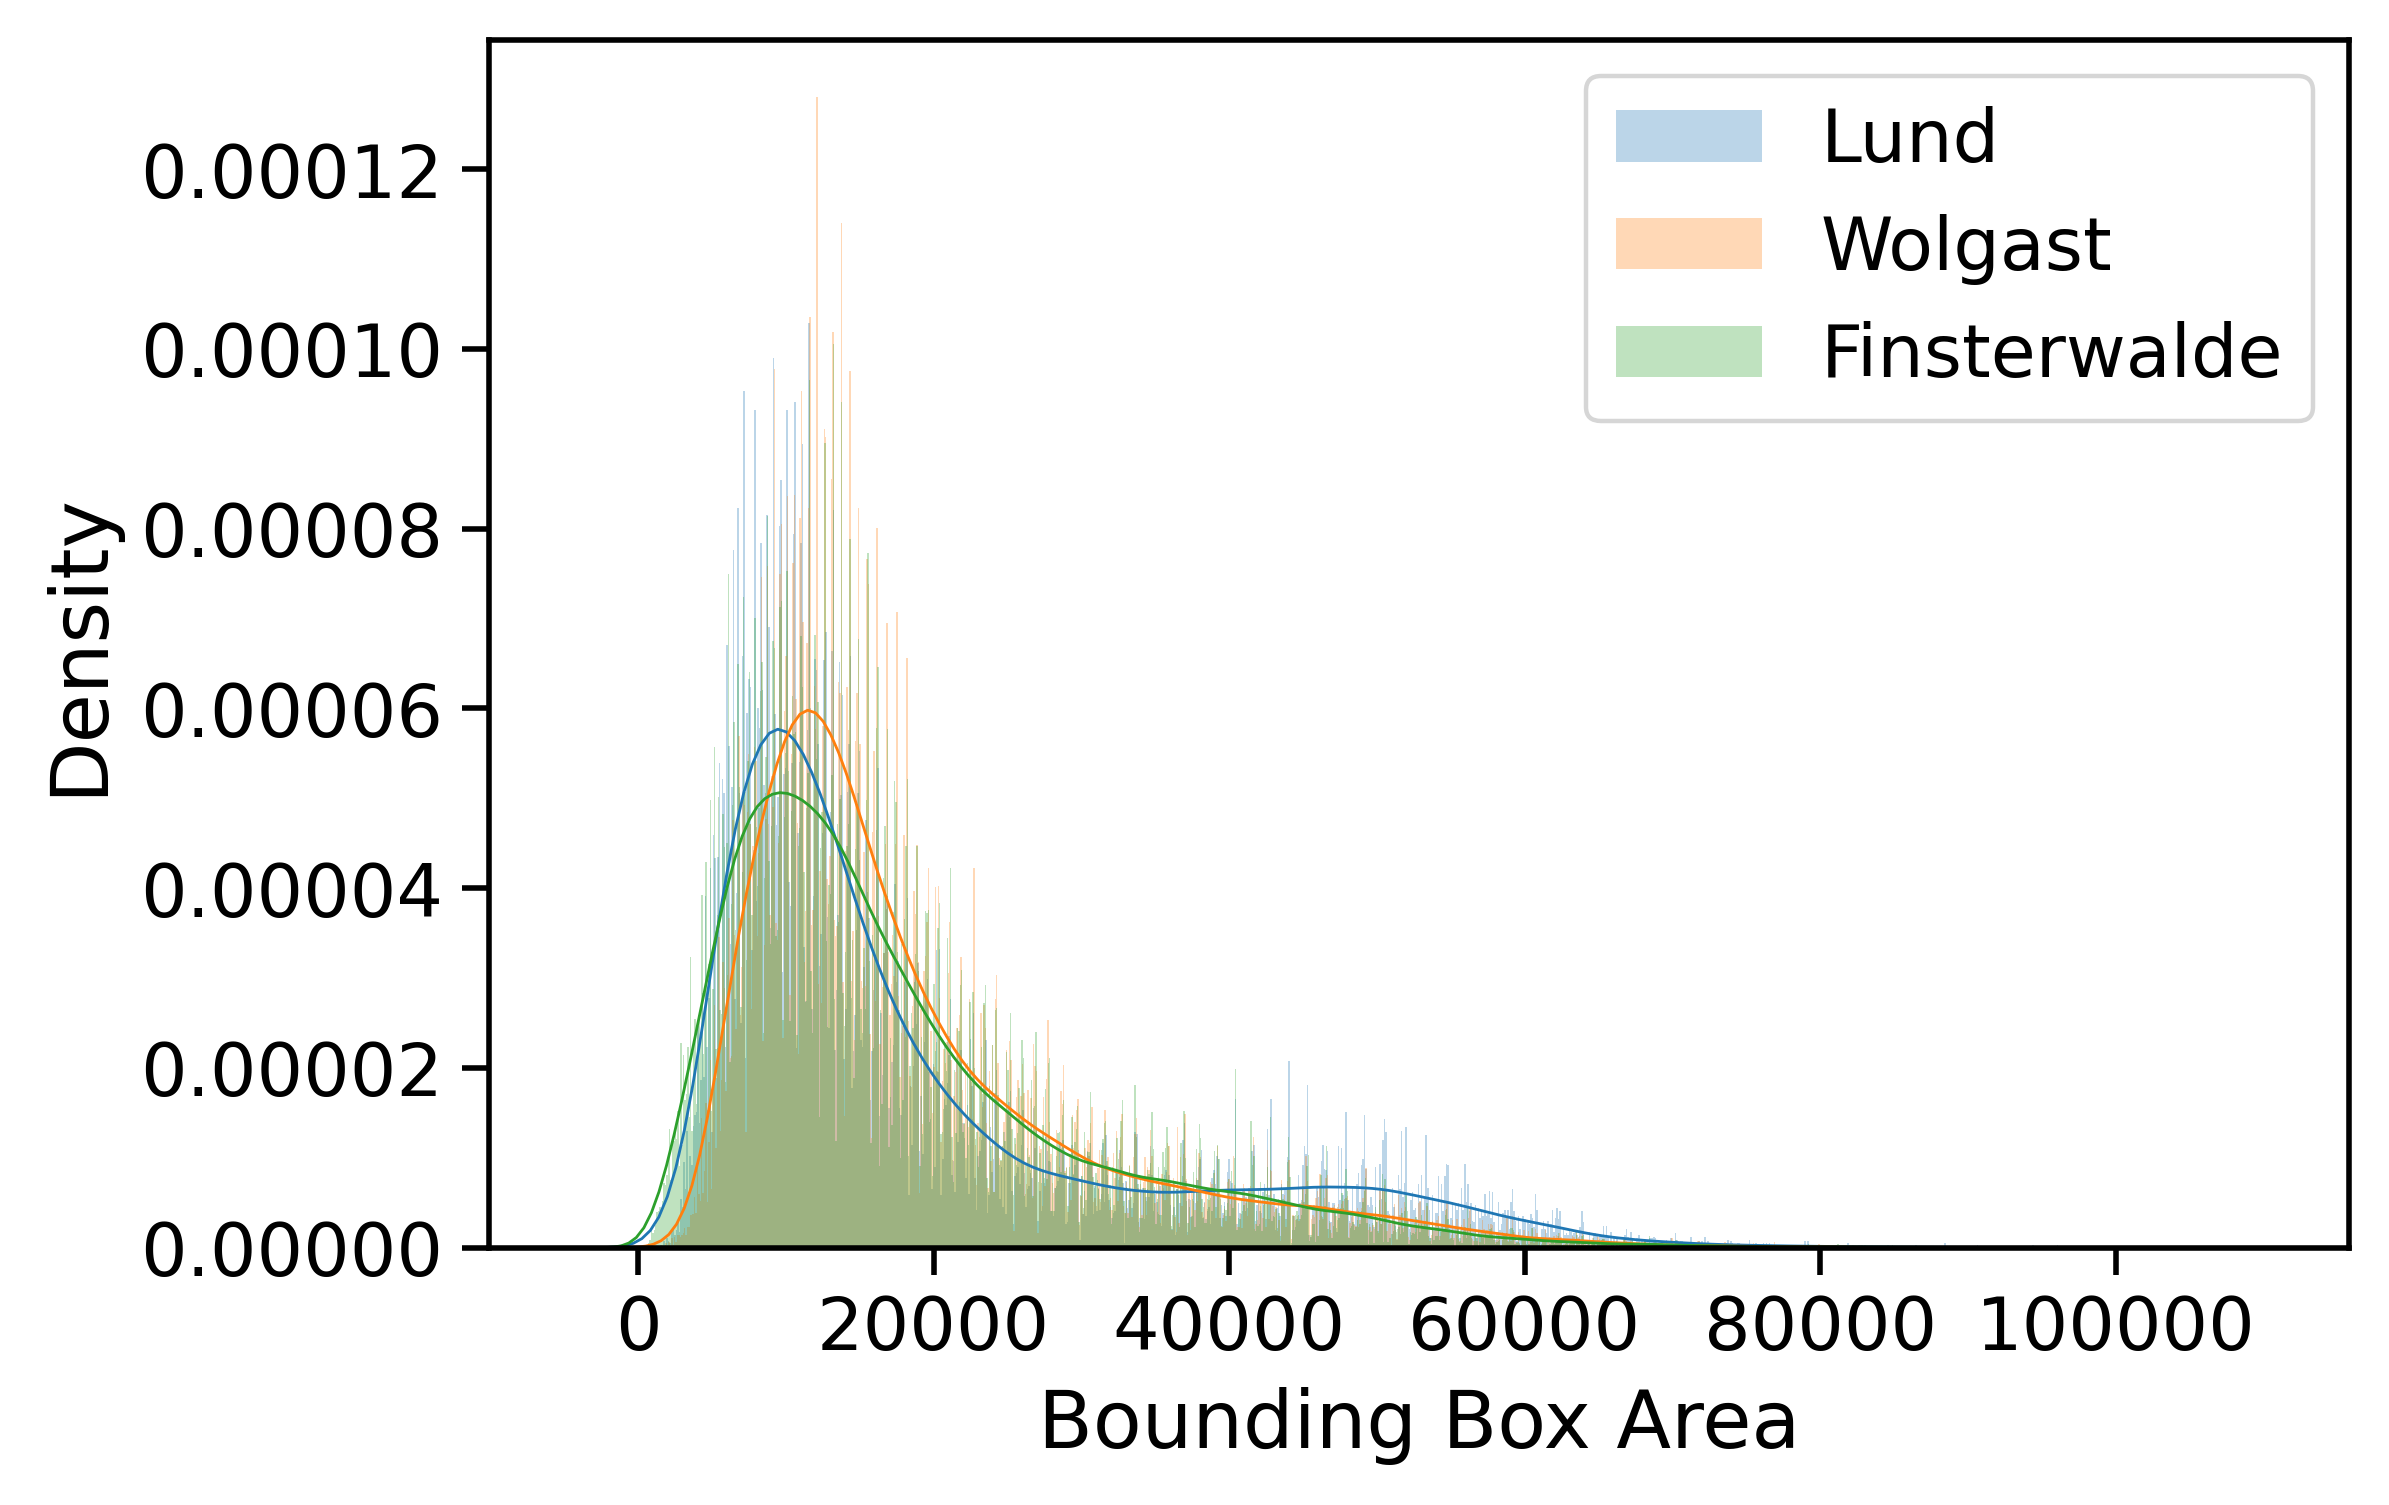

In [91]:
bbox_area = [prop['bbox_area'] for prop in props_list]
plot_dataset_comparison(bbox_area, 'Bounding Box Area', bins = 1000)

In [93]:
allregprops_lund.keys()

Index(['area', 'bbox_area', 'convex_area', 'equivalent_diameter',
       'euler_number', 'extent', 'feret_diameter_max', 'filled_area',
       'major_axis_length', 'minor_axis_length', 'max_intensity',
       'mean_intensity', 'min_intensity', 'solidity', 'centroid-0',
       'centroid-1', 'centroid-2', 'weighted_centroid-0',
       'weighted_centroid-1', 'weighted_centroid-2', 'image_stdev',
       'avg distance of 4 closest points',
       'stddev distance of 4 closest points',
       'avg distance of 5 closest points',
       'stddev distance of 5 closest points',
       'avg distance of 6 closest points',
       'stddev distance of 6 closest points', 'touching neighbor count'],
      dtype='object')

In [94]:
# conversion factors for measurements with units
volume_cf = 0.69*0.69*0.69
distance_cf = 0.69


conversion_factors = [volume_cf,volume_cf,volume_cf, distance_cf,
                      1,1,distance_cf,volume_cf,
                      distance_cf,distance_cf,1,
                      1,1,1,1,
                      1,1,1,
                      1,1,1,
                      distance_cf, distance_cf,
                      distance_cf, distance_cf,
                      distance_cf, distance_cf,
                      1
                     ]

# transforming the props test
allregprops_lund*conversion_factors

area     bbox_area   convex_area  equivalent_diameter  \
0     1428.357132   3621.811725   1920.792123            13.972670   
1     3079.443366   4697.678700   3499.606377            18.050582   
2     1563.702840   3143.174112   1897.139475            14.400753   
3     1776.905181   2890.879200   2076.505389            15.027563   
4     3473.982675   5658.896034   4077.782217            18.790702   
...           ...           ...           ...                  ...   
1787  8220.280707  24293.240550  11557.932147            25.039713   
1788  6487.724241   9366.448608   7371.741960            23.140066   
1789  4539.008853   9566.182080   6129.649431            20.542540   
1790  6401.983392  11333.560500   7277.459877            23.037675   
1791  7174.965069  17755.911450  10123.990362            23.929873   

      euler_number    extent  feret_diameter_max  filled_area  \
0              1.0  0.394376           23.348116  1428.357132   
1              1.0  0.655524           24.859159  3079.443366   
2              1.0  0.497492           21.412246  1563.702840   
3              1.0  0.614659           20.619343  1776.905181   
4              1.0  0.613898           28.798719  3473.982675   
...            ...       ...                 ...          ...   
1787           1.0  0.338377           37.578087  8220.280707   
1788           1.0  0.692656           34.623977  6487.724241   
1789           0.0  0.474485           34.918363  4539.008853   
1790           1.0  0.564870           34.856953  6401.983392   
1791           1.0  0.404089           36.738855  7174.965069   

      major_axis_length  minor_axis_length  ...  weighted_centroid-1  \
0             23.880318          16.319087  ...           640.845424   
1             25.968913          22.161472  ...           646.706214   
2             22.722986          16.519426  ...           589.945958   
3             20.719948          18.165015  ...           607.929969   
4             28.761022          23.343755  ...           621.829652   
...                 ...                ...  ...                  ...   
1787          36.461995          30.845242  ...           396.111803   
1788          35.244518          26.658085  ...           490.673405   
1789          33.861032          24.256617  ...           451.006519   
1790          34.416468          27.567278  ...           420.651423   
1791          37.191952          29.152580  ...           457.611134   

      weighted_centroid-2  image_stdev  avg distance of 4 closest points  \
0               33.766460    55.809849                          9.956797   
1               34.925337    41.625885                         13.447554   
2               34.050146    49.124729                         10.762579   
3               33.759756    58.492424                         11.368726   
4               36.464184    37.146133                         14.472538   
...                   ...          ...                               ...   
1787           497.662667    40.599789                         25.706038   
1788           498.748248    25.227795                         23.922224   
1789           497.300740    43.354935                         22.775147   
1790           499.800390    42.377182                         23.281697   
1791           501.097318    41.612572                         21.379433   

      stddev distance of 4 closest points  avg distance of 5 closest points  \
0                                1.830269                         11.020939   
1                                1.886238                         14.194236   
2                                2.077615                         11.311613   
3                                2.084768                         11.796530   
4                                2.150375                         15.014224   
...                                   ...                               ...   
1787                             3.072624                   

In [95]:
allregprops_lund

area  bbox_area  convex_area  equivalent_diameter  euler_number  \
0      4348      11025         5847            20.250246             1   
1      9374      14300        10653            26.160263             1   
2      4760       9568         5775            20.870656             1   
3      5409       8800         6321            21.779076             1   
4     10575      17226        12413            27.232902             1   
...     ...        ...          ...                  ...           ...   
1787  25023      73950        35183            36.289439             1   
1788  19749      28512        22440            33.536327             1   
1789  13817      29120        18659            29.771797             0   
1790  19488      34500        22153            33.387934             1   
1791  21841      54050        30818            34.680975             1   

        extent  feret_diameter_max  filled_area  major_axis_length  \
0     0.394376           33.837849         4348          34.609157   
1     0.655524           36.027767         9374          37.636106   
2     0.497492           31.032241         4760          32.931864   
3     0.614659           29.883106         5409          30.028910   
4     0.613898           41.737274        10575          41.682641   
...        ...                 ...          ...                ...   
1787  0.338377           54.460995        25023          52.843471   
1788  0.692656           50.179677        19749          51.079012   
1789  0.474485           50.606324        13817          49.073960   
1790  0.564870           50.517324        19488          49.878939   
1791  0.404089           53.244718        21841          53.901380   

      minor_axis_length  ...  weighted_centroid-1  weighted_centroid-2  \
0             23.650850  ...           640.845424            33.766460   
1             32.118075  ...           646.706214            34.925337   
2             23.941198  ...           589.945958            34.050146   
3             26.326109  ...           607.929969            33.759756   
4             33.831529  ...           621.829652            36.464184   
...                 ...  ...                  ...                  ...   
1787          44.703249  ...           396.111803           497.662667   
1788          38.634906  ...           490.673405           498.748248   
1789          35.154517  ...           451.006519           497.300740   
1790          39.952577  ...           420.651423           499.800390   
1791          42.250116  ...           457.611134           501.097318   

      image_stdev  avg distance of 4 closest points  \
0       55.809849                         14.430141   
1       41.625885                         19.489208   
2       49.124729                         15.597941   
3       58.492424                         16.476414   
4       37.146133                         20.974693   
...           ...                               ...   
1787    40.599789                         37.255127   
1788    25.227795                         34.669890   
1789    43.354935                         33.007460   
1790    42.377182                         33.741590   
1791    41.612572                         30.984686   

      stddev distance of 4 closest points  avg distance of 5 closest points  \
0                                1.830269                         15.972376   
1                                1.886238                         20.571356   
2                                2.077615                         16.393642   
3                                2.084768                         17.096420   
4                                2.150375                         21.759745   
...                                   ...                               ...   
1787                             3.072624                         40.447025   
1788                             2.535487                         39.791008   
1789            